# **PRÁCTICA FINAL: CAR ACCIDENTS IN CANADA**
**Autora**: Noelia Cárdenas Salamanca

**Contexto**: Formo parte de una empresa a la que ha contratado una empresa de siniestros para responder ciertas preguntas que les ayudrán a ajustar mejor sus servicios.

# **ÍNDICE**


1. INTRODUCCIÓN Y OBJETIVOS.

2. LECTURA DE DATOS.

3. EXPLORACIÓN Y TRATAMIENTO DE LOS DATOS.

    3.1 DATOS DUPLICADOS.

    3.2 ELIMINACIÓN DE VARIABLES.
    
    3.3 VALORES MISSING.

    3.4. TRATAMIENTO DE VARIABLES.
      
  *   Proporción de fallecimientos respecto al total de colisiones por edad.
  *   Número de colisiones en función de la edad.

  3.5 MATRIZ DE CORRELACIONES.

4. VISUALIZACIÓN RELACIONES ENTRE VARIABLES.

    4.1 ESTUDIO DE LA GRAVEDAD DE LA COLISIÓN.

    4.2 VARIABLE SALUD DEL ACCIDENTADO.

    4.3 RELACIÓN ENTRE LAS DOS VARIABLES A PREDECIR.

5. BALANCEO DE DATOS Y VARIABLES DUMMY.

    5.1 BALANCEO DE LOS DATOS.

    5.2 CREACIÓN DE VARIABLES DUMMY.

6. USO Y VALIDACIÓN DE MODELOS DE CLASIFICACIÓN.

  6.1 VARIABLE OBJETIVO C_SEV (FALLECIDOS/NO FALLECIDOS).

    6.1.1 REGRESIÓN LOGÍSTICA.

    6.1.2 ÁRBOL DE DECISIÓN.

    6.1.3 RANDOM FOREST.

    6.1.4 GRADIENT BOOST.

    6.1.5 COMPARACIÓN DEL RECALL DE LOS DIFERENTES MODELOS.

  6.2 VARIABLE OBJETIVO P_ISEV (REQUERIMIENTO DE TTO MÉDICO).

    6.2.1 REGRESIÓN LOGÍSTICA.

    6.2.2 ÁRBOL DE DECISIÓN.

    6.2.3 RANDOM FOREST.

    6.2.4 GRADIENT BOOST.

    6.2.5 COMPARACIÓN DEL RECALL DE LOS DIFERENTES MODELOS.
7. ANÁLISIS DE LA CLIMATOLOGÍA.

    7.1 LECTURA Y TRATAMIENTO DE LOS DATOS.

    7.2 VALORES MISSING.

    7.3 TRATAMIENTO Y ANÁLISIS DEL DF CLIMA.

    7.4 UNIÓN DE AMBOS DATA FRAME.

    7.5 MATRIZ DE CORRELACIONES.

8. CONCLUSIONES Y VALORACIÓN FINAL.

    8.1. CONCLUSIÓN FINAL.



## **LIBRERÍAS**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import preprocessing, tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, \
                            silhouette_score, recall_score, precision_score, make_scorer, \
                            roc_auc_score, f1_score, precision_recall_curve, accuracy_score, roc_auc_score, \
                            classification_report, confusion_matrix

## **1. INTRODUCCIÓN Y OBJETIVOS**


En este proyecto abordamos un problema de clasificación referente a una aseguradora de detección de siniestros. El conjunto de datos que vamos a utilizar contiene información de accidentes de coche de Canadá desde 1999 a 2014. Este conjunto contiene variables referentes a la colisión, al vehículo y a los pasajeros. Una vez analizados todos los datos podremos contestar preguntas como: ¿Qué tipos de vehículos y conductores son más/menos propensos a sufrir accidentes? ¿Qué es lo más contribuyente a que existan fallecidos en un accidente?

Por tanto, podríamos decir que nuestro objetivo principal es predecir posibles casos de personas heridas o fallecidas en la colisión, ya que una vez hecho esto podremos dar respuesta a todo ese tipo de preguntas.

En la siguiente tabla se muestran las variables con las que cuenta la base de datos.

**1. Variables referidas a la colisión**

| Variable | Descripción |
| :- |:- |
|*C_YEAR*| Año del accidente|
| *C_MNTH*| Mes del accidente |
|*C_WDAY*| Día de la semana en el cuál ocurrió el accidente|
|*C_HOUR*| Hora en la que se produce el accidente.|
|*C_SEV*| Gravedad de la colisión|
|*C_VEHS*|Número de vehículos involucrados en el accidente.|
|*C_CONF*| Configuración de la colisión |
|*C_RCFG*| Configuración de la carretera. |
|*C_WTHR*| Condición climatológica. |
|*C_RSUR*| Estado de la superficie de la carretera.|
|*C_RALN*| Alineación vial.|
|*C_TRAF*| Control de tráfico.|

**2. Variables referidas al vehículo**

| Variable | Descripción |
| :- |:- |
|*V_ID*| Número de secuencia del vehículo.|
| *V_TYPE*| Tipo de vehículo.|
|*V_YEAR*| Año del modelo de vehículo|


**3. Variables referidas a los pasajeros**

| Variable | Descripción |
| :- |:- |
| *P_ID* | Número de secuencia del pasajero.
| P_SEX | Género del pasajero.
*P_AG* | Edad del pasajero.
*P_PSN* | Posición del pasajero en el vehículo.
*P_ISEV* | Requerimiento de tratamiento médico.
*P_SAFE* | Dispositivo de seguridad utilizado.
*P_USER* | Clase de usuario de la carretera.

## **2. LECTURA DE DATOS**

In [5]:
df = pd.read_csv('/content/drive/MyDrive/datos/NCDB_1999_to_2014.csv')

## **3. EXPLORACIÓN Y TRATAMIENTO DE LOS DATOS**

In [6]:
df

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1,1,20,2,02,34,UU,1,5,...,01,06,1990,01,M,41,11,1,UU,1
1,1999,1,1,20,2,02,34,UU,1,5,...,02,01,1987,01,M,19,11,1,UU,1
2,1999,1,1,20,2,02,34,UU,1,5,...,02,01,1987,02,F,20,13,2,02,2
3,1999,1,1,08,2,01,01,UU,5,3,...,01,01,1986,01,M,46,11,1,UU,1
4,1999,1,1,08,2,01,01,UU,5,3,...,99,NN,NNNN,01,M,05,99,2,UU,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860400,2014,UU,U,UU,2,UU,UU,01,U,U,...,13,07,UUUU,01,M,24,11,1,NN,1
5860401,2014,UU,U,23,2,01,06,05,1,1,...,1,14,2006,01,M,29,96,2,09,5
5860402,2014,UU,U,14,2,01,02,01,1,5,...,1,01,2006,01,F,UU,11,2,01,1
5860403,2014,UU,U,22,1,01,06,01,2,4,...,1,22,UUUU,01,M,67,12,3,01,U


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5860405 entries, 0 to 5860404
Data columns (total 22 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   C_YEAR  int64 
 1   C_MNTH  object
 2   C_WDAY  object
 3   C_HOUR  object
 4   C_SEV   int64 
 5   C_VEHS  object
 6   C_CONF  object
 7   C_RCFG  object
 8   C_WTHR  object
 9   C_RSUR  object
 10  C_RALN  object
 11  C_TRAF  object
 12  V_ID    object
 13  V_TYPE  object
 14  V_YEAR  object
 15  P_ID    object
 16  P_SEX   object
 17  P_AGE   object
 18  P_PSN   object
 19  P_ISEV  object
 20  P_SAFE  object
 21  P_USER  object
dtypes: int64(2), object(20)
memory usage: 983.6+ MB


Las variables que forman nuestro conjunto de datos son de tipo ***'object'*** en su mayoría, es decir, son variables categóricas, que trataremos más adelante.

In [8]:
df.shape

(5860405, 22)

El conjunto de datos consta de 22 variables y 5.860.405 observaciones. Disponemos de un conjunto de datos de casi seis millones de observaciones. Lo cual es demasiado grande para trabajar desde nuestros ordenadores. Por tanto, decidimos solo estudiar los dos últimos años del conjunto, es decir, los siniestros de los años 2013 y 2014.



In [9]:
df = df[df['C_YEAR']>2012]

In [10]:
df.shape

(614670, 22)

El conjunto de datos ha quedado reducido a 22 variables y 614.670 variables, siendo este un número más razonable de observaciones para comenzar a trabajar con los datos.

### **3.1 DATOS DUPLICADOS:**

Estudiamos si existen filas duplicadas que nos puedan perjudicar a la hora de aplicar los diferentes algoritmos de clasificación y en caso de existir, las eliminamos. Tenemos como resultado 712 duplicados, por lo que procedemos a eliminarlos.

In [11]:
num_duplicate_rows_df = df[df.duplicated()]
print("numero de duplicados: ", num_duplicate_rows_df.shape)

numero de duplicados:  (712, 22)


In [12]:
df = df.drop_duplicates(keep='first')

### **3.2 ELIMINACIÓN DE VARIABLES**:

Antes de continuar con el estudio eliminamos las variables *'V_ID'*,*'P_ID'*, ya que son variables identificadoras del vehiculo y del pasajero. Eliminamos también la variable  y *'C_YEAR'* que indica el año en el que ocurrió el accidente. Estas tres variables no aportan información útil a nuestro problema de clasificación.

In [13]:
df = df.drop(['V_ID','P_ID','C_YEAR'], axis=1)

In [14]:
df.shape

(613958, 19)

Finalmente tenemos un conjunto de datos con 19 variables y 613.958 observaciones

### **3.3 VALORES MISSING:** 

La leyenda de los datos nos informa de que las variables adoptan valores del tipo:

* *'UU'* significa que el valor real es desconocido
* *'XX'* significa que la jurisdicción no aporta dicho valor
* *'QQ' = Choice is other than the preceding values*. 

Decidimos designar estos valores como valores como el mismo tipo de missing, ya que no aportan ningún tipo de información relevante que pueda ser utilizada en nuestro estudio.

In [15]:
df = df.replace({'U' : np.nan, 'UU' : np.nan, 'UUUU' : np.nan})
df = df.replace({'X' : np.nan, 'XX' : np.nan, 'XXXX' : np.nan})
df = df.replace({'Q' : np.nan, 'QQ' : np.nan})

Por otro lado, encontramos también valores que comienzan por 'N'. En este caso, se trata de valores **Missing Not At Random**, es decir, valores que a pesar de ser Missing, tienen significado propio. Estos datos aparecen en:

- Variables referidas a la información del vehículo (informan de que la observación corresponde a un peatón)
- Variables que aportan información sobre la persona involucrada (indican que la colisión se produjo sobre coches aparcados). 

Como el objetivo principal de este estudio es predecir posibles casos de personas heridas o fallecidas en la colisión, vamos a eliminar aquellas observaciones que contengan valores 'N' haciendo referencia a los coches aparcados. 

In [16]:
df = df.loc[(df['P_SAFE']!='NN') & (df['P_AGE']!='NN') & (df['P_PSN']!='NN') & (df['P_ISEV']!='N') & (df['P_SEX']!='N') & (df['P_SEX']!='NN')]

Por otro lado, mantendremos las observaciones referidas a peatones involucrados en colisiones, y trataremos los valores 'N' como una categoría más:

* `-1`: Peatones.



In [17]:
df = df.replace({'NN' : -1, 'NNNN' : -1})

Una vez realizados estos ajustes, veamos la cantidad de valores nulos que contiene nuestro dataset. Calcularemos la suma de valores missing tanto por filas como por columnas para extraer conclusiones de las variables y observaciones con mayor número de datos nulos.

In [18]:
null_columns = df.isnull().sum().sort_values(ascending=False)
null_rows = df.isnull().sum(axis=1).sort_values(ascending=False)

Convertimos los datos anteriores en dos Data Frames, donde además añadimos una columnna que indique el porcentaje de missing que supone dicho valor en cada una de las variables u observaciones.

In [19]:
df_null_columnas = pd.DataFrame(null_columns, columns=['nulos_columnas'])     
df_null_filas = pd.DataFrame(null_rows, columns=['nulos_filas'])  
df_null_columnas['porcentaje_columnas'] = df_null_columnas['nulos_columnas']/df.shape[0]
df_null_filas['porcentaje_filas']= df_null_filas['nulos_filas']/df.shape[1]

* **MISSING POR COLUMNAS** :

In [20]:
df_null_columnas

,nulos_columnas,porcentaje_columnas
P_SAFE,69256,0.124959
C_RCFG,50014,0.090240
C_CONF,44801,0.080835
C_RALN,37410,0.067499
C_TRAF,33687,0.060782
P_AGE,28812,0.051986
C_RSUR,24786,0.044721
V_YEAR,21861,0.039444
P_SEX,21458,0.038717
P_USER,21013,0.037914


Se observa que el mayor porcentaje de missing por columnas es del 12.49% para la variable *'P_SAFE'*. Lo cual no es un valor demasiado alto. Además, observamos que para muchas de las variables el porcentaje de missing no supera el 5% (*'C_VEHS'* o *'C_SEV'*). Por tanto, no es necesario eliminar ninguna de las variables por contener un número muy elevado de valores nulos.

* **MISSING POR FILAS** :

In [21]:
df_null_filas

,nulos_filas,porcentaje_filas
5744736,13,0.684211
5512647,13,0.684211
5520161,12,0.631579
5418855,12,0.631579
5525109,12,0.631579
...,...,...
5512092,0,0.000000
5512091,0,0.000000
5512090,0,0.000000
5512089,0,0.000000


Veamos mediante un histograma la distribución del porcentaje de valores missing para las observaciones.

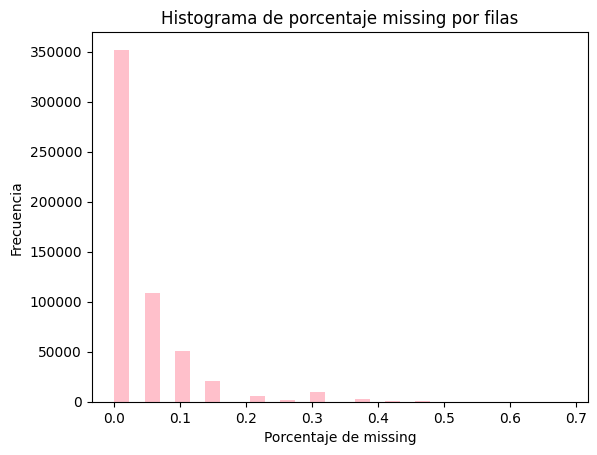

In [22]:
plt.hist(df_null_filas.porcentaje_filas, bins=30,color='pink')
plt.title("Histograma de porcentaje missing por filas")
plt.xlabel("Porcentaje de missing")
plt.ylabel("Frecuencia")
plt.show()

Visto de otro modo, a continución se muestra el número de observaciones que hay para las diferentes cantidades de variables cuyo valor es nulo.

In [23]:
df_null_filas.value_counts()

nulos_filas  porcentaje_filas
0            0.000000            351950
1            0.052632            108527
2            0.105263             51058
3            0.157895             21103
6            0.315789              9779
4            0.210526              5504
7            0.368421              2857
5            0.263158              2165
8            0.421053               815
9            0.473684               327
10           0.526316               101
11           0.578947                31
12           0.631579                12
13           0.684211                 2
dtype: int64

In [24]:
print ("Porcentaje de obs sin valores missing: " , len(df_null_filas[df_null_filas.nulos_filas == 0])/len(df_null_filas)*100, "%")

Porcentaje de obs sin valores missing:  63.50240242786852 %


Se observa que las observaciones sin valores missing forman un 63% del total de los datos. Por tanto, debido a que se cuenta con un valor bastante elevado de observaciones, decidimos eliminar las variables con valores nulos.

En el caso de querer realizar imputaciones sobre los datos faltantes, deberíamos utilizar algún algortimo de Sklearn en el que se pueda trabajar con variables categóricas ya que la base de datos está compuesta por datos númericos y categóricos.


In [25]:
df = df.dropna()

In [26]:
df.isnull().sum()

C_MNTH    0
C_WDAY    0
C_HOUR    0
C_SEV     0
C_VEHS    0
C_CONF    0
C_RCFG    0
C_WTHR    0
C_RSUR    0
C_RALN    0
C_TRAF    0
V_TYPE    0
V_YEAR    0
P_SEX     0
P_AGE     0
P_PSN     0
P_ISEV    0
P_SAFE    0
P_USER    0
dtype: int64

In [27]:
df.shape

(351950, 19)

Comprobamos que la eliminación de valores missing se ha hecho correctamente y observamos que finalmente se tiene un conjunto de datos de 351.950 observaciones y 19 variables.


### **3.4. TRATAMIENTO DE VARIABLES**

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351950 entries, 5245767 to 5860380
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   C_MNTH  351950 non-null  object
 1   C_WDAY  351950 non-null  object
 2   C_HOUR  351950 non-null  object
 3   C_SEV   351950 non-null  int64 
 4   C_VEHS  351950 non-null  object
 5   C_CONF  351950 non-null  object
 6   C_RCFG  351950 non-null  object
 7   C_WTHR  351950 non-null  object
 8   C_RSUR  351950 non-null  object
 9   C_RALN  351950 non-null  object
 10  C_TRAF  351950 non-null  object
 11  V_TYPE  351950 non-null  object
 12  V_YEAR  351950 non-null  object
 13  P_SEX   351950 non-null  object
 14  P_AGE   351950 non-null  object
 15  P_PSN   351950 non-null  object
 16  P_ISEV  351950 non-null  object
 17  P_SAFE  351950 non-null  object
 18  P_USER  351950 non-null  object
dtypes: int64(1), object(18)
memory usage: 53.7+ MB


Como ya se había visto al inicio del estudio, la mayoría de las variables son de tipo "object" y los valores que toman son categóricos. (A excepción de las variables *'P_AGE'*, *'V_YEAR'* y *'C_VEHS'*, cuyos valores tienen un orden cronológico).


Al analizar la base de datos, encontramos que ciertos valores como "01" y "1", se están tomando como categorías diferentes. Esto podemos verlo por ejemplo, en la variable *'C_MNTH'* a continuación.

Para solucionar estos problemas, convertiremos todas las variables de la base de datos al tipo int de forma que los valores mencionados, se unifiquen como una única clase. Después, volveremos a transformar las variables al tipo categórico. En esta segunda asignación excluiremos las variables *'P_AGE'*, *'V_YEAR'* y *'C_VEHS'*, que permanecerán en el tipo *int64*.


In [30]:
df['C_MNTH'].value_counts()

10    33134
8     32612
7     32424
9     31451
6     30248
11    29117
5     28102
12    27033
2     24807
3     24483
4     22435
01    19488
1     11668
12     2268
02     1580
11     1100
Name: C_MNTH, dtype: int64

En esta variable podemos ver el problema con el que nos hemos econtrado en la categorización de las diferentes clases. Trabajaremos en ello a continuación.

* **P_SEX**: Sexo de la víctima

Los datos de esta variable no son numéricos, realizamos una codificación binaria para esta variable.

`0`: Sexo masculino.

`1`: Sexo femenino


In [31]:
df['P_SEX'] = df['P_SEX'].replace({'M' : 0, 'F' : 1})

Ahora que todos los valores de las variables son numéricos, cambiamos el tipo de las variables a `int64` para solucionar los problemas comentados anteriormente en los que había categorías mal distinguidas.

In [32]:
df = df.astype('int64')
df['P_SEX'] = df['P_SEX'].astype('category')

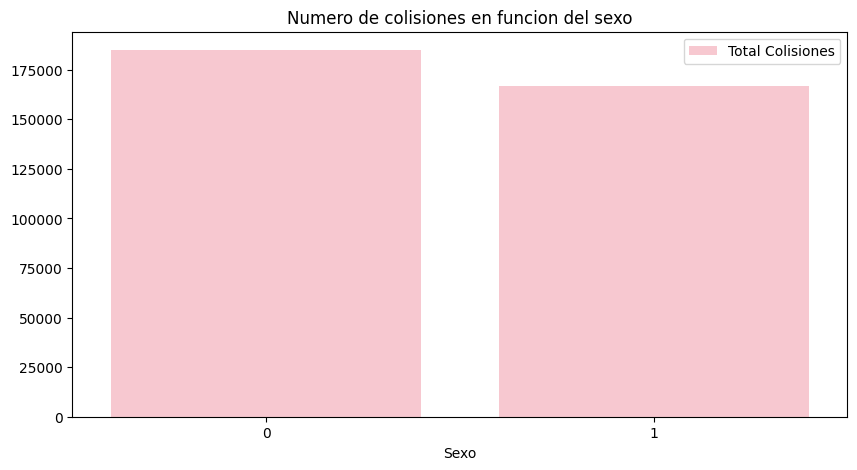

In [33]:
df1 = df.groupby('P_SEX').size()
ax = plt.subplots(figsize = (10,5))
ax = sns.barplot(x=df1.index, y=df1.values, color='pink', label='Total Colisiones')
ax.set(xlabel="Sexo", title='Numero de colisiones en funcion del sexo')
ax.legend()

plt.show()

* **C_MNTH**: Mes en el que ocurrió la colisión.

Veamos como varía el número de colisiones en función del mes en el que ocurrieron.

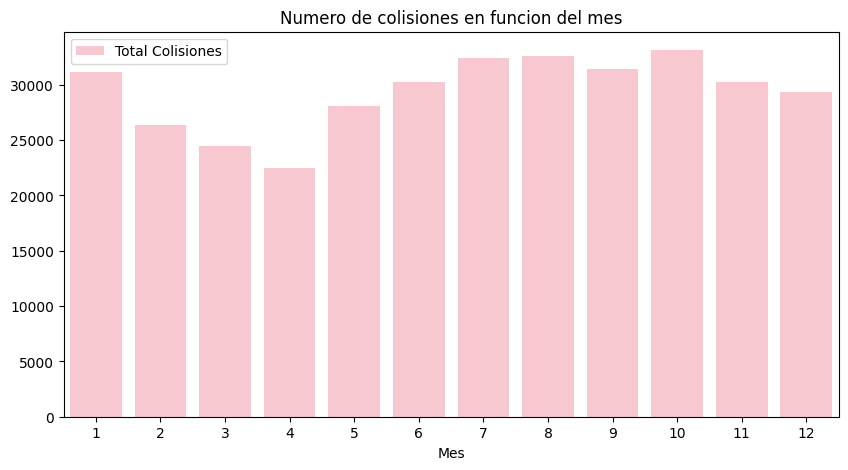

In [34]:
df1 = df.groupby('C_MNTH').size()
ax = plt.subplots(figsize = (10,5))
ax = sns.barplot(x=df1.index, y=df1.values, color='pink', label='Total Colisiones')
ax.set(xlabel="Mes", title='Numero de colisiones en funcion del mes')
ax.legend()

plt.show()

Podemos observar una ligera disminucuión en el número de accidentes en Febrero(2), Marzo(3) y Abril(4). 


* **C_WDAY**: Día en el que ocurrió la colisión.

Veamos como varía el número de colisiones en función del día en el que ocurrieron.

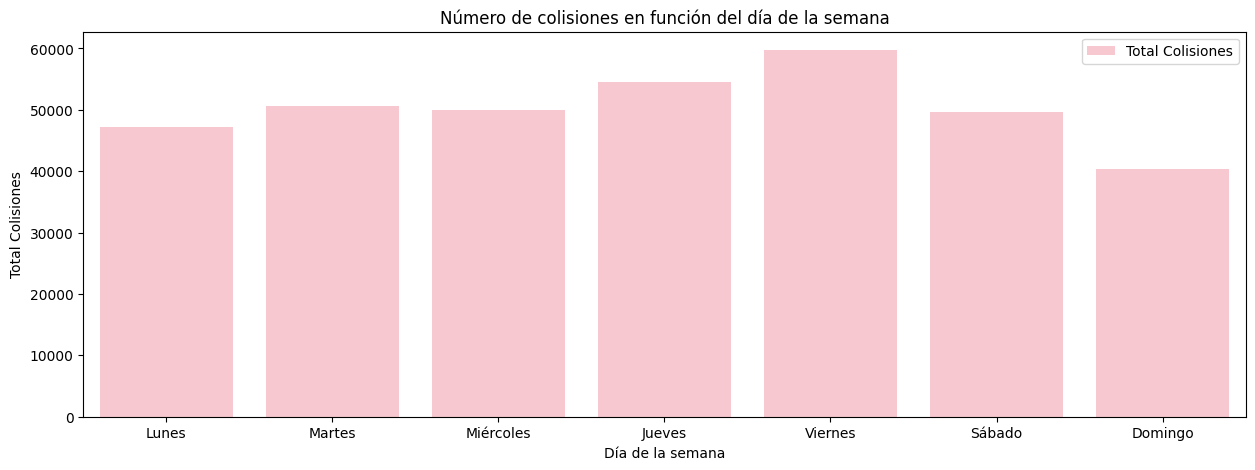

In [35]:
df1 = df.groupby('C_WDAY').size()

fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x=df1.index, y=df1.values, color='pink', label='Total Colisiones', ax=ax)
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

ax.set_xticklabels(dias_semana)

ax.set(xlabel="Día de la semana", ylabel="Total Colisiones", title='Número de colisiones en función del día de la semana')
ax.legend()

plt.show()

Se puede observar un ligero aumento en el número de colisiones los viernes y una reducción más significante los domingos.

In [36]:
df['C_WDAY'] = df['C_WDAY'].astype('category')
df['C_WDAY'].value_counts()

5    59733
4    54552
2    50539
3    49914
6    49610
1    47192
7    40410
Name: C_WDAY, dtype: int64


* **C_HOUR**: Hora en la que ocurrió la colisión.

Veamos la relación entre las colisiones  y la hora del día en la que sucedieron usando el siguiente gráfico:

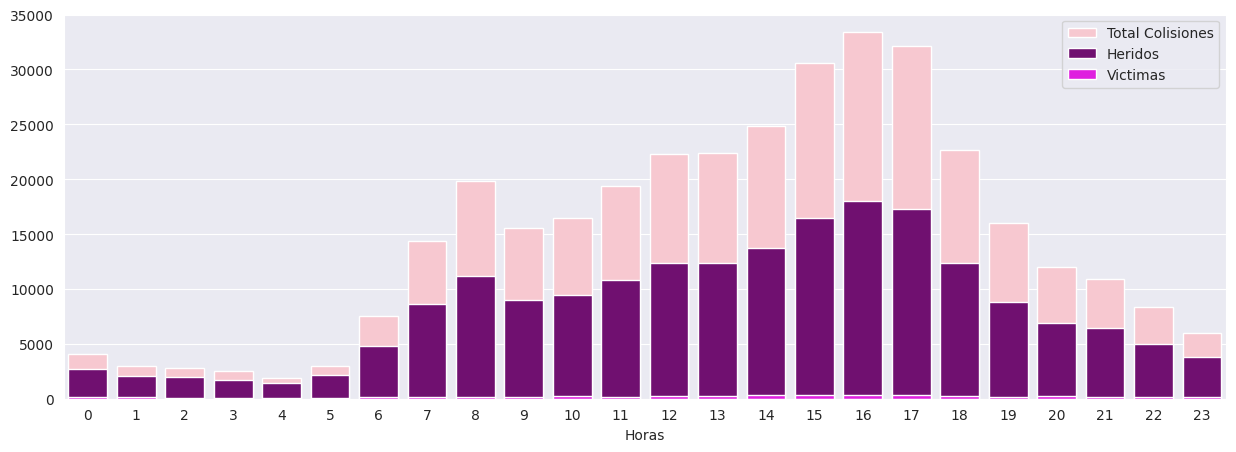

In [37]:
df1 = df.groupby('C_HOUR').size()
df2 = df[df['P_ISEV']==2].groupby('C_HOUR').size()
df3 = df[df['C_SEV']==1].groupby('C_HOUR').size()
sns.set_style("darkgrid")
ax = plt.subplots(figsize = (15,5))
ax = sns.barplot(x=df1.index, y=df1.values, color='pink', label='Total Colisiones')
ax = sns.barplot(x=df2.index, y=df2.values, color='purple', label='Heridos')
ax = sns.barplot(x=df3.index, y=df3.values, color='magenta', label='Victimas')
ax.set(xlabel="Horas")
ax.legend()

plt.show()

Podemos observar que existe una diferencia notable en el número de colisiones dependiendo de la hora del día en el que se produce el accidente. Para facilitar el análisis posterior, decidimos agrupar las horas de día en diferentes tramos horarios según el siguiente criterio:

- `0`: Noche (Horas desde las 7 P.M hasta las 12 A.M.)
- `1`: Madrugada (Horas desde la 1 A.M hasta las 6 A.M.)
- `2`: Mañana (Horas desde las 7 A.M hasta las 12 P.M.)
- `3`: Tarde (Horas desde la 1 P.M hasta las 6 P.M.)

In [38]:
df['C_HOUR'] = df['C_HOUR'].replace(dict.fromkeys([19,20,21,22,23,0], 0))
df['C_HOUR'] = df['C_HOUR'].replace(dict.fromkeys([1,2,3,4,5,6], 1))       
df['C_HOUR'] = df['C_HOUR'].replace(dict.fromkeys([7,8,9,10,11,12], 2))    
df['C_HOUR'] = df['C_HOUR'].replace(dict.fromkeys([13,14,15,16,17,18], 3)) 

In [39]:
df['C_HOUR'] = df['C_HOUR'].astype('category')
df['C_HOUR'].value_counts()

3    166017
2    107922
0     57308
1     20703
Name: C_HOUR, dtype: int64

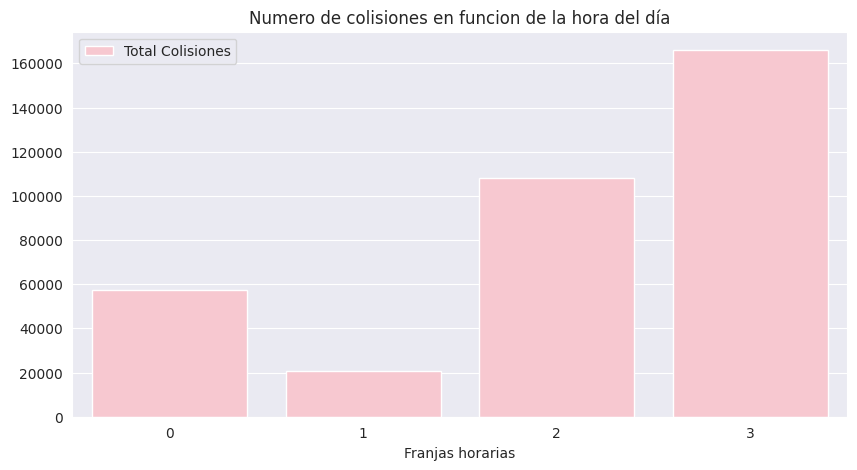

In [40]:
df1 = df.groupby('C_HOUR').size()
ax = plt.subplots(figsize = (10,5))
ax = sns.barplot(x=df1.index, y=df1.values, color='pink', label='Total Colisiones')
ax.set(xlabel="Franjas horarias", title='Numero de colisiones en funcion de la hora del día')
ax.legend()

plt.show()

Se observa que la mayoría de accidentes ocurres en la categoría 3, es decir de 13 P.M hasta las 18 P.M.

* **C_VEHS**: Número de vehículos involucrados en la colisión.



In [41]:
df['C_VEHS'].value_counts()

2     222621
1      63707
3      48795
4      11748
5       2719
6        941
7        303
8        167
10       146
9        127
77       115
11        83
14        73
17        68
20        62
12        58
36        54
21        36
15        32
18        31
37        18
13        16
39        10
57         9
34         6
24         3
43         1
16         1
Name: C_VEHS, dtype: int64

Se trata de una variable que contiene demasiados valores distintos y que ocurren con poca frecuencia para valores elevados. Se decide agrupar los valores en las siguientes categorías:

- `1`: Un vehículo implicado
- `2`: Dos vehículos implicados
- `3`: Tres vehículos implicados
- `4`: Cuatro vehículos implicados
- `5`: Cinco o más vehículos implicados



In [42]:
df.loc[df['C_VEHS'] > 4, 'C_VEHS'] = 5         

In [43]:
df['C_VEHS'].value_counts()

2    222621
1     63707
3     48795
4     11748
5      5079
Name: C_VEHS, dtype: int64

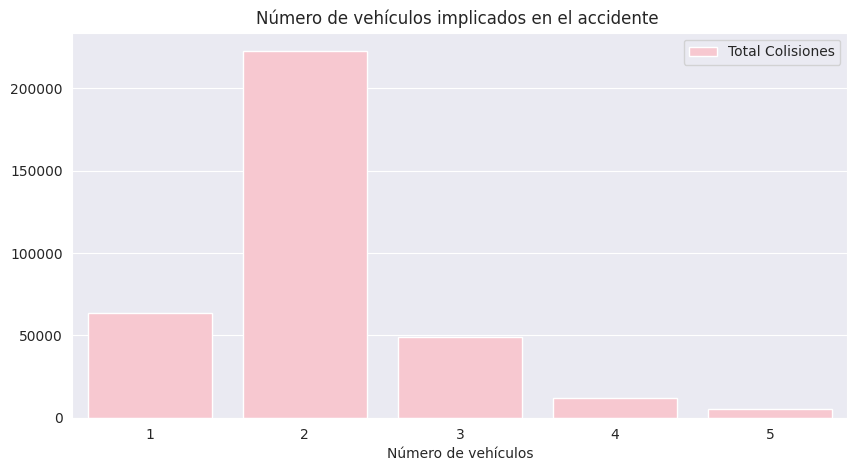

In [44]:
df1 = df.groupby('C_VEHS').size()
ax = plt.subplots(figsize = (10,5))
ax = sns.barplot(x=df1.index, y=df1.values, color='pink', label='Total Colisiones')
ax.set(xlabel="Número de vehículos", title='Número de vehículos implicados en el accidente ')
ax.legend()

plt.show()

Podemos observar que en una gran parte de las colisiones hay 2 vehículos implicados.

* **C_SEV**: Severidad del accidente.

Toma los valores:

`1`: Colisión que produce al menos una víctima mortal (antes de recodificar tomaba valor `1`).

`0`: Colisión que produce lesiones no mortales (antes valor tomaba valor `2`).

**OBSERVACIÓN**: Recodificamos como una variable binaria.


In [45]:
df.loc[df['C_SEV']==1, 'C_SEV'] = 1  
df.loc[df['C_SEV']==2, 'C_SEV'] = 0
df['C_SEV'] = df['C_SEV'].astype('category')
df['C_SEV'].value_counts()

0    347274
1      4676
Name: C_SEV, dtype: int64

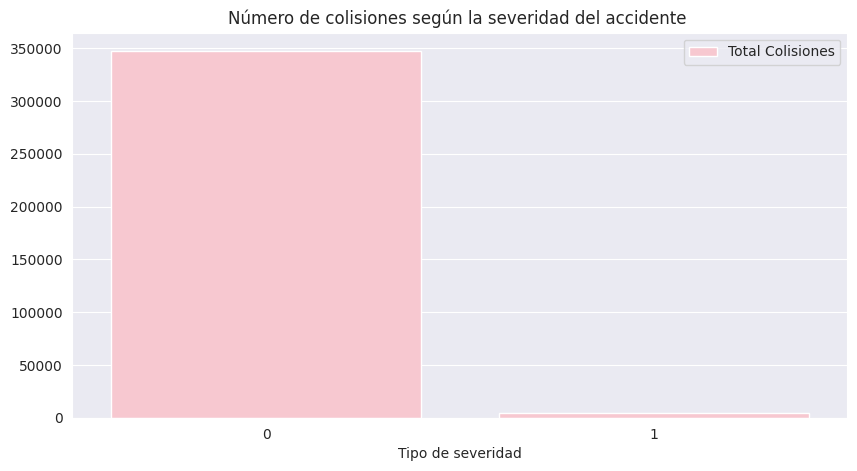

In [46]:
df1 = df.groupby('C_SEV').size()
ax = plt.subplots(figsize = (10,5))
ax = sns.barplot(x=df1.index, y=df1.values, color='pink', label='Total Colisiones')
ax.set(xlabel="Tipo de severidad", title='Número de colisiones según la severidad del accidente ')
ax.legend()

plt.show()

Podemos observar que en la mayoría de accidentes se producen lesiones no mortales.

* **C_CONF**: Configuración de la colisión.



In [47]:
df['C_CONF'].value_counts()

21    124042
35     53343
36     41263
6      35844
33     26173
22     13806
31     11988
4      11720
2       9114
3       8552
23      3686
24      3010
32      2732
41      2723
34      1711
1        834
25       707
5        702
Name: C_CONF, dtype: int64

Cada uno de estos valores tiene un significado concreto que indica la forma en la que se produjo la colisión y entre cuantos coches ocurrió. Agruparemos todas estas clases de la siguiente manera:


**`1`: Un único vehículo en movimiento:.** Clase formada por los valores entre 1 y 6 ambos inclusives, siendo estos diferentes tipos de colisiones con un único vehículo en movimiento.

**`2`: Dos vehículos en movimiento en la misma dirección:.** Clase formada por los valores entre 21 y 25 ambos inclusives, siendo estos diferentes tipos de colisiones de dos vehículos en movimiento en la misma dirección.

**`3`: Dos vehículos en movimiento en diferente dirección:.** Clase formada por los valores entre 31 y 36 ambos inclusives, siendo estos diferentes tipos de colisiones de dos vehículos en movimiento en diferente dirección.

**`4`: Dos vehículos (uno en movimiento y otro aparcado):.** Clase formada por el valor 41.


In [48]:
df.loc[df['C_CONF'].between(1, 6, inclusive=True), 'C_CONF'] = 1    
df.loc[df['C_CONF'].between(21, 25, inclusive=True), 'C_CONF'] = 2
df.loc[df['C_CONF'].between(31, 36, inclusive=True), 'C_CONF'] = 3
df.loc[df['C_CONF']==41, 'C_CONF'] = 4    
df['C_CONF'] = df['C_CONF'].astype('category')


In [49]:
df['C_CONF'].value_counts()

2    145251
3    137210
1     66766
4      2723
Name: C_CONF, dtype: int64

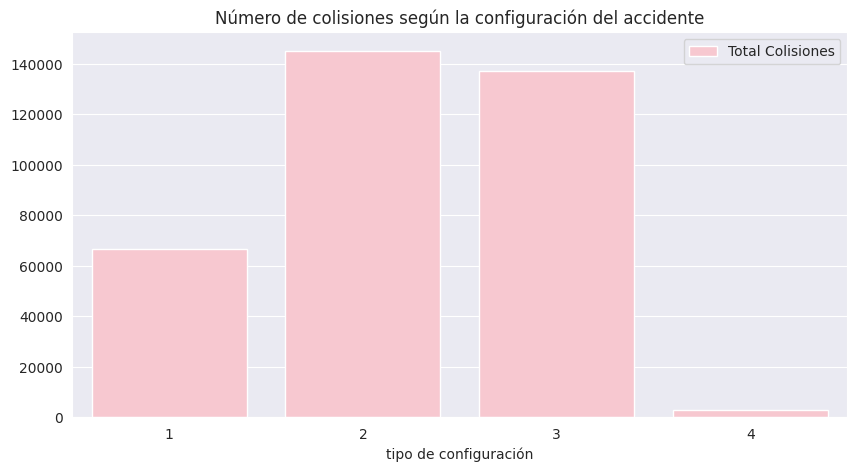

In [50]:
df1 = df.groupby('C_CONF').size()
ax = plt.subplots(figsize = (10,5))
ax = sns.barplot(x=df1.index, y=df1.values, color='pink', label='Total Colisiones')
ax.set(xlabel="tipo de configuración", title='Número de colisiones según la configuración del accidente')
ax.legend()

plt.show()

Observamos que una gran mayoria de las colisiones se producen en las categorias 2 (dos vehículos en movimiento en la misma dirección) y en la 3 (dos vehículos en movimiento en diferente dirección).

* **C_RCFG**: Configuración de la carretera

Decidimos eliminar esta variable ya que los valores que toma son posiciones muy concretas del lugar donde ha tenido lugar el accidente y no consideramos que sea una variable que aporte suficiente información en el análisis.

In [51]:
df = df.drop(['C_RCFG'], axis=1)

* **C_WTHR**: Clima del día de la colisión.


In [52]:
df.C_WTHR.value_counts()

1    253906
3     34945
2     31244
4     22409
6      6584
5      1655
7      1207
Name: C_WTHR, dtype: int64

Los valores que toma la variable sobre la climatología son los siguientes:

`1`: Día claro y soleado

`2`: Día cubierto, nublado pero sin precipitaciones

`3`: Día con lluvia 

`4`: Nevando, sin incluir la nieve a la deriva

`5`: Lluvia helada, aguanieve, granizo

`6`: Limitación de visibilidad, p. nieve a la deriva, niebla, smog, polvo, humo, neblina

`7`: Viento fuerte


---



---


En esta variable tomamos la decisión de reducir a 4 tipos de clima. Las nuevas clases serán las siguientes:

**`1`: Día claro y soleado.** Corresponde con los valores de la categoría 1 original.

**`2`: Día cubierto, nublado pero sin precipitaciones.** Corresponde con los valores de la categoría 2 original.

**`3`: Día con precipitaciones.** En esta variable agrupamos los valores de las categorías 3, 4 y 5.

**`4`: Clima adverso**  Contiene las categorías 6 y 7.

In [53]:
df.loc[df['C_WTHR']==1, 'C_WTHR'] = 1                               
df.loc[df['C_WTHR']==2, 'C_WTHR'] = 2                               
df.loc[df['C_WTHR'].between(3, 5, inclusive=True), 'C_WTHR'] = 3   
df.loc[df['C_WTHR'].between(6, 7, inclusive=True), 'C_WTHR'] = 4    
df['C_WTHR'] = df['C_WTHR'].astype('category')
df['C_WTHR'].value_counts()

1    253906
3     59009
2     31244
4      7791
Name: C_WTHR, dtype: int64

Mostramos el correspondiente gráfico:

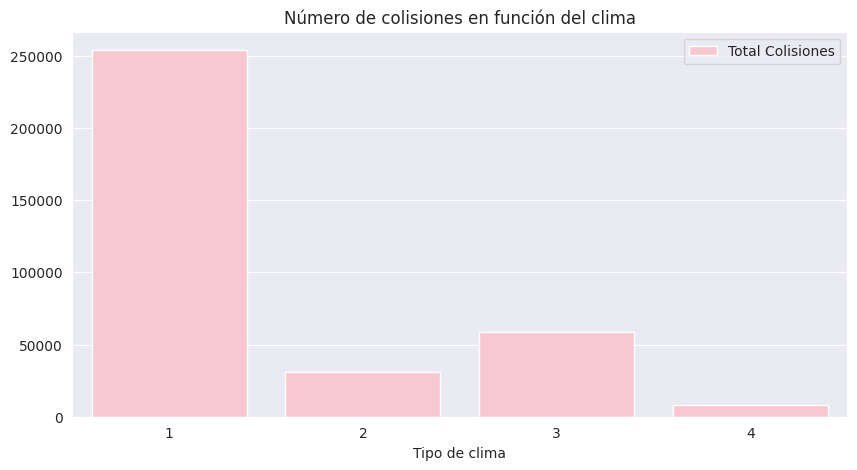

In [54]:
df1 = df.groupby('C_WTHR').size()
ax = plt.subplots(figsize = (10,5))
ax = sns.barplot(x=df1.index, y=df1.values, color='pink', label='Total Colisiones')
ax.set(xlabel="Tipo de clima", title='Número de colisiones en función del clima')
ax.legend()

plt.show()

En el gráfico podemos observar que la mayoría de accidentes ocurren cuando el día es soleado, es decir, con una climatología normal.

* **C_RSUR**: Superficie de la carretera

La variable *'C_RSUR'* indica la condición de la superficie del pavimento cuando se produjo el accidente. Inicialmente, estos son los valores que toma la variable:

`1`: Superficie seca, normal

`2`: Superficie mojada

`3`: Superficie con nieve fresca y suelta

`4`: Superficie con aguanieve, nieve mojada

`5`: Superficie helada o con nieve compactada

`6`: Superficie con arena/grava/tierra (camino)

`7`: Superficie fangosa

`8`: Superficie con líquido derramado


`9`: Superficie inundada




In [55]:
df['C_RSUR'].value_counts()

1    238491
2     65769
5     23463
3     16549
4      6065
6      1276
7       236
8        81
9        20
Name: C_RSUR, dtype: int64

En esta variable tomamos la decisión de reducir de 9 tipos a 4. Las nuevas clases serán las siguientes:

`1`: **Superficie normal/seca**. Corresponde con los valores de la categoría 1 original.

`2`: **Superficie mojada**. Corresponde con los valores de la categoría 2 original.

`3`: **Suelo con nieve/hielo**. En esta variable agrupamos los valores de las categorías 3, 4 y 5.

`4`: **Otros**: Camino, superficie con líquidos, fangosa, etc. Contiene las categorías 6, 7, 8 y 9.


In [56]:
df.loc[df['C_RSUR']==1, 'C_RSUR'] = 1                               
df.loc[df['C_RSUR']==2, 'C_RSUR'] = 2                               
df.loc[df['C_RSUR'].between(3, 5, inclusive=True), 'C_RSUR'] = 3   
df.loc[df['C_RSUR'].between(6, 9, inclusive=True), 'C_RSUR'] = 4    
df['C_RSUR'] = df['C_RSUR'].astype('category')
df['C_RSUR'].value_counts()

1    238491
2     65769
3     46077
4      1613
Name: C_RSUR, dtype: int64

Mostramos el correspondiente gráfico:

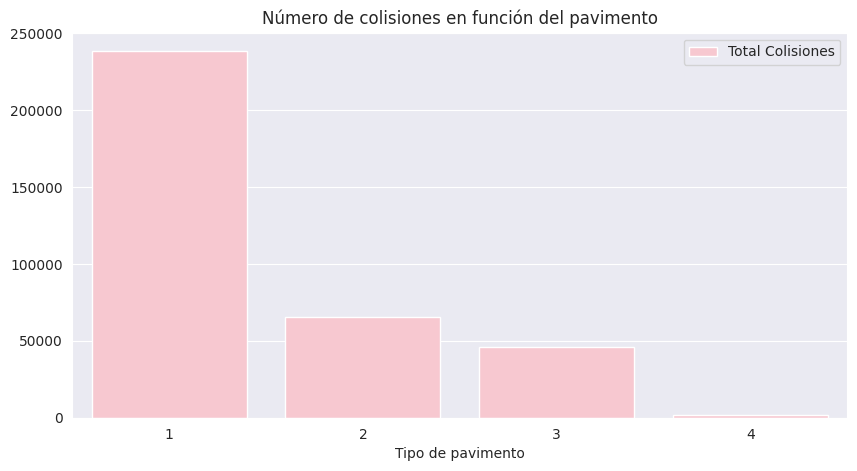

In [57]:
df1 = df.groupby('C_RSUR').size()
ax = plt.subplots(figsize = (10,5))
ax = sns.barplot(x=df1.index, y=df1.values, color='pink', label='Total Colisiones')
ax.set(xlabel="Tipo de pavimento", title='Número de colisiones en función del pavimento')
ax.legend()

plt.show()

En el gráfico podemos observar que la mayoría de accidentes ocurren cuando el pavimento se encuentra en condiciones normales, es decir, seco.


* **C_RALN**: Alineación vial.

Decidimos eliminar también esta variable ya que continúa en la línea de la variable eliminada anteriormente(*'C_RCFG'*), se trata de datos muy precisos sobre el lugar en el que ocurrió el accidente. 

In [58]:
df = df.drop(['C_RALN'], axis=1)

* **C_TRAF**: Control de tráfico

Para esta variable decidimos crear las siguientes categorías que indican si había algún tipo de regulación para el tráfico en el momento del accidente.

`0`: **No hay control presente**. Categoría 18.

`1`: **Pesencia de control**: Corresponde a las categorías iniciales de la 1 a la 17. Se agrupan diferentes tipos de control como semáforos, pasos de peatones, agentes,...










In [59]:
df.loc[df['C_TRAF'].between(1, 17, inclusive=True), 'C_TRAF'] = 1
df.loc[df['C_TRAF']== 18, 'C_TRAF'] = 0
df['C_TRAF'] = df['C_TRAF'].astype('category')
df['C_TRAF'].value_counts()

0    182513
1    169437
Name: C_TRAF, dtype: int64

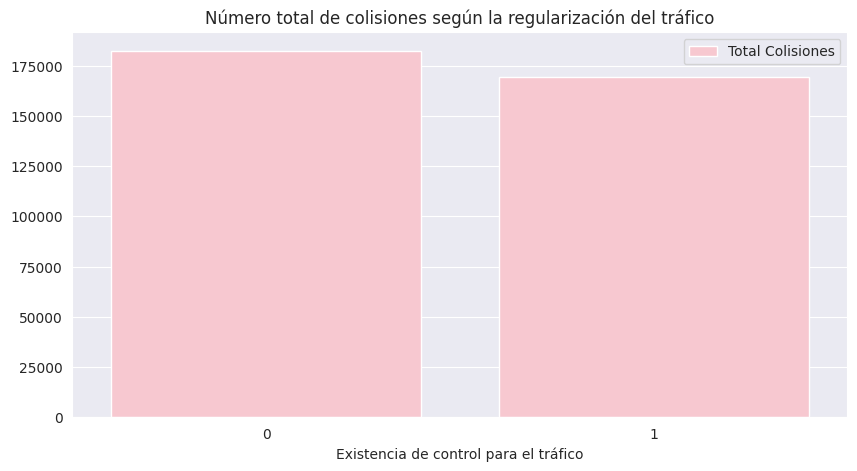

In [60]:
df1 = df.groupby('C_TRAF').size()
ax = plt.subplots(figsize = (10,5))
ax = sns.barplot(x=df1.index, y=df1.values, color='pink', label='Total Colisiones')
ax.set(xlabel="Existencia de control para el tráfico", title='Número total de colisiones según la regularización del tráfico')
ax.legend()

plt.show()

Se observa que ambas clases poseen un número alto de colisiones, es posible que podamos decir que ocurren gran cantidad de colisiones indiferentemente de la existencia de control para el tráfico o no .

* **V_TYPE**: Tipo de vehículo. Se trata de una variable con numerosas categorías que concentraremos en las siguientes:

`-1`: **Peatón**.

`1`: **Vehículo liviano (automóvil)**. Corresponde a la categoría 1 anterior.

`2`: **Camiones, furgonetas y autobuses**. Corresponde a las categorías 5, 6, 7, 9, 10, 11 y 21

`3`: **Vehículos de dos ruedas**. (Motocicletas, bicicleta, ...). Categorías 14, 17 y 22.

`4`: **Otro tipo de vehículos (Autocaravana, maquinaria agrícola, ...)** Categorías 8, 16, 18, 19, 20, 23.




In [61]:
df.loc[df['V_TYPE']==8, 'V_TYPE'] = 4
df.loc[df['V_TYPE'].between(5, 11, inclusive=True), 'V_TYPE'] = 2
df.loc[df['V_TYPE']==21, 'V_TYPE'] = 2 
df.loc[df['V_TYPE']==14, 'V_TYPE'] = 3
df.loc[df['V_TYPE']==17, 'V_TYPE'] = 3
df.loc[df['V_TYPE']==22, 'V_TYPE'] = 3
df.loc[df['V_TYPE'].between(16, 23, inclusive=True), 'V_TYPE'] = 4
df['V_TYPE'] = df['V_TYPE'].astype('category')
df['V_TYPE'].value_counts()

1     313064
2      20125
3       9430
-1      4879
4       4452
Name: V_TYPE, dtype: int64

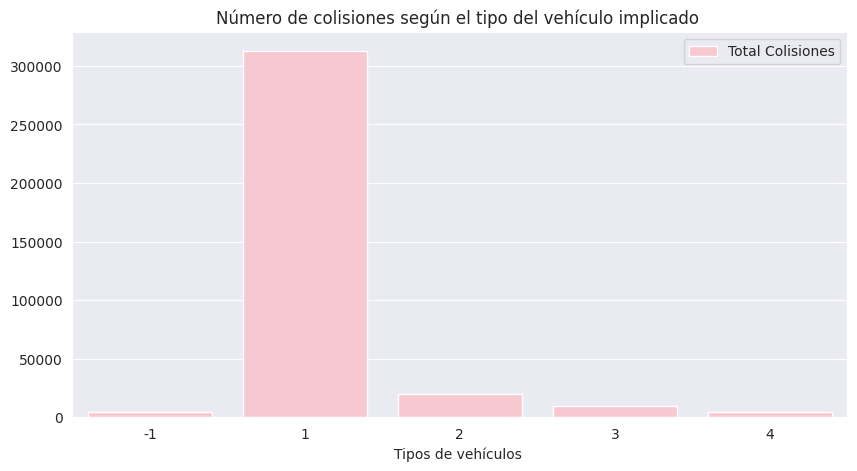

In [62]:
df1 = df.groupby('V_TYPE').size()
ax = plt.subplots(figsize = (10,5))
ax = sns.barplot(x=df1.index, y=df1.values, color='pink', label='Total Colisiones')
ax.set(xlabel="Tipos de vehículos ", title='Número de colisiones según el tipo del vehículo implicado ')
ax.legend()

plt.show()

Observamos que la mayoría de accidentes ocurren con vehículos livianos, ya que son los más numerosos.


* **V_YEAR**: Año de fabricación del vehículo.

Veamos los valores que toma ya que tal vez una buena transformación para esta variable sería categorizar la variable según distintos rangos de antigüedad.

In [63]:
df['V_YEAR'].value_counts()

2007    26450
2008    25049
2005    24294
2010    23341
2006    23133
        ...  
1963        1
1951        1
1937        1
1931        1
1916        1
Name: V_YEAR, Length: 78, dtype: int64

Observamos que la variable toma 78 valores distintos. Además podemos ver que algunas de ellas no son muy representativas ya que hay años a los que solo pertenecen un coche. Veamos varios gráficos que nos confirmaran estas suposiones.

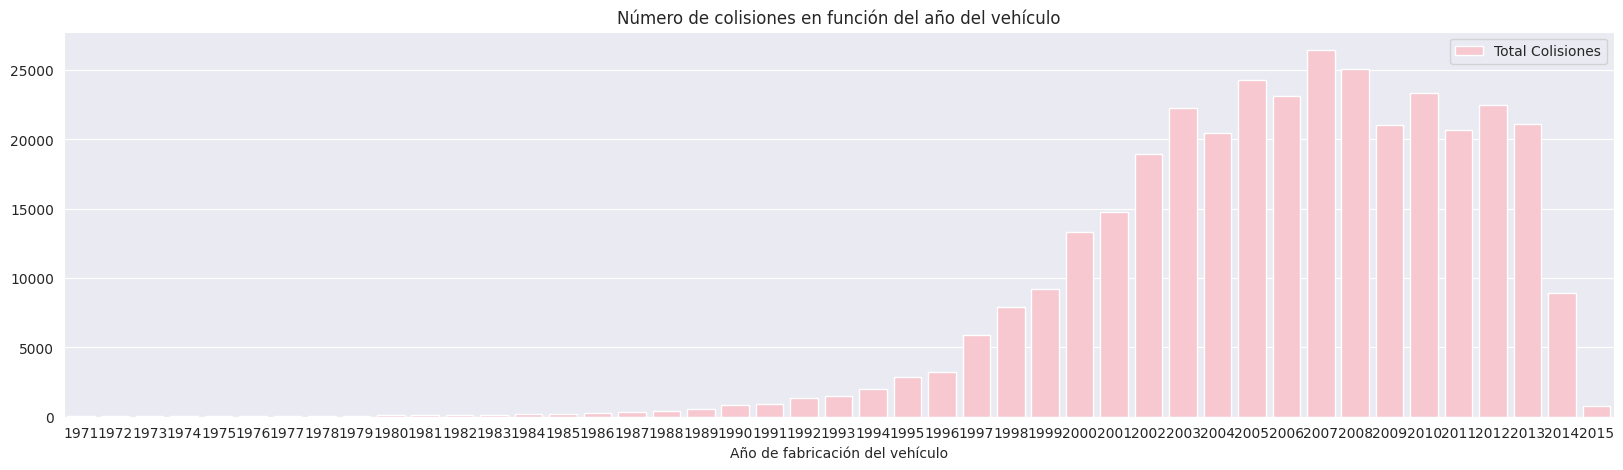

In [64]:
df0 = df[df['V_YEAR']>1970]
df1 = df0.groupby('V_YEAR').size()

ax = plt.subplots(figsize = (20,5))
ax = sns.barplot(x=df1.index, y=df1.values, color='pink', label='Total Colisiones')
ax.set(xlabel="Año de fabricación del vehículo", title='Número de colisiones en función del año del vehículo')
ax.legend()

plt.show()

Observamos que mantener así esta variable no es de mucha utilidad, ya que tener años con tan pocas observaciones no aporta ningún tipo de información. Por tanto, decidimos agrupar los años en tres categorías distintas:

`-1`: Peatón

`0`: Vehículos fabricados entre los años 1900 - 1990

`1`: Vehículos fabricados entre los años 1990 - 2000

`2`: Vehículos fabricados entre los años 2000 - 2014

**OBSERVACIÓN**: Eliminamos las colisiones en las que el año de fabricación corresponde a 2015 ya que consideramos este dato erroneo al estar trabajando únicamente con siniestros de los años 2013 y 2014.



In [65]:
df = df[df.V_YEAR < 2015]
df.loc[(df['V_YEAR'] > 2000),'V_YEAR'] = 2
df.loc[df['V_YEAR'] >= 1990, 'V_YEAR'] = 1 
df.loc[df['V_YEAR'] >= 1900, 'V_YEAR'] = 0
df['V_YEAR'] = df['V_YEAR'].astype('category')

df['V_YEAR'].value_counts() 

2     292980
1      49025
-1      6289
0       2848
Name: V_YEAR, dtype: int64

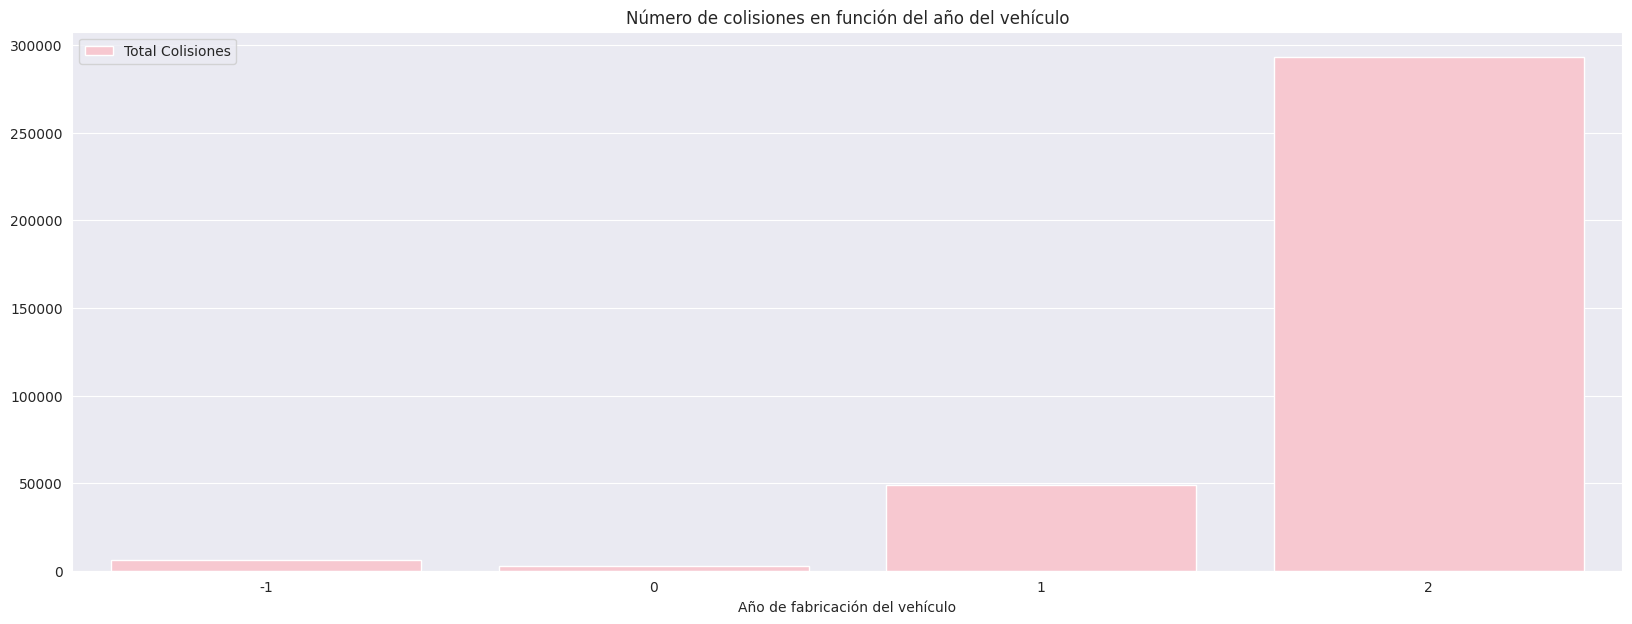

In [66]:
df1 = df.groupby('V_YEAR', sort=True).size().sort_index()
ax = plt.subplots(figsize = (20,7))
ax = sns.barplot(x=df1.index, y=df1.values, color='pink', label='Total Colisiones')
ax.set(xlabel="Año de fabricación del vehículo", title='Número de colisiones en función del año del vehículo')
ax.legend()
plt.show()

Se observa que la mayoría de colisiones son producidas por vehículos cuyo año de fabricación es de los años 2000 hasta la actualidad, ya que son los vehículos más numerosos.

* **P_AGE**: Edad de la víctima

In [67]:
df['P_AGE'].value_counts()

18    8969
19    8839
20    8704
22    8335
21    8284
      ... 
96      21
95      19
99      15
98      14
97      12
Name: P_AGE, Length: 99, dtype: int64

Observamos que toma un total de 99 valores distintos. 

###### ***Proporción de fallecimientos respecto al total de colisiones por edad.***

Vemos cómo se comporta la proporción de personas fallecidas respecto al total de colisiones en función de la edad mediante el siguiente barplot:

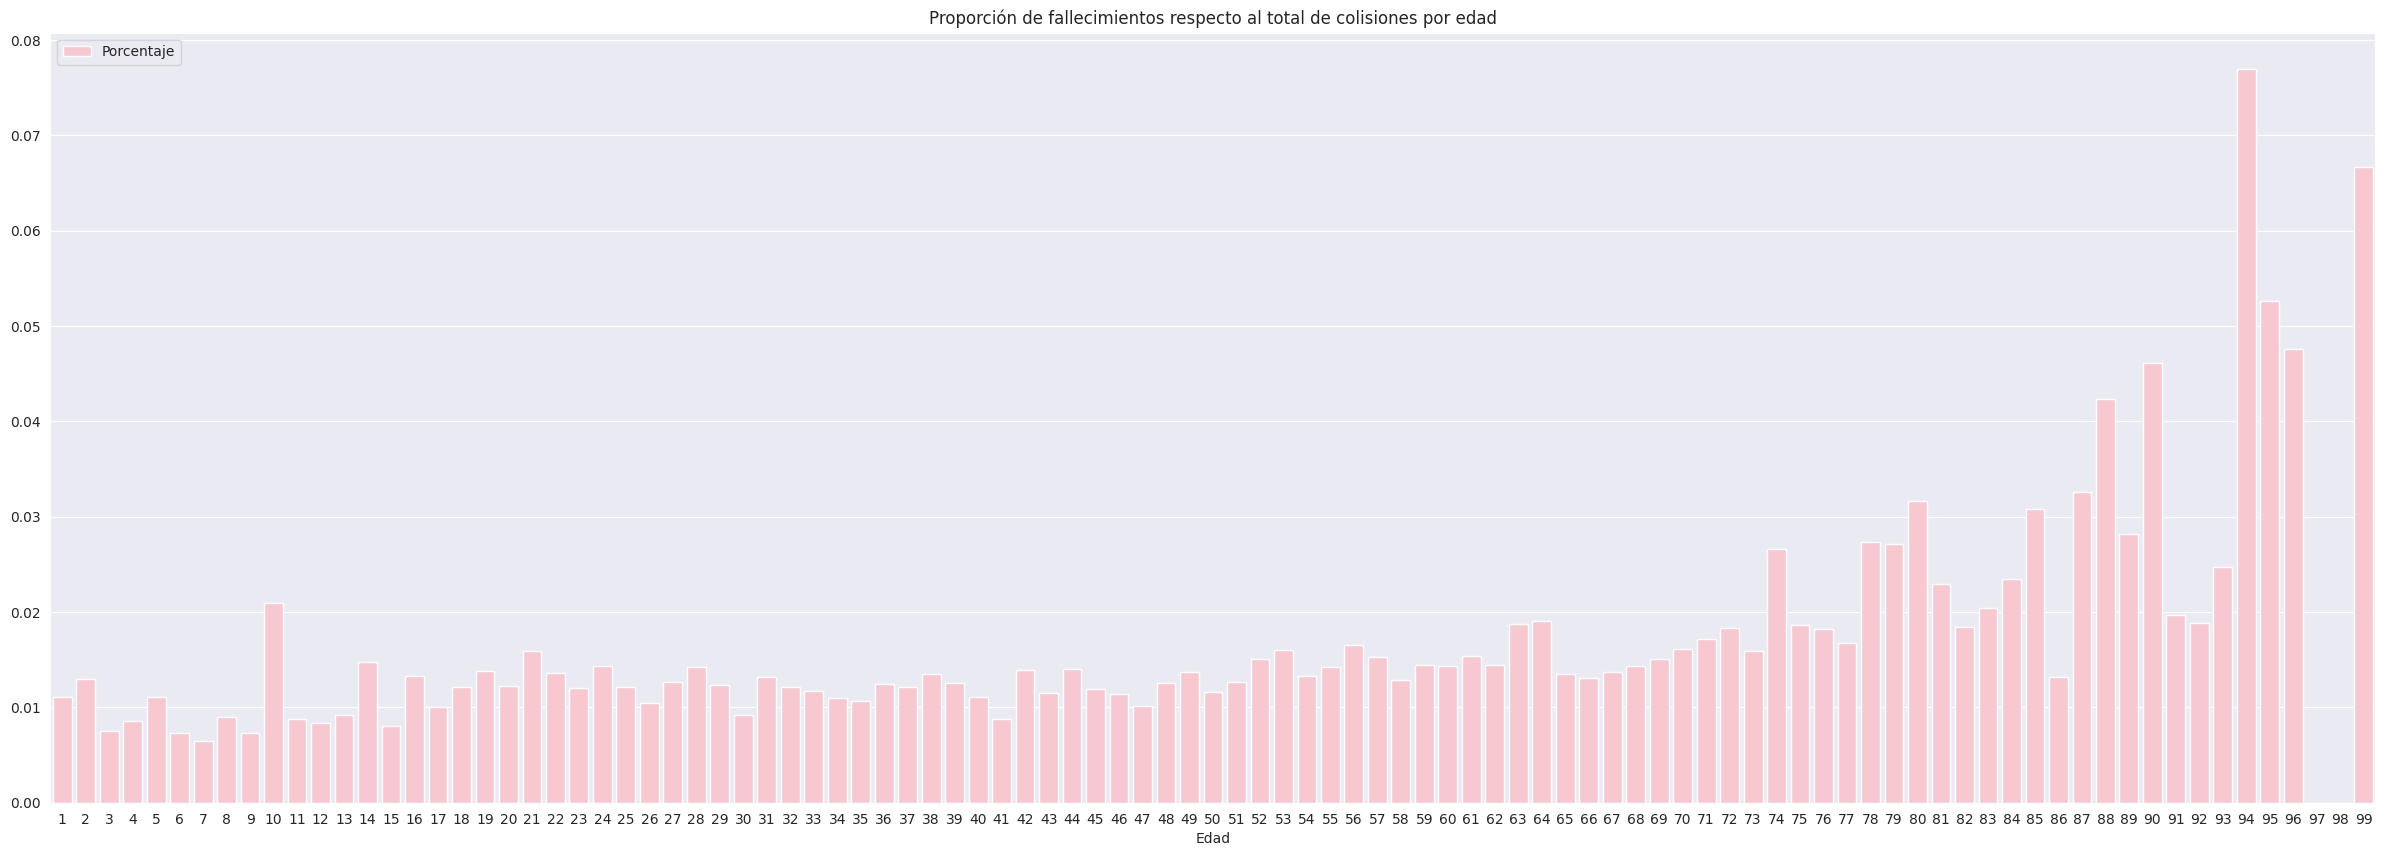

In [68]:
df1 = df[df['C_SEV']==1].groupby('P_AGE').size() / df.groupby('P_AGE').size()

ax = plt.subplots(figsize = (30,10))
ax = sns.barplot(x=df1.index, y=df1.values, color='pink', label='Porcentaje')
ax.set(xlabel="Edad", title='Proporción de fallecimientos respecto al total de colisiones por edad')
ax.legend()

plt.show()

Podemos ver que la proporción de fallecidos aumenta a medida que va aumentando la edad de la persona.

##### ***Número de colisiones en función de la edad***
Veamos ahora cual ha sido el número total de colisiones agrupando por esta misma variable:

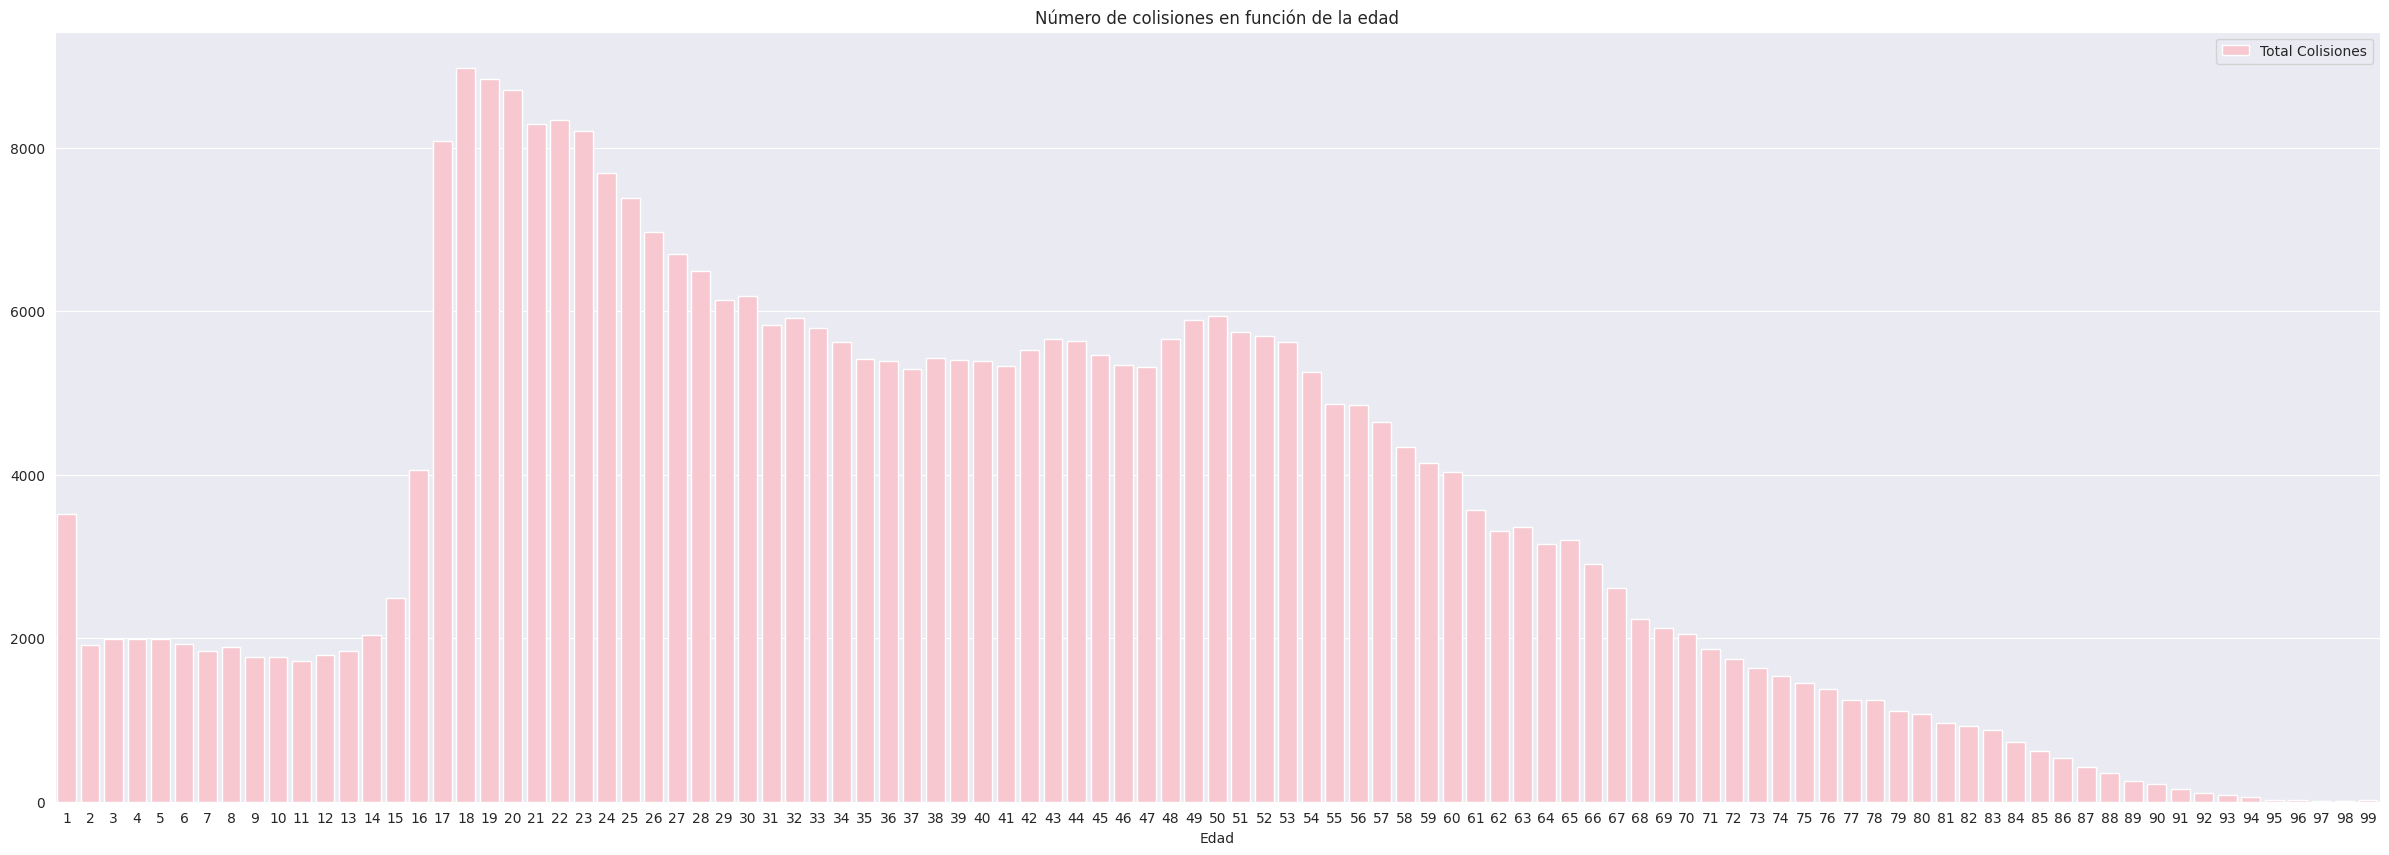

In [69]:
df1 = df.groupby('P_AGE').size()

ax = plt.subplots(figsize = (30,10))
ax = sns.barplot(x=df1.index, y=df1.values, color='pink', label='Total Colisiones')
ax.set(xlabel="Edad", title='Número de colisiones en función de la edad')
ax.legend()

plt.show()

En Canadá, **la edad en la que se puede obtener el carnét de conducir son los 16 años**. Esta es posiblemente la razón por la que somos capaces de observar un gran aumento en el número de colisiones a partir de los 17 años. 

Vamos a modificar la variable categórica, agrupando las edades de la siguiente forma:


- `0`: Menores (0-16)
- `1`: Jóvenes (17-30)
- `2`: Adultos (30-50)
- `3`: Mayores (50-70)
- `4`: Grupo de riesgo (70+)



In [70]:
df.loc[df['P_AGE'] < 17, 'P_AGE'] = 0       
df.loc[df['P_AGE'] >= 70, 'P_AGE'] = 4       
df.loc[df['P_AGE'] >= 50, 'P_AGE'] = 3      
df.loc[df['P_AGE'] >= 30, 'P_AGE'] = 2      
df.loc[df['P_AGE'] >= 17, 'P_AGE'] = 1      
df['P_AGE'].value_counts()

2    111515
1    100782
3     81600
0     34552
4     22693
Name: P_AGE, dtype: int64

Observemos de nuevo el gráfico box plot de la variable con los valores ya agrupados, y así ahora vemos de mejor forma como estan distribuidos.

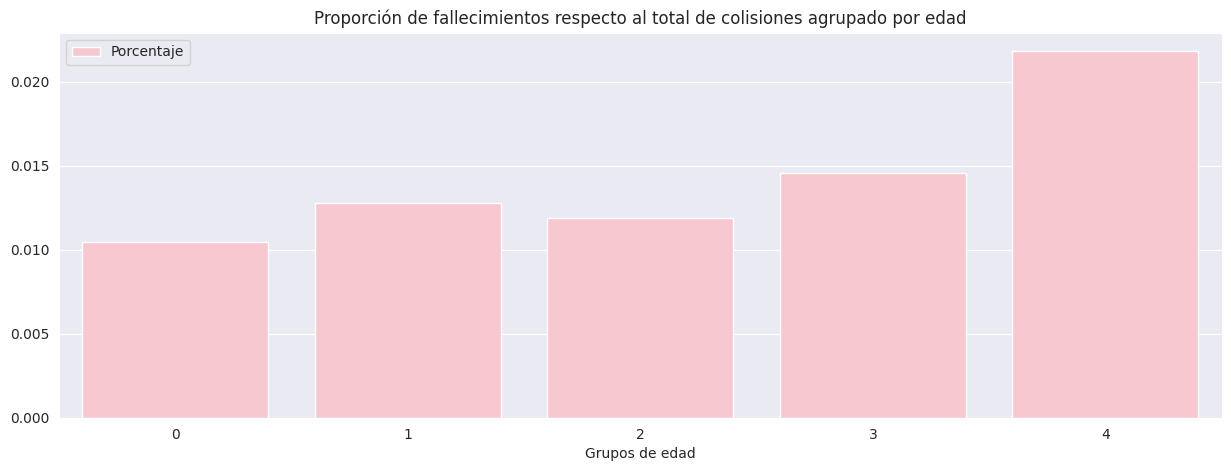

In [71]:
df1 = df[df['C_SEV']==1].groupby('P_AGE').size() / df.groupby('P_AGE').size()

ax = plt.subplots(figsize = (15,5))
ax = sns.barplot(x=df1.index, y=df1.values, color='pink', label='Porcentaje')
ax.set(xlabel="Grupos de edad", title='Proporción de fallecimientos respecto al total de colisiones agrupado por edad')
ax.legend()

plt.show()

Observando el gráfico podemos concluir que, los grupos 3 y 4 son los que reflejan más fallecimientos, lo cual tiene sentido debido a la salud propia del pasajero.

* **P_PSN**: Posición de la persona en el momento del accidente.

In [72]:
df = df.astype({"P_PSN":'int64'})
df['P_PSN'].value_counts()

11    243236
13     56030
23     18518
21     15097
22      5069
99      4879
12      4116
96      1860
32      1769
33       276
31       209
98        57
97        26
Name: P_PSN, dtype: int64

Cada uno de estos valores tiene un significado concreto que indica la posición de la víctima en el momento del accidente. Agruparemos todas estas clases en las siguientes:

**`-1`: Peatones.** Clase formada por el valor 99, siendo estos peatones.

**`1`: Primera fila.** Clase formada por los valores entre 11 y 13 ambos inclusives, siendo estos los pasajeros se encontraban en la parte delante del vehículo (1º fila, incluyendo motocicletas con sidecar).

**`2`: Segunda fila**. Clase formada por los valores entre 21 y 23 ambos inclusives, siendo estos los pasajeros se encontraban en la parte trasera del vehículo (2º fila, incluyendo motocicletas).

**`3`: Tercera fila**. Clase formada por los valores entre 31 y 33 ambos inclusives, siendo estos los pasajeros se encontraban en la tercera fila del vehículo o en filas superiores.

**`4`: Posición alternativa**. Clase formada por los valores entre 96 y 98, pasajeros en una posición desconocida, regazo de alguien, exterior del habitáculo...

**`5`: Conductores**. Clase formada por el valor 11, siendo este los conductores de el vehículo.




 


In [73]:
df.loc[df['P_PSN'].between(12, 13, inclusive=True), 'P_PSN'] = 1    
df.loc[df['P_PSN'].between(21, 23, inclusive=True), 'P_PSN'] = 2    
df.loc[df['P_PSN'].between(31, 33, inclusive=True), 'P_PSN'] = 3  
df.loc[df['P_PSN'].between(96, 98, inclusive=True), 'P_PSN'] = 4
df.loc[df['P_PSN']==99, 'P_PSN'] = -1     
df.loc[df['P_PSN']==11, 'P_PSN'] = 5
df['P_PSN'] = df['P_PSN'].astype('category')


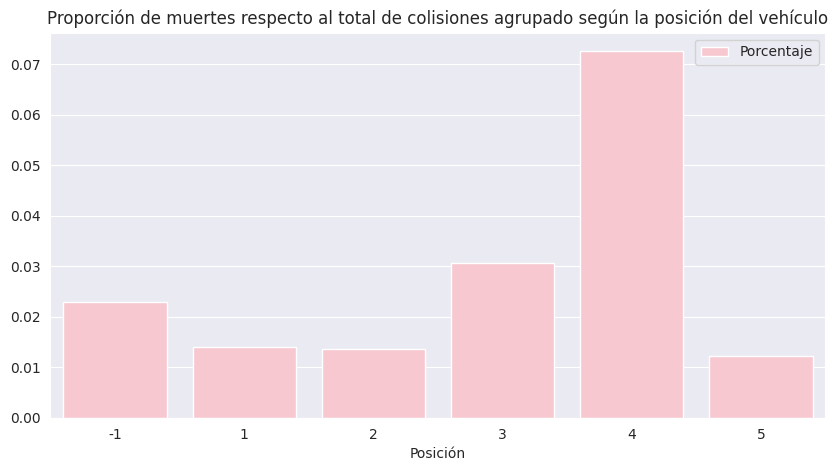

In [74]:
df1 = df[df['C_SEV']==1].groupby('P_PSN').size() / df.groupby('P_PSN').size()

ax = plt.subplots(figsize = (10,5))
ax = sns.barplot(x=df1.index, y=df1.values, color='pink', label='Porcentaje')
ax.set(xlabel="Posición", title='Proporción de muertes respecto al total de colisiones agrupado según la posición del vehículo')
ax.legend()

plt.show()

Podemos observar que en la mayoría de accidentes la posición del pasajero es desconocida.

* **P_ISEV**: Tratamiento médico requerido por la víctima

Esta variable hace referencia al estado del pasajero tras el accidente. Decidimos agrupar la variable en los siguientes valores para un posterior estudio del coste que supondrá a la aseguradora el siniestro en función de si se requiere o no asistencia médica:

`0`: Víctima sin lesiones. Categoría 1 anterior (víctima sin lesiones)

`1`: Víctima con lesiones o fallecida. Categorías 2 (víctima con lesiones) y 3 (víctima fallecida).

In [75]:
df['P_ISEV'] = np.where(df['P_ISEV'] == 2, 1, np.where(df['P_ISEV'] == 3, 1, 0))
df['P_ISEV'].value_counts()

1    200750
0    150392
Name: P_ISEV, dtype: int64

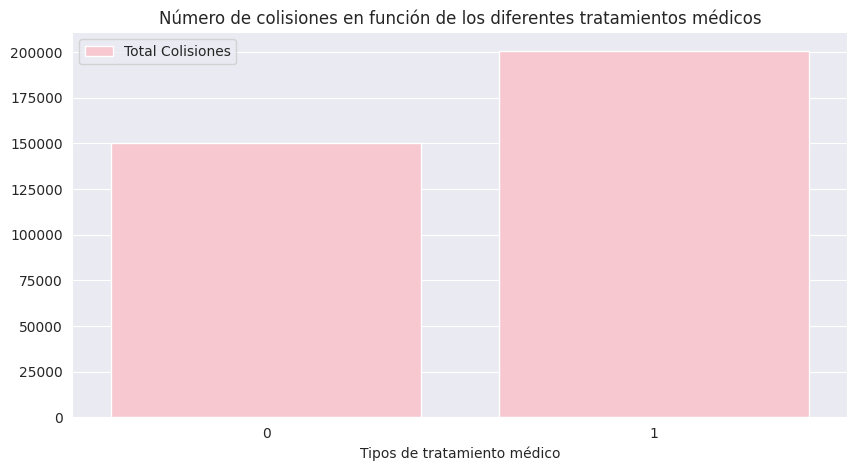

In [76]:
df1 = df.groupby('P_ISEV').size()

ax = plt.subplots(figsize = (10,5))
ax = sns.barplot(x=df1.index, y=df1.values, color='pink', label='Total Colisiones')
ax.set(xlabel="Tipos de tratamiento médico", title='Número de colisiones en función de los diferentes tratamientos médicos')
ax.legend()

plt.show()

Observamos que la clase mayoritaria es en la que los accidentados presentas lesiones o son fallecidos. Aunque como ya vimos, la mayoría de accidentes eran no mortales, lo que nos hace pensar que gran parte serán sólamente accidentados heridos.


* **P_SAFE**: Uso de dispositivos de seguridad. Tranformamos los datos proporcionados por esta variable en binarios.


`0`: No se utilizó dispositivo de seguridad. Categorías 1 y 13

`1`: Dispositivo de seguridad utilizado. Categorías 2, 9, 10, 11, 12. (Casco, chaqueta reflectante,...)

In [77]:
df.loc[df['P_SAFE']==13, 'P_SAFE'] = 0
df.loc[df['P_SAFE']==1, 'P_SAFE'] = 0
df.loc[df['P_SAFE'].between(2, 12, inclusive=True), 'P_SAFE'] = 1
df['P_SAFE'] = df['P_SAFE'].astype('category')

In [78]:
df['P_SAFE'].value_counts()

1    335091
0     16051
Name: P_SAFE, dtype: int64

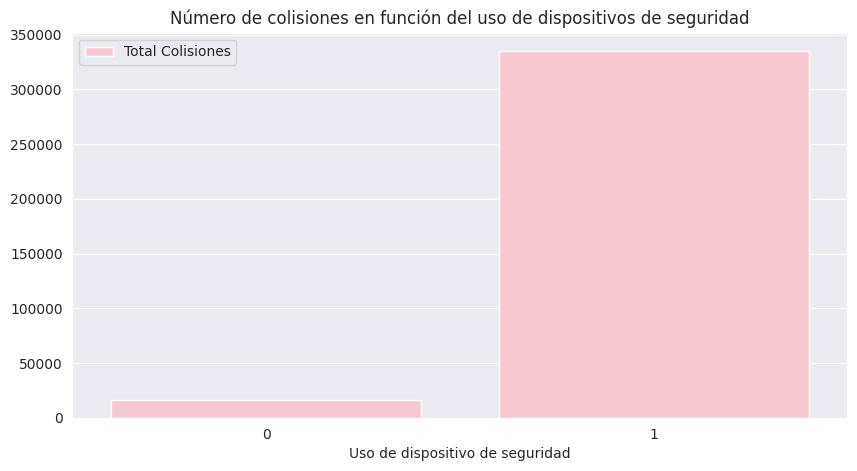

In [79]:
df1 = df.groupby('P_SAFE').size()

ax = plt.subplots(figsize = (10,5))
ax = sns.barplot(x=df1.index, y=df1.values, color='pink', label='Total Colisiones')
ax.set(xlabel="Uso de dispositivo de seguridad", title='Número de colisiones en función del uso de dispositivos de seguridad')
ax.legend()

plt.show()

Podemos observar que en la mayoría de colisiones se usaron dispositivos de seguridad.

* **P_USER**: Tipo de usuario de la carretera.

Esta variable indica si la víctima era un pasajero o un conductor. Para el análisis que se quiere realizar se trata de una variable relevante.

In [80]:
df = df.drop(['P_USER'], axis=1)

Una vez se han tratado todas las variables, comprobamos que efectivamente, las categorías ahora sí están bien asignadas.


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351142 entries, 5245767 to 5860380
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   C_MNTH  351142 non-null  int64   
 1   C_WDAY  351142 non-null  category
 2   C_HOUR  351142 non-null  category
 3   C_SEV   351142 non-null  category
 4   C_VEHS  351142 non-null  int64   
 5   C_CONF  351142 non-null  category
 6   C_WTHR  351142 non-null  category
 7   C_RSUR  351142 non-null  category
 8   C_TRAF  351142 non-null  category
 9   V_TYPE  351142 non-null  category
 10  V_YEAR  351142 non-null  category
 11  P_SEX   351142 non-null  category
 12  P_AGE   351142 non-null  int64   
 13  P_PSN   351142 non-null  category
 14  P_ISEV  351142 non-null  int64   
 15  P_SAFE  351142 non-null  category
dtypes: category(12), int64(4)
memory usage: 17.4 MB


### **3.5 MATRIZ DE CORRELACIONES**

<Axes: >

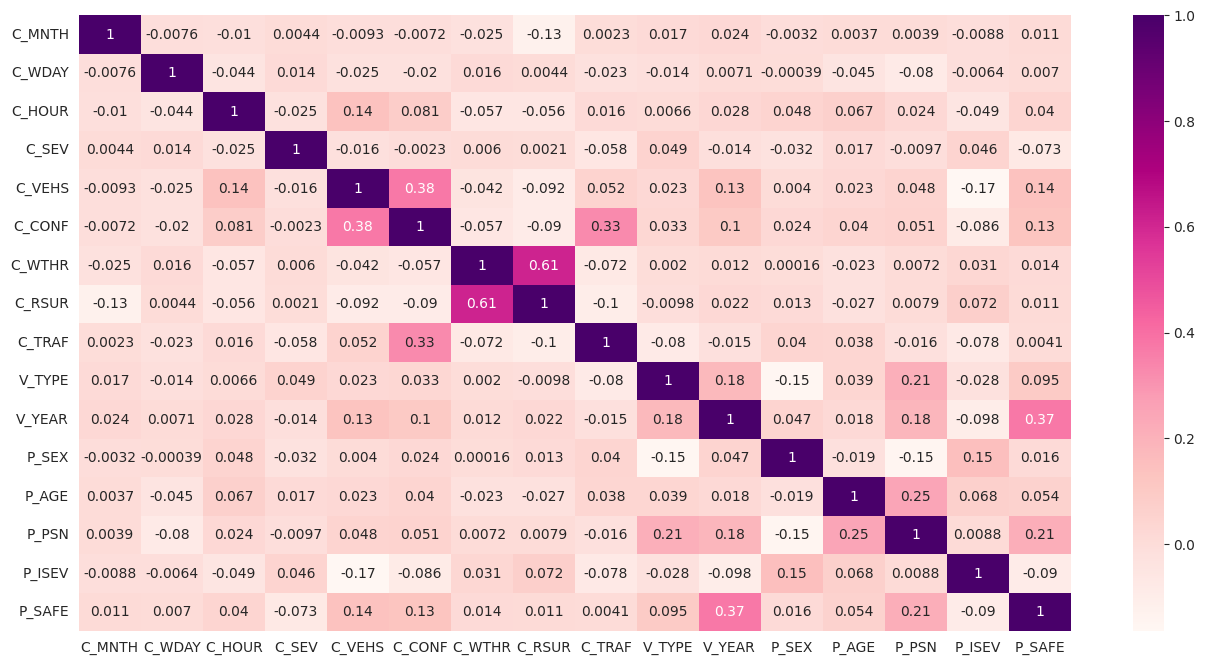

In [82]:
df_int = df.astype('int64')
correlaciones = df_int.corr()
plt.figure(figsize=(16,8))
sns.heatmap(correlaciones,cmap="RdPu", annot = True)

Observamos mediante el mapa de calor, que las máximas correlaciones son entre el tiempo atmosférico *'C_WTHR'* y la condición del pavimento *'C_RSUR'*. Sin embargo, no se trata de valores muy grandes y en clasificación, las variables correlacionadas no tienen un gran impacto en los algoritmos, por lo que decidimos no eliminar ninguna variable del dataset.

Finalmente nuestro conjunto de datos definitivo que utilizaremos en el estudio está formado por 16 variables y 351.142 observaciones.

In [83]:
df.shape

(351142, 16)

## **4. VISUALIZACIÓN RELACIONES ENTRE VARIABLES**

Una vez finalizado el estudio, el objetivo es ser capaces de contestar a las siguientes preguntas:

**1.** ¿Qué tipos de vehículos (modelos, antigüedad, etc.) y conductores son más propensos a tener accidentes (acción correctiva en prima)?

**2.** ¿Qué tipos de vehículos (modelos, antigüedad, etc.) y conductores son menos propensos a tener accidentes (descuento en prima)?

**3.** ¿Qué es lo que más contribuye a que existan fallecimientos en un accidente?

**4.** Dado un accidente, ¿se puede generar un modelo que prediga si habrá fallecimientos o no? ¿Si se va a necesitar tratamiento médico o no? Las aseguradoras tienen que inmovilizar capital para pagar estas casuísticas. 



Por tanto, las variables que utilizaremos como variables objetivo son ***C_SEV*** y ***P_ISEV***.

La variable ***C_SEV*** representa la gravedad de la colisión. Dicha variable contiene los siguientes valores:

`0`: Accidente que produce lesiones no mortales.

`1`: Accidente que produce al menos una víctima mortal.





La variable ***P_ISEV*** representa el estado de salud del accidentado. Dicha variable contiene los siguientes valores:

`0`: Víctima sin lesiones

`1`: Víctima con lesiones o fallecida







### **4.1 ESTUDIO DE LA GRAVEDAD DE LA COLISIÓN**:

In [84]:
df['C_SEV'].value_counts()

0    346481
1      4661
Name: C_SEV, dtype: int64

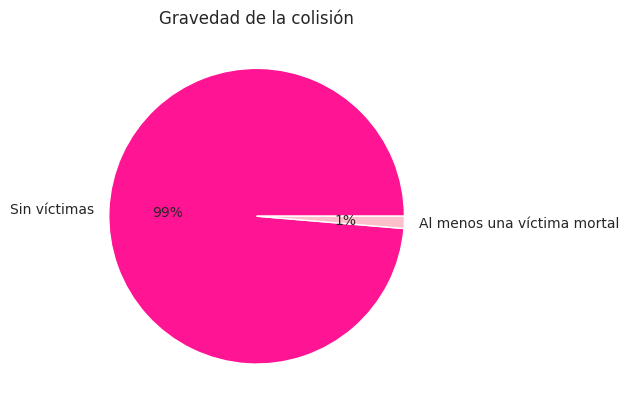

In [85]:
data = [df['C_SEV'].value_counts().iloc[0], df['C_SEV'].value_counts().iloc[1]]
labels = ['Sin víctimas', 'Al menos una víctima mortal']
#colors = sns.color_palette("tab10")
colors = ['deeppink', 'pink']
plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%')
plt.title("Gravedad de la colisión")
plt.show()

Se observa que del total de los accidentes, únicamente un 1% tiene al menos una víctima mortal. Mientras que el 99% de los accidentes no tiene víctimas mortales.

* **VARIABLES C_SEV Y C_WTHR**

Veamos la relación entre las variables ***'C_SEV'*** y ***'C_WTHR'*** con el objetivo de encontrar alguna relación entre la climatología del día del accidente y la gravedad del mismo.

In [86]:
crosstab_sev_wthr = pd.crosstab(index=df['C_SEV'], columns=df['C_WTHR'], margins=True).apply(lambda r: r/len(df) *100, axis=1)
crosstab_sev_wthr.index = ['Sin victimas mortales', 'Victimas mortales' ,'Total']
crosstab_sev_wthr.columns = ['Soleado', 'Nublado sin precipitacion', 'Precipitaciones', 'Clima adverso', 'Total']
crosstab_sev_wthr

,Soleado,Nublado sin precipitacion,Precipitaciones,Clima adverso,Total
Sin victimas mortales,71.191427,8.753154,16.594996,2.133040,98.672617
Victimas mortales,0.952036,0.122742,0.170871,0.081733,1.327383
Total,72.143463,8.875896,16.765867,2.214774,100.000000


En la tabla podemos observar que: 

* Del 1.32% de víctimas mortales, el 0.95% ocurren en días soleados. Un porcentaje bastante más alto al resto de climatologías ya que se puede observar que los dias lluviosos a penas un 0.17% de accidentes tienen al menos una victima mortal. 

* Si se analizan los datos ofrecidos de accidentes sin víctimas mortales, del 98.67% el 71% se produce en los días soleados, una cifra más alta que los días con precipitación (16.59%) 

Estas conclusiones pueden deberse a la velocidad a la que se produce el accidente ya que en días con climatologías adversas, se reduce la velocidad y por tanto, sobrevivir a un accidente es mas probable que un día soleado. Esta hipótesis no se puede comprobar ya que no hay una variable que nos diga a la velocidad a la que se produce un accidente tanto con víctimas mortales como sin ellas.

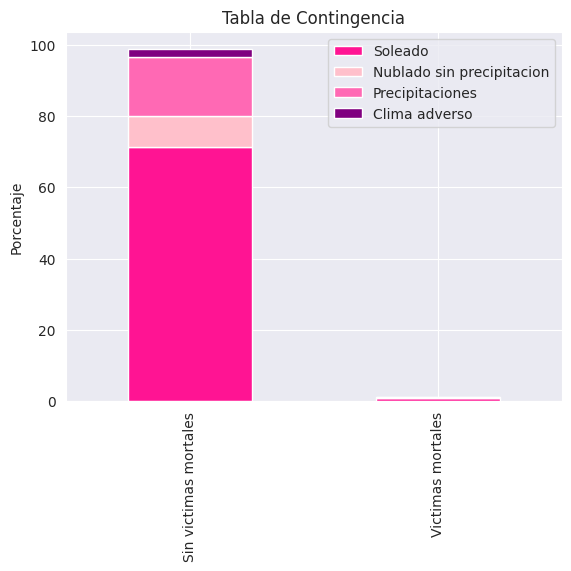

In [87]:
data = crosstab_sev_wthr.iloc[:-1, :-1]
colors = ['deeppink', 'pink', 'hotpink', 'purple', 'blue', 'black', 'yellow']
data.plot(kind='bar', stacked=True, color=colors)
plt.ylabel('Porcentaje')
plt.title('Tabla de Contingencia')

plt.show()


### **4.2 VARIABLE SALUD DEL ACCIDENTADO:**

In [88]:
df['P_ISEV'].value_counts()

1    200750
0    150392
Name: P_ISEV, dtype: int64

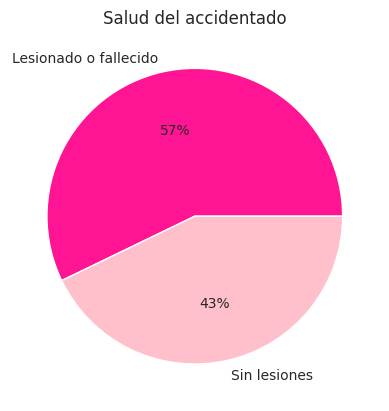

In [89]:
data = [df['P_ISEV'].value_counts().iloc[0], df['P_ISEV'].value_counts().iloc[1]]
labels = ['Lesionado o fallecido', 'Sin lesiones']
colors = ['deeppink','pink']
plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%')
plt.title('Salud del accidentado')
plt.show()

En esta variables se puede observar que el 57% de los accidentes causan lesionados o fallecidos, mientras que el 43% no causa ningún tipo de lesionado y por tanto ningún requerimiento de tratamiento médico. 

### **4.3 RELACIÓN ENTRE LAS DOS VARIABLES A PREDECIR:**

Analizaremos también si hay cierta relación entre las dos variables a predecir.

In [90]:
crosstab = pd.crosstab(index=df['C_SEV'], columns=df['P_ISEV'], margins=True).apply(lambda r: r/len(df) *100, axis=1)
crosstab.index = ['Sin vic', 'Vic mortal', 'Total']
crosstab.columns = ['Sin lesiones', 'Con lesiones o fallecido', 'Total']
crosstab

,Sin lesiones,Con lesiones o fallecido,Total
Sin vic,42.523537,56.149079,98.672617
Vic mortal,0.305859,1.021524,1.327383
Total,42.829397,57.170603,100.000000


Analizando los resultados obtenidos en la tabla de contingencia, se puede observar que de los accidentes sin victimas mortales, el 56.13% sufre algún tipo de lesiones mientras que el 42.53% no sufre ninguna lesión. Estos datos están bastante equiparados. 



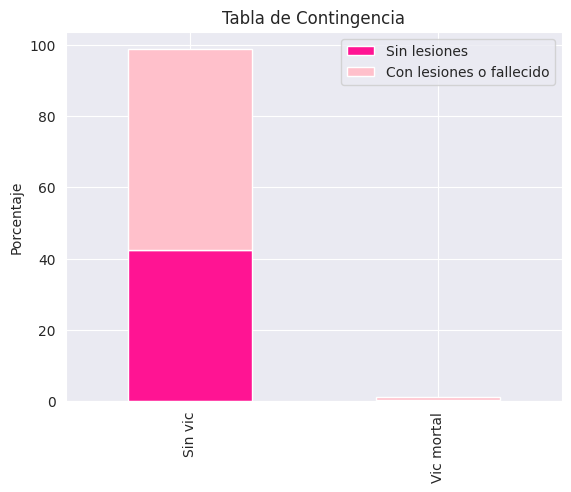

In [91]:
data= crosstab.iloc[:-1, :-1]
colors = ['deeppink', 'pink']
data.plot(kind='bar', stacked=True, color=colors)
plt.ylabel('Porcentaje')
plt.title('Tabla de Contingencia')

plt.show()

Observamos que aun que no hay victimas mortales, es mayor el número de lesionados que el número de accidentados no lesionados.

## **5. BALANCEO DE DATOS Y VARIABLES DUMMY**

### **5.1 BALANCEO DE LOS DATOS**

* **C_SEV**:

Observamos mediante la función value_counts y el barplot un gran desbalanceo esta variable, algo que influye mucho posteriormente en los algoritmo ya que nuestro objetivo principal es extraer conclusiones de las colisiones en las que ha habido fallecidos.

Para resolver esto vamos a proceder el método de **undersampling**, que consiste en modificar la distribución de los datos reduciendo el número de casos de la clase mayoritaria. No procedemos al oversampling, porque hemos observado que en general con el undersampling obtenemos mejores resultados que con oversampling, y también porque tenemos un gran número de observaciones y conviene disminuirlo.

Gracias al balanceo, estaremos priorizando la detección de aquellos accidentes que puedan acabar siendo fatales.

<Axes: >

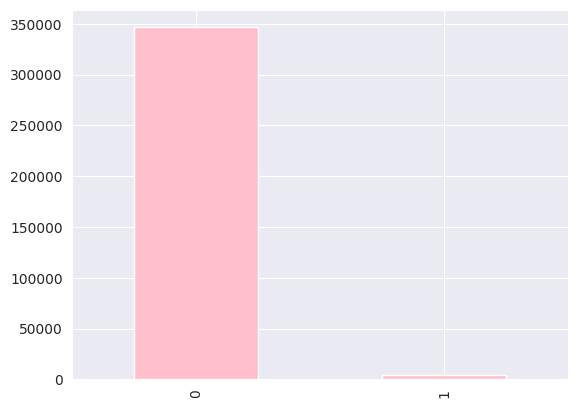

In [92]:
df['C_SEV'].value_counts().plot.bar(color='pink') 

<Axes: >

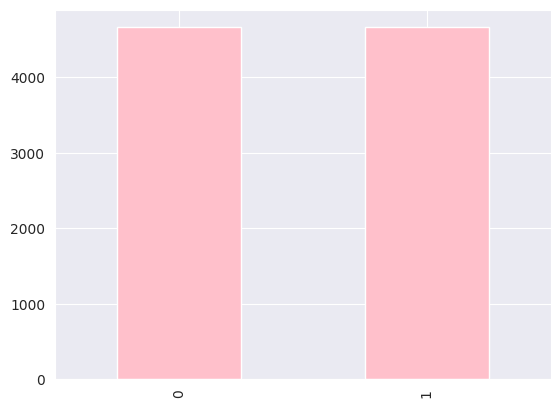

In [93]:
rus = RandomUnderSampler(random_state = 0)
rus.fit_resample(df.drop('C_SEV', axis = 1), df[['C_SEV']])

df_balanced = df.iloc[rus.sample_indices_]
df_balanced['C_SEV'].value_counts().plot.bar(color='pink')


* **P_ISEV**:


<Axes: >

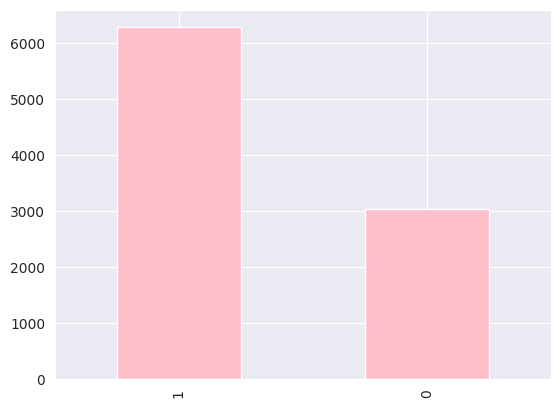

In [94]:
df_balanced['P_ISEV'].value_counts().plot.bar(color='pink') 

Para esta segunda variable observamos que el desbalanceo de los datos no es tan notorio como para la variable anterior. Por tanto, en este caso decidimos no realizar ningún balanceo de los datos. 

### **5.2 CREACIÓN DE VARIABLES DUMMY**

Antes de comenzar a trabajar con los diferentes métodos de predicción, es necesario crear variables dummy mediante one-hot-encoding para algunas de las variables de la base de datos, ya que se trata de variables categóricas en las que su valor numérico no aporta ningún tipo de jerarquía, es decir, los valores que toman las variables no tienen un orden inherente. Este es el caso de las siguientes variables:

* `C_CONF`
* `C_WTHR`
* `C_RSUR`
* `V_TYPE`




In [95]:
variables_categoricas = ['C_CONF', 'C_WTHR', 'C_RSUR', 'V_TYPE']
df_balanced = pd.get_dummies(df_balanced, columns=variables_categoricas)

Renombramos las columnas para una interpretación más sencilla de ellas en el modelo.

In [96]:
df_balanced.rename(columns={'C_CONF_1': 'UN_VHCL', 'C_CONF_2': 'DOS_VHCL_MISM_DIR', 'C_CONF_3': 'DOS_VHCL_DIF_DIR',
       'C_CONF_4': 'DOS_VHL_MOV_PARK', 'C_WTHR_1' :'WTH_SOL', 'C_WTHR_2': 'WTH_NUB', 'C_WTHR_3': 'WTH_PRECIP', 'C_WTHR_4': 'WTH_ADVERSO', 'C_RSUR_1': 'SUP_SECA',
       'C_RSUR_2': 'SUP_MOJADA', 'C_RSUR_3':'SUP_HIELO', 'C_RSUR_4': 'SUP_ALTERN', 'V_TYPE_-1': 'PEATON', 'V_TYPE_1':'AUTOMOVIL', 'V_TYPE_2': 'CAMION-BUS',
       'V_TYPE_3' : 'DOS_RUEDAS', 'V_TYPE_5': 'OTRO_VHCL'}, inplace=True)

Veamos la forma del conjunto de datos definitiva.

In [97]:
df_balanced.head()

,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_TRAF,V_YEAR,P_SEX,P_AGE,P_PSN,...,WTH_ADVERSO,SUP_SECA,SUP_MOJADA,SUP_HIELO,SUP_ALTERN,PEATON,AUTOMOVIL,CAMION-BUS,DOS_RUEDAS,V_TYPE_4
5430964,8,4,3,0,2,1,2,0,0,1,...,0,1,0,0,0,0,1,0,0,0
5524105,11,5,2,0,3,1,2,0,1,1,...,0,1,0,0,0,0,1,0,0,0
5374658,6,4,2,0,2,1,2,1,3,5,...,0,1,0,0,0,0,1,0,0,0
5313112,3,6,3,0,2,0,2,1,2,5,...,0,1,0,0,0,0,1,0,0,0
5803356,10,6,3,0,4,0,2,0,2,5,...,0,1,0,0,0,0,1,0,0,0


In [98]:
df_balanced.shape

(9322, 29)

Trabajaremos con un df con 9.322 observaciones y 29 variables.


## **6. USO Y VALIDACIÓN DE MODELOS DE CLASIFICACIÓN**



Calcularemos diferentes modelos de clasificación para las dos variables objetivo con las que se ha decidido trabajar. Una vez analizados los modelos y escogido el mejor, extraeremos diferentes conclusiones en base a algunas de las variables más interesantes o que aportan más información.

Para ello, es necesario dividir el conjunto de datos en entrenamiento (80% de los datos) y test (20% de los datos). Para estimar los parámetros del modelo, trabajaremos con los datos balanceados. Una vez el modelo esté calculado, comprobaremos los resultados para los datos de test del modelo balanceado y para los datos originales sin balancear.

Para tener los datos balanceados y sin balancear almacenados del mismo modo, aplicamos one-hot-encoding también a los datos originales.

In [99]:
df_orig = pd.get_dummies(df, columns=variables_categoricas)

Renombramos las columnas para una interpretación más sencilla.

In [100]:
df_orig.rename(columns={'C_CONF_1': 'UN_VHCL', 'C_CONF_2': 'DOS_VHCL_MISM_DIR', 'C_CONF_3': 'DOS_VHCL_DIF_DIR',
       'C_CONF_4': 'DOS_VHL_MOV_PARK', 'C_WTHR_1' :'WTH_SOL', 'C_WTHR_2': 'WTH_NUB', 'C_WTHR_3': 'WTH_PRECIP', 'C_WTHR_4': 'WTH_ADVERSO', 'C_RSUR_1': 'SUP_SECA',
       'C_RSUR_2': 'SUP_MOJADA', 'C_RSUR_3':'SUP_HIELO', 'C_RSUR_4': 'SUP_ALTERN', 'V_TYPE_-1': 'PEATON', 'V_TYPE_1':'AUTOMOVIL', 'V_TYPE_2': 'CAMION-BUS',
       'V_TYPE_3' : 'DOS_RUEDAS', 'V_TYPE_5': 'OTRO_VHCL'}, inplace=True)

In [101]:
y_csev_orig = df_orig["C_SEV"]
X_csev_orig = df_orig.drop(['C_SEV'], axis = 1)

### **6.1 VARIABLE OBJETIVO C_SEV (FALLECIDOS/NO FALLECIDOS)**

Como ya se ha comentado, separamos los datos balanceados en entrenamiento y test.

In [102]:
X_csev_bal, X_csev_bal_test, y_csev_bal, y_csev_bal_test = train_test_split(df_balanced.drop(['C_SEV'],axis=1), 
                                                        df_balanced['C_SEV'], stratify=df_balanced['C_SEV'], test_size=0.20)

### **6.1.1 REGRESIÓN LOGÍSTICA**

Podemos encontrar el mejor parámetro 'C' para la regresión logística a través de **GridSearch**. Este parámetro tiene el objetivo de reducir el ovefitting.

Durante todo el análisis, la métrica que trataremos de optimizar es el **recall**, ya que el objetivo principal del estudio es poder predecir el máximo número de siniestros con fallecidos aunque eso pueda implicar predecir algunos falsos siniestros con fallecidos.

best mean cross-validation score: 0.739
best parameters: {'C': 0.007943282347242814}


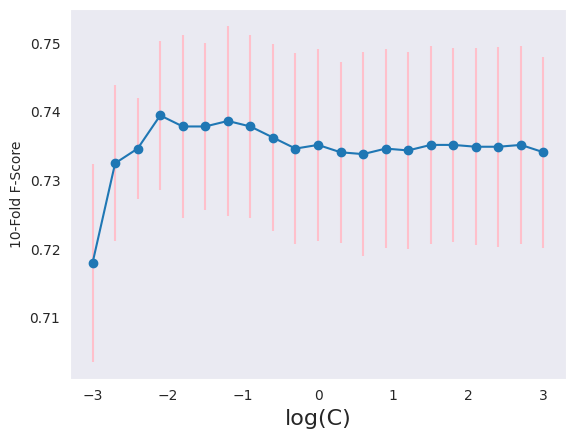

In [103]:
vectorC = np.logspace(-3,3,21)
param_grid = {'C': vectorC }

grid = GridSearchCV(LogisticRegression(random_state=0),
                    scoring='recall', 
                    param_grid=param_grid, 
                    cv = 5)

grid.fit(X_csev_bal, y_csev_bal)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = grid.cv_results_['mean_test_score']
std_scores = grid.cv_results_['std_test_score']
plt.errorbar(np.log10(vectorC),scores,yerr=std_scores, fmt='o-',ecolor='pink')
plt.xlabel('log(C)',fontsize=16)
plt.ylabel('10-Fold F-Score')
plt.grid()
plt.show()

Calculamos el modelo definitivo para el mejor parámetro 'C'. Calculamos también la precisión del modelo para:

* Los datos de entrenamiento balanceados
* Los datos de test balanceados
* Los datos originales sin balancear **(no utilizados en el entrenamiento)**

In [104]:
Copt = grid.best_params_['C']
lr = LogisticRegression(random_state=0, C = Copt).fit(X_csev_bal, y_csev_bal)

y_pred = lr.predict(X_csev_bal_test)
y_pred2 = lr.predict(X_csev_orig)
y_prob = lr.predict_proba(X_csev_bal_test)

print("Accuracy de entrenamiento para datos balanceados",lr.score(X_csev_bal, y_csev_bal))
print("Accuracy de test para datos balanceados: ",lr.score(X_csev_bal_test,y_csev_bal_test))
print("Accuracy de test para datos originales: ",lr.score(X_csev_orig,y_csev_orig))

#LRAcc = accuracy_score(y_pred2,y_df_csev_test)

Accuracy de entrenamiento para datos balanceados 0.7241518036743999
Accuracy de test para datos balanceados:  0.717426273458445
Accuracy de test para datos originales:  0.7090778089775647


La **precisión (accuracy)** representa el porcentaje de predicciones correctas frente al total. En nuestro caso, obtenemos una exactitud del 70.9% para los datos originales. Un número similar a la precisión obtenida para los datos de entrenamiento (72%).

Veamos también otras métricas como la **matriz de confusión** para los datos originales.

<Axes: >

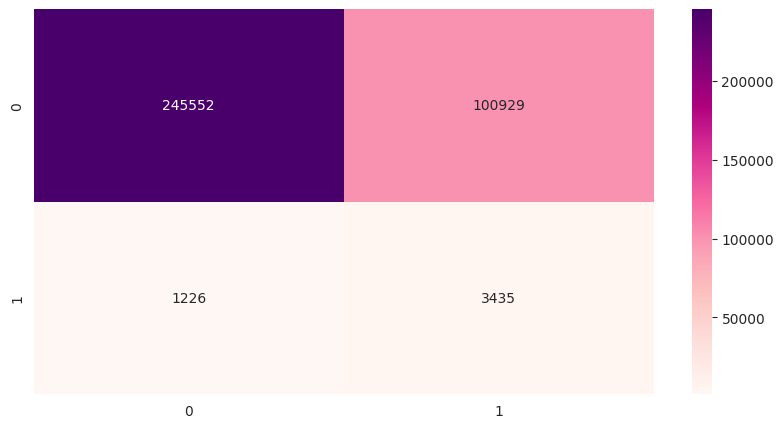

In [105]:
from sklearn import metrics
cf_matrix = metrics.confusion_matrix(y_csev_orig, y_pred2)
plt.figure(figsize=(10,5))
sns.heatmap(cf_matrix, annot=True, fmt = ".0f",cmap="RdPu")

En la matriz podemos observar que  tenemos un valor bajo de falsos negativos (es decir, hay pocos siniestros en los que considera que no hay fallecidos cuando en realidad si los ha habido). 

Sin embargo, también podemos observar en este modelo que hay un número considerablemente alto (100929) de siniestros en los que el modelo asume ha habido fallecidos cuando en realidad no es así. Veamos más métricas que nos ayuden a clarificar los resultados obtenidos aquí.

**OBSERVACIÓN**:
* Verdaderos positivos: Siniestros sin fallecidos
* Verdaderos negativos: Siniestros con fallecidos

In [106]:
from sklearn.metrics import classification_report
print(classification_report(y_csev_orig, y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83    346481
           1       0.03      0.74      0.06      4661

    accuracy                           0.71    351142
   macro avg       0.51      0.72      0.45    351142
weighted avg       0.98      0.71      0.82    351142



In [107]:
recall_line = classification_report(y_csev_orig, y_pred2).split('\n')[3]
recall2 = float(recall_line.split()[2])  
recall2

0.74

Observamos que la clase de víctimas no fallecidas tiene una precisión del 100%, es decir el 100% de valores que hemos clasificado como clase 0, en realidad lo son. 

Sin embargo, este valor es muy bajo para la clase de víctimas mortales, ya que como habíamos comentado antes, para encontrar todos los valores de esta segunda clase utiliza un gran número de falsos positivos. Por otro lado, el recall de las víctimas mortales, sí que es considerablemente alto (74%), esto quiere decir que hemos sido capaces de identificar un 74%  de los accidentes en los que hay víctimas mortales. Este último porcentaje es bastante bueno y es el que trataremos de mejorar en lo sucesivo. 





### **6.1.2 ÁRBOL DE DECISIÓN**

Continuamos con el algoritmo de árboles de decisión. Buscamos el valor óptimo para el hiperparámetro max_depth mediante GridSearch.

best mean cross-validation score: 0.738
best parameters: {'max_depth': 7}


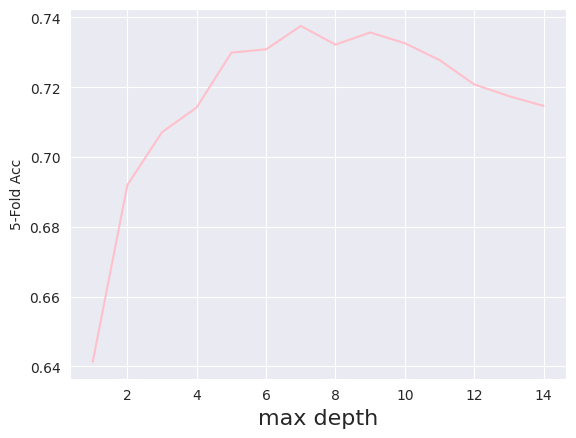

In [108]:
maxDepth = range(1,15)
param_grid = {'max_depth': maxDepth}

grid = GridSearchCV(DecisionTreeClassifier(), scoring= 'accuracy', param_grid=param_grid, cv = 5)
grid.fit(X_csev_bal, y_csev_bal)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'pink')
plt.xlabel('max depth',fontsize=16)
plt.ylabel('5-Fold Acc')
plt.show()

In [109]:
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeClassifier(max_depth=maxDepthOptimo).fit(X_csev_bal, y_csev_bal)

y_pred = treeModel.predict(X_csev_bal_test)
y_pred3 = treeModel.predict(X_csev_orig)

print("Accuracy de entrenamiento para datos balanceados",treeModel.score(X_csev_bal, y_csev_bal))
print("Accuracy de test para datos balanceados: ",treeModel.score(X_csev_bal_test,y_csev_bal_test))
print("Accuracy de test para datos originales: ",treeModel.score(X_csev_orig,y_csev_orig))



Accuracy de entrenamiento para datos balanceados 0.76465066380582
Accuracy de test para datos balanceados:  0.7367292225201072
Accuracy de test para datos originales:  0.7545295065813831


La **precisión (accuracy)** es del 75,45% para los datos originales. Veamos que ocurre con el resto de métricas.

<Axes: >

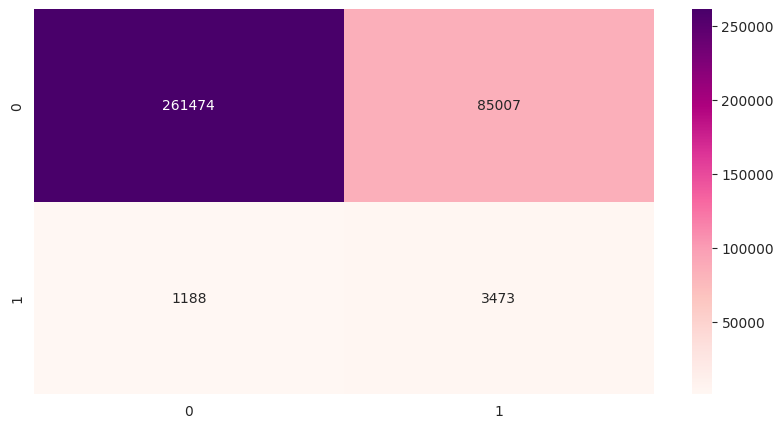

In [110]:
from sklearn import metrics
cf_matrix = metrics.confusion_matrix(y_csev_orig, y_pred3)
plt.figure(figsize=(10,5))
sns.heatmap(cf_matrix, annot=True, fmt = ".0f",cmap="RdPu")

Si comparamos esta matriz de confusión con la obtenida para el modelo anterior, podemos observar que el número de valores bien clasificados para ambas clases ha aumentado. Por lo tanto, este modelo parece realizar mejores predicciones que el previamente analizado.



In [111]:
print(classification_report(y_csev_orig, y_pred3))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86    346481
           1       0.04      0.75      0.07      4661

    accuracy                           0.75    351142
   macro avg       0.52      0.75      0.47    351142
weighted avg       0.98      0.75      0.85    351142



In [112]:
recall_line = classification_report(y_csev_orig, y_pred3).split('\n')[3]
recall3 = float(recall_line.split()[2])  
recall3

0.75

Observamos que en este caso, la clase de víctimas no fallecidas también tiene una precisión del 100%. Para la otra clase, la precisión continúa en un 4%. Sin embargo, podemos observar que el recall de ambas clases ha aumentado, lo que quiere decir que ahora identificamos más valores correctos de cada una de las  clases aunque esto continúe implicando un gran número de falsos negativos.


Podemos hallar tambien para este modelo la importancia de las variables en la clasificación.

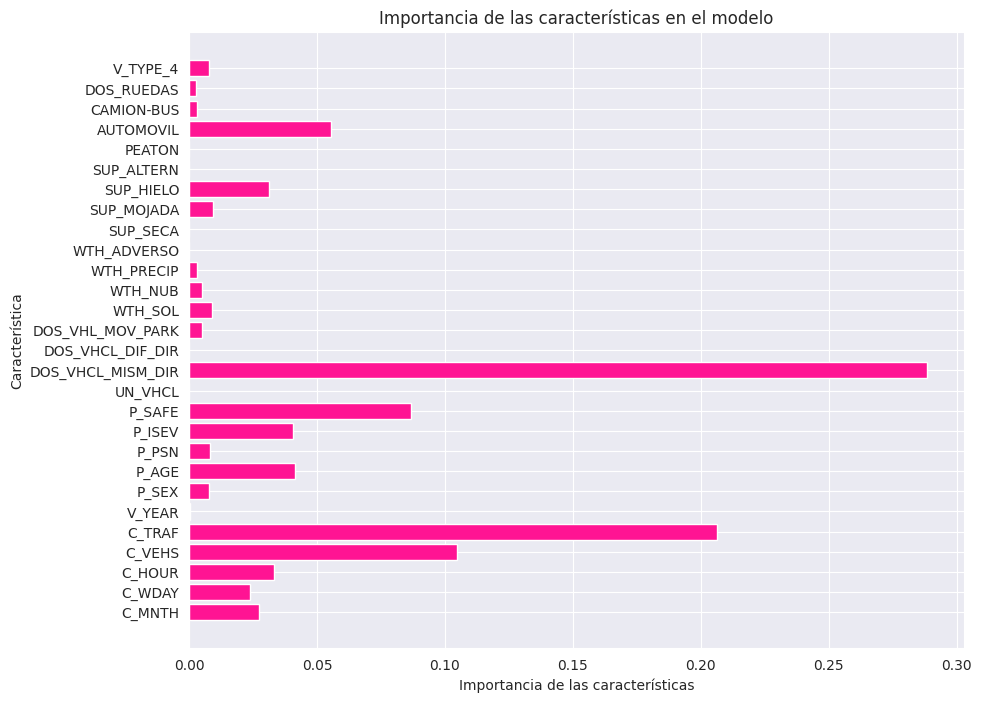

In [113]:
caract = X_csev_orig.shape[1]
plt.figure(figsize=(10, 8))
plt.barh(range(caract), treeModel.feature_importances_, color='deeppink')
plt.yticks(np.arange(caract), X_csev_orig.columns)
plt.xlabel('Importancia de las características')
plt.ylabel('Característica')
plt.title('Importancia de las características en el modelo')

plt.show()


Podemos observar que las variables más importantes a la hora de clasificar un accidente con víctimas mortales son, si existe algún tipo de control regulando el tráfico ('C_TRAF') y si los dos vehículos implicados en el accidente circulaban en la misma dirección.


### **6.1.3 RANDOM FOREST**

A continuación, se realiza el algoritmo Random Forest. Nuevamente, ajustaremos el modelo a los datos balanceados y lo evaluaremos sobre los datos originales.

best mean cross-validation score: 0.775
best parameters: {'max_depth': 14}


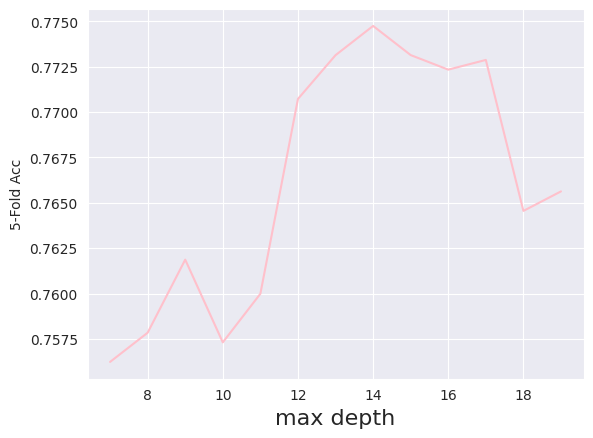

In [114]:
maxDepth = range(7,20)
param_grid = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestClassifier(n_estimators = 20), scoring= 'recall', param_grid=param_grid, cv = 5)
grid.fit(X_csev_bal, y_csev_bal)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'pink')
plt.xlabel('max depth',fontsize=16)
plt.ylabel('5-Fold Acc')
plt.show()

In [115]:
maxDepthOptimo = grid.best_params_['max_depth']
rf = RandomForestClassifier(n_estimators = 20, max_depth=maxDepthOptimo).fit(X_csev_bal, y_csev_bal)

y_pred = rf.predict(X_csev_bal_test)
y_pred4 = rf.predict(X_csev_orig)

print("Accuracy de entrenamiento para datos balanceados",rf.score(X_csev_bal, y_csev_bal))
print("Accuracy de test para datos balanceados: ",rf.score(X_csev_bal_test,y_csev_bal_test))
print("Accuracy de test para datos originales: ",rf.score(X_csev_orig,y_csev_orig))

RFAcc = accuracy_score(y_pred4,y_csev_orig)

Accuracy de entrenamiento para datos balanceados 0.8959367037682714
Accuracy de test para datos balanceados:  0.7630026809651475
Accuracy de test para datos originales:  0.7579469274538506


La **precisión (accuracy)** de este modelo es del 75.79% para los datos originales. Veamos otras métricas para los datos originales.

Axes(0.125,0.11;0.62x0.77)


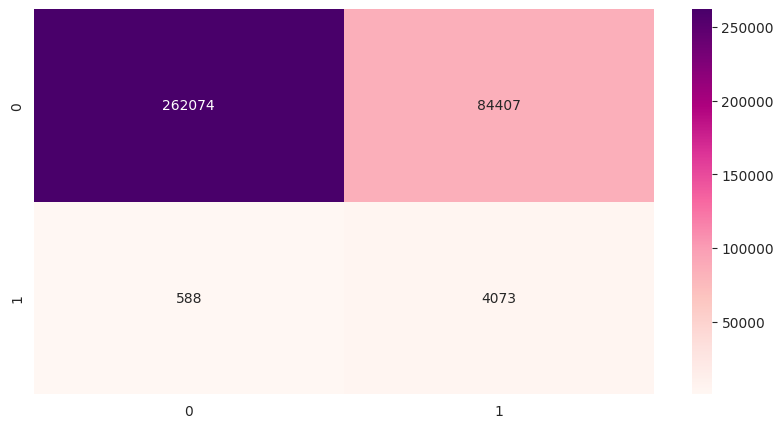

In [116]:
cf_matrix = metrics.confusion_matrix(y_csev_orig, y_pred4)
plt.figure(figsize=(10,5))
print(sns.heatmap(cf_matrix, annot=True, fmt = ".0f",cmap="RdPu"))


In [117]:
print(classification_report(y_csev_orig, y_pred4))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86    346481
           1       0.05      0.87      0.09      4661

    accuracy                           0.76    351142
   macro avg       0.52      0.82      0.47    351142
weighted avg       0.99      0.76      0.85    351142



In [118]:
recall_line = classification_report(y_csev_orig, y_pred4).split('\n')[3]
recall4 = float(recall_line.split()[2])  
recall4

0.87

Para este tercer modelo podemos observar como los porcentajes de precisión continuan siendo iguales a los modelos anteriores. Sin embargo, cabe destacar que en este algoritmo conseguimos un 87% de recall para las colisiones en las que hay fallecidos. Este valor es el más alto obtenido hasta el momento. También es interesante destacar que para la otra clase se está obteniendo el recall más alto de todos. Por el momento, se trata del mejor modelo calculado.

Veamos cuales son las variables que aportan más información en este caso.

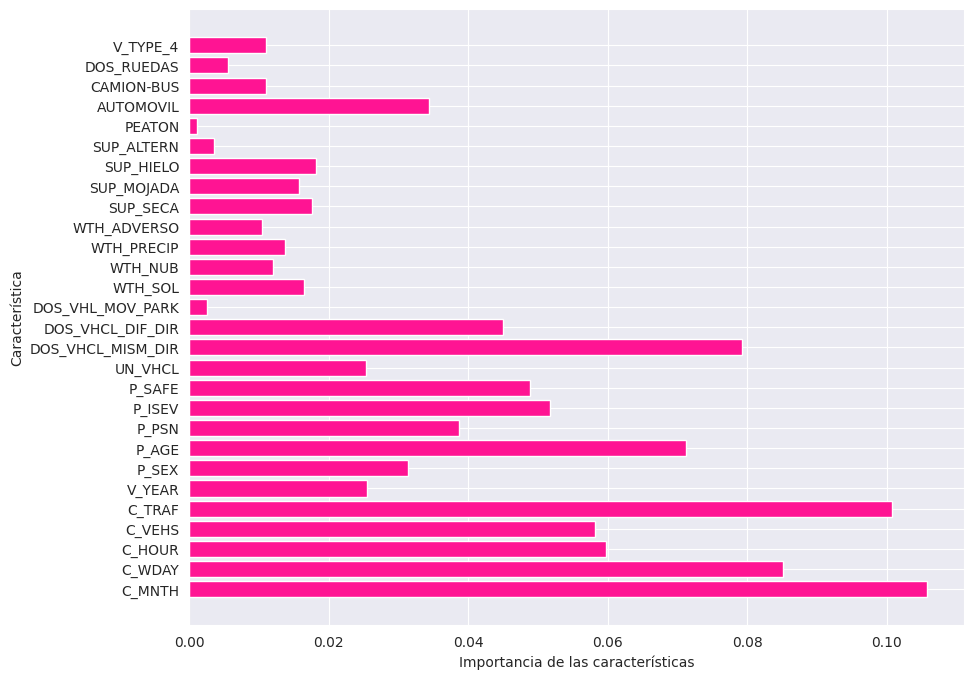

In [119]:
caract=X_csev_orig.shape[1]
plt.figure(figsize=(10, 8))
plt.barh(range(caract), rf.feature_importances_,color='deeppink')
plt.yticks(np.arange(caract),X_csev_orig.columns)
plt.xlabel('Importancia de las características')
plt.ylabel('Característica')
plt.show()

Se observa que en este modelo tenemos variables que son bastante significantes a la hora de clasificar, sin embargo las dos más importantes coinciden con las del modelo anterior. En este caso, también parecen ser significantes las variables relativas al mes y al día de la semana en el que ocurrió el accidente.

 ### **6.1.4 GRADIENT BOOST**

In [120]:
clf = GradientBoostingClassifier(
              learning_rate=0.1,  max_depth=12,
              min_weight_fraction_leaf=0.02, n_estimators=130,
              random_state=2408,
              verbose=1)

clf.fit(X_csev_bal, y_csev_bal)

      Iter       Train Loss   Remaining Time 
         1           1.3363            2.25s
         2           1.2945            2.09s
         3           1.2596            1.99s
         4           1.2301            1.98s
         5           1.2022            1.94s
         6           1.1780            1.91s
         7           1.1574            1.89s
         8           1.1412            1.86s
         9           1.1250            1.84s
        10           1.1129            1.82s
        20           1.0293            1.66s
        30           0.9818            1.56s
        40           0.9527            1.43s
        50           0.9304            1.28s
        60           0.9125            1.13s
        70           0.8946            1.00s
        80           0.8805            0.86s
        90           0.8671            0.70s
       100           0.8544            0.54s


GradientBoostingClassifier(max_depth=12, min_weight_fraction_leaf=0.02,
                           n_estimators=130, random_state=2408, verbose=1)

In [121]:
y_pred = clf.predict(X_csev_bal_test)
y_pred5 = clf.predict(X_csev_orig)

print("Accuracy de entrenamiento para datos balanceados",clf.score(X_csev_bal, y_csev_bal))
print("Accuracy de test para datos balanceados: ",clf.score(X_csev_bal_test,y_csev_bal_test))
print("Accuracy de test para datos originales: ",clf.score(X_csev_orig,y_csev_orig))

GBAcc = accuracy_score(y_pred5, y_csev_orig)

Accuracy de entrenamiento para datos balanceados 0.8168164141075499
Accuracy de test para datos balanceados:  0.7581769436997319
Accuracy de test para datos originales:  0.7492894612435994


La **precisión** del modelo para los datos originales es del 74.92%.

Axes(0.125,0.11;0.62x0.77)


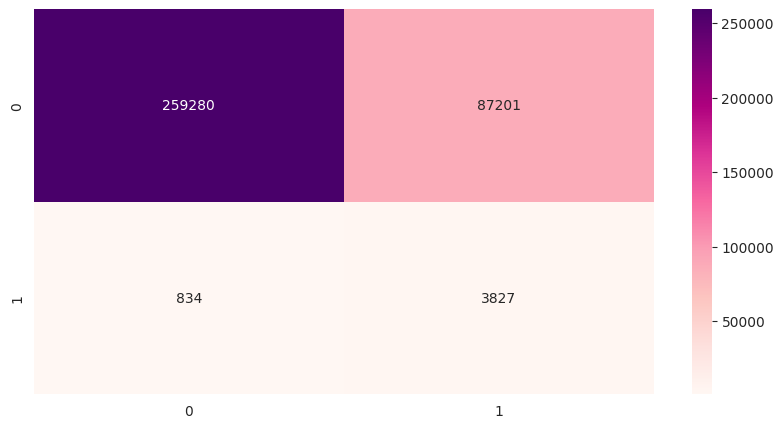

In [122]:
cf_matrix = metrics.confusion_matrix(y_csev_orig, y_pred5)
plt.figure(figsize=(10,5))
print(sns.heatmap(cf_matrix, annot=True, fmt = ".0f",cmap="RdPu"))

In [123]:
print(classification_report(y_csev_orig, y_pred5))

              precision    recall  f1-score   support

           0       1.00      0.75      0.85    346481
           1       0.04      0.82      0.08      4661

    accuracy                           0.75    351142
   macro avg       0.52      0.78      0.47    351142
weighted avg       0.98      0.75      0.84    351142



In [124]:
recall_line = classification_report(y_csev_orig, y_pred5).split('\n')[3]
recall5 = float(recall_line.split()[2])  
recall5

0.82

Los valores obtenidos continúan en la linea de los demás modelos. Sin embargo, no se obtienen mejores resultados que con Random Forest

Veamos las variables que este modelo identifica como más relevantes.

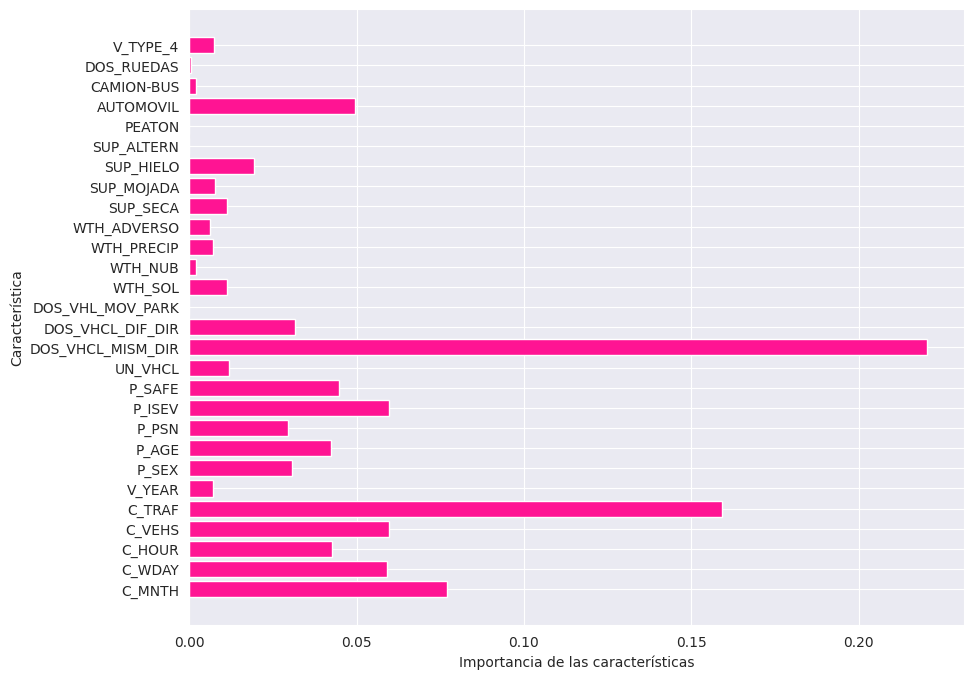

In [125]:
caract=X_csev_orig.shape[1]
plt.figure(figsize=(10, 8))
plt.barh(range(caract), clf.feature_importances_,color='deeppink')
plt.yticks(np.arange(caract),X_csev_orig.columns)
plt.xlabel('Importancia de las características')
plt.ylabel('Característica')
plt.show()

Podemos observar que las variables con más importancia coinciden con las variables más importantes son la variable referida a la situación en la que dos vehículos se en encuentran en la misma dirección y la variable referida a controles del tráfico.

### **6.1.5 COMPARACIÓN DEL RECALL DE LOS DIFERENTES MODELOS**

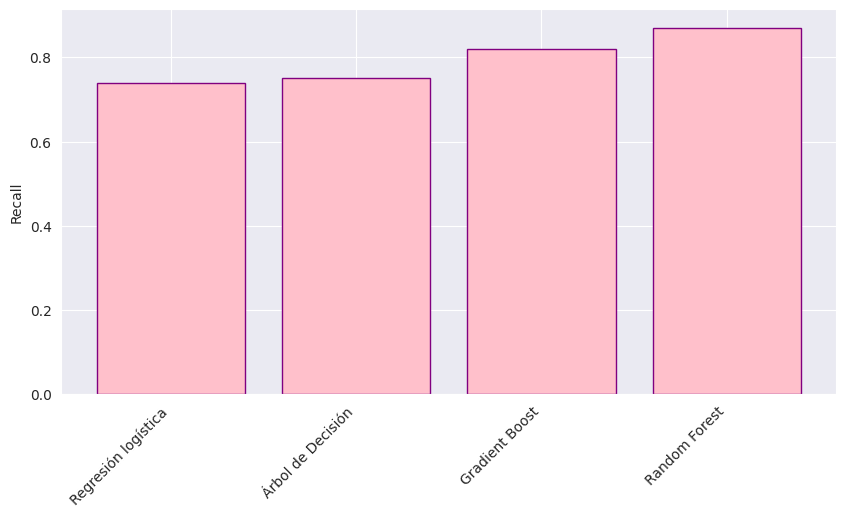

In [126]:
recall = []

recall.append(recall2)
recall.append(recall3)
recall.append(recall4)
recall.append(recall5)

model_names = ['Regresión logística', 'Árbol de Decisión', 'Random Forest', 'Gradient Boost']

sorted_idx = np.argsort(recall)
sorted_model_names = [model_names[i] for i in sorted_idx]
sorted_recall = [recall[i] for i in sorted_idx]

plt.figure(figsize=(10, 5))
plt.bar(sorted_model_names, sorted_recall, color='pink', edgecolor='purple')
plt.ylabel('Recall')
plt.xticks(rotation=45, ha='right')
plt.show()


Como ya habíamos visto, el modelo con el que obtenemos un recall más alto para las víctimas fallecidas es **Random Forest**.

### **6.2 VARIABLE OBJETIVO P_ISEV (REQUERIMIENTO DE TTO MÉDICO)**

Comenzamos separando las datos en entrenamiento y test, como hemos procedido para la función objetivo anterior.

In [127]:
X_pisev_bal, X_pisev_test_bal, y_pisev_bal, y_pisev_test_bal = train_test_split(df_balanced.drop(['P_ISEV'],axis=1), 
                                                                     df_balanced['P_ISEV'], stratify=df_balanced['P_ISEV'], test_size=0.2)

In [128]:
y_pisev_orig = df_orig["P_ISEV"]
X_pisev_orig = df_orig.drop(['P_ISEV'], axis = 1)

### **6.2.1 REGRESIÓN LOGÍSTICA**
Procedemos a encontrar el mejor parámetro 'C' para la regresión logística a través de **GridSearch**. 

Al igual que hemos usado para la anterior variable objetivo, nuestro principal objetivo será optimizar la métrica **recall**, con el fin de predecir el mayor número de sinientros en este en función de las lesiones o no de la víctima del siniestro.

best mean cross-validation score: 0.709
best parameters: {'C': 1000.0}


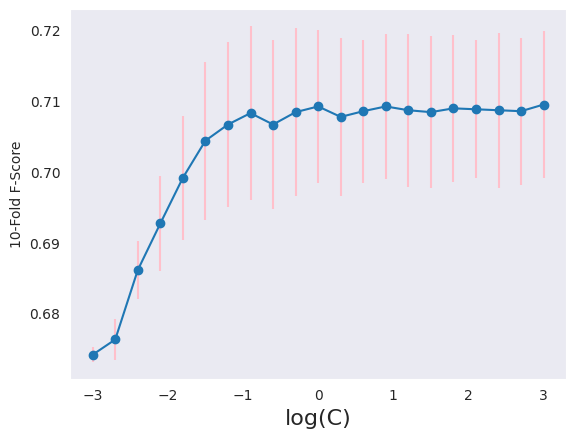

In [129]:
vectorC = np.logspace(-3,3,21)

param_grid = {'C': vectorC }

grid = GridSearchCV(LogisticRegression(random_state=0),
                    scoring='accuracy', 
                    param_grid=param_grid, 
                    cv = 5)

grid.fit(X_pisev_bal, y_pisev_bal)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = grid.cv_results_['mean_test_score']
std_scores = grid.cv_results_['std_test_score']
plt.errorbar(np.log10(vectorC),scores,yerr=std_scores, fmt='o-',ecolor='pink')
plt.xlabel('log(C)',fontsize=16)
plt.ylabel('10-Fold F-Score')
plt.grid()

Calculamos el modelo definitivo para el mejor parámetro 'C' según la métrica F-Score. Procedemos de igual forma que habíamos hecho con la otra varibale. Calculamos la precisión del modelo para:

* Los datos de entrenamiento balanceados
* Los datos de test balanceados
* Los datos originales sin balancear **(no utilizados en el entrenamiento)**

In [130]:
Copt = grid.best_params_['C']
lr = LogisticRegression(random_state=0, C = Copt).fit(X_pisev_bal, y_pisev_bal)

y_pred = lr.predict(X_pisev_test_bal)
y_pred6 = lr.predict(X_pisev_orig)
y_prob = lr.predict_proba(X_pisev_test_bal)

print("Accuracy de entrenamiento para datos balanceados",lr.score(X_pisev_bal, y_pisev_bal))
print("Accuracy de test para datos balanceados: ",lr.score(X_pisev_test_bal,y_pisev_test_bal))
print("Accuracy de test para datos originales: ",lr.score(X_pisev_orig,y_pisev_orig))


Accuracy de entrenamiento para datos balanceados 0.7087300522998525
Accuracy de test para datos balanceados:  0.7056300268096515
Accuracy de test para datos originales:  0.6328408450142677


Se obtiene una **precisión** del 63% para los datos originales. Si comparamos con los datos de entrenamiento, vemos que se diferencian un 10%. Veamos además otras métricas.

Calculamos la **matriz de confusión** para los datos originales.

Axes(0.125,0.11;0.62x0.77)


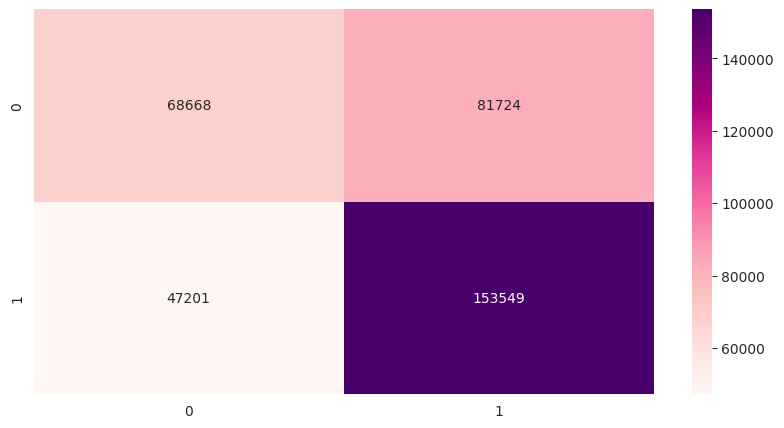

In [131]:
cf_matrix = metrics.confusion_matrix(y_pisev_orig, y_pred6)
plt.figure(figsize=(10,5))
print(sns.heatmap(cf_matrix, annot=True, fmt = ".0f",cmap='RdPu'))

In [132]:
print(classification_report(y_pisev_orig, y_pred6))

              precision    recall  f1-score   support

           0       0.59      0.46      0.52    150392
           1       0.65      0.76      0.70    200750

    accuracy                           0.63    351142
   macro avg       0.62      0.61      0.61    351142
weighted avg       0.63      0.63      0.62    351142



In [133]:
recall_line = classification_report(y_pisev_orig, y_pred6).split('\n')[3]
recall6 = float(recall_line.split()[2])  
recall6

0.76

Observamos que en cuanto a la **precisión**, para el caso en el que consideramos que los accidentados tienen lesiones es un 65% , es decir el 65% de los casos que hemos clasificado como clase 1, verdaderamente pertenecen a esa clase. 

Ademas, podemos observar que para clase 1 tenemos un recall del 76%, lo que significa que hemos sido capaces de identificar casi un 80% de aquellos casos en los que los accidentados tienen lesiones o son fallecidos. Lo cual será beneficioso para nuestro estudio.

Sin embargo, en este caso tenemos tan solo un 46% de recall para clase 0, en la cual las víctimas no precisan de asistenicia médica. Esto significa que esta clase no resulta tan bien distinguida como la anterior (en la que obtenemos un recall más alto debido al valor tan alto de falsos negativos que se observa en la matriz de confusión).

### **6.2.2 ÁRBOL DE DECISIÓN**

Continuamos con el algoritmo de árboles de decisión. Buscamos el valor óptimo para el hiperparámetro **max_depth** mediante **GridSearch**.

best mean cross-validation score: 0.717
best parameters: {'max_depth': 6}


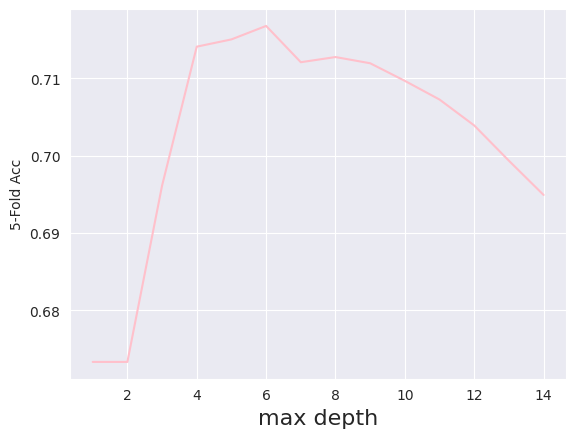

In [134]:
maxDepth = range(1,15)
param_grid = {'max_depth': maxDepth }

grid = GridSearchCV(DecisionTreeClassifier(), scoring= 'accuracy', param_grid=param_grid, cv = 5)
grid.fit(X_pisev_bal, y_pisev_bal)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'pink')
plt.xlabel('max depth',fontsize=16)
plt.ylabel('5-Fold Acc')
plt.show()

In [135]:
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeClassifier(max_depth=maxDepthOptimo).fit(X_pisev_bal, y_pisev_bal)

y_pred = treeModel.predict(X_pisev_test_bal)
y_pred7 = treeModel.predict(X_pisev_orig)

print("Accuracy de entrenamiento para datos balanceados",treeModel.score(X_pisev_bal, y_pisev_bal))
print("Accuracy de test para datos balanceados: ",treeModel.score(X_pisev_test_bal,y_pisev_test_bal))
print("Accuracy de test para datos originales: ",treeModel.score(X_pisev_orig,y_pisev_orig))

Accuracy de entrenamiento para datos balanceados 0.729515891109025
Accuracy de test para datos balanceados:  0.6943699731903485
Accuracy de test para datos originales:  0.6459267191050914


Obtenemos un 64,59% de **precisión** para los datos originales. Veamos que ocurre con el resto de métricas.

Axes(0.125,0.11;0.62x0.77)


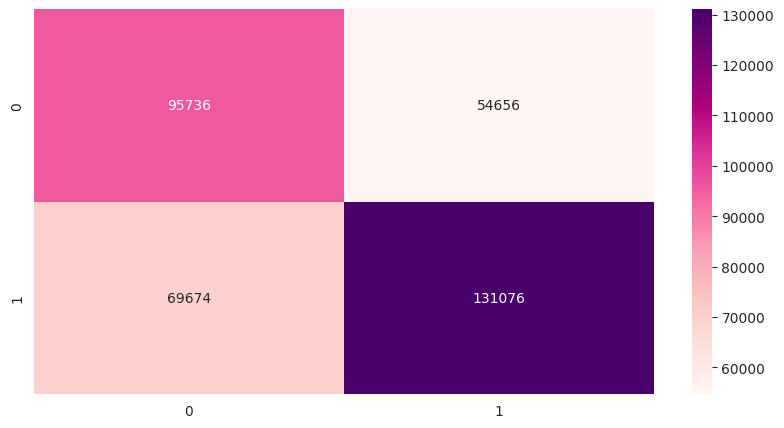

In [136]:
cf_matrix = metrics.confusion_matrix(y_pisev_orig, y_pred7)
plt.figure(figsize=(10,5))
print(sns.heatmap(cf_matrix, annot=True, fmt = ".0f", cmap='RdPu'))

In [137]:
print(classification_report(y_pisev_orig, y_pred7))

              precision    recall  f1-score   support

           0       0.58      0.64      0.61    150392
           1       0.71      0.65      0.68    200750

    accuracy                           0.65    351142
   macro avg       0.64      0.64      0.64    351142
weighted avg       0.65      0.65      0.65    351142



In [138]:
recall_line = classification_report(y_pisev_orig, y_pred7).split('\n')[3]
recall7 = float(recall_line.split()[2])  
recall7

0.65

Para las víctimas con lesiones o fallecidas, tenemos un recall del 65% , es decir hemos conseguido clasificar un gran número de accidentados en su respectiva clase. Sin embargo, para lograr este valor, solo el 71% de los datos clasificados en esta clase realmente pertenece a ella.


Podemos hallar tambien para este modelo la importancia de las variables en la clasificación.

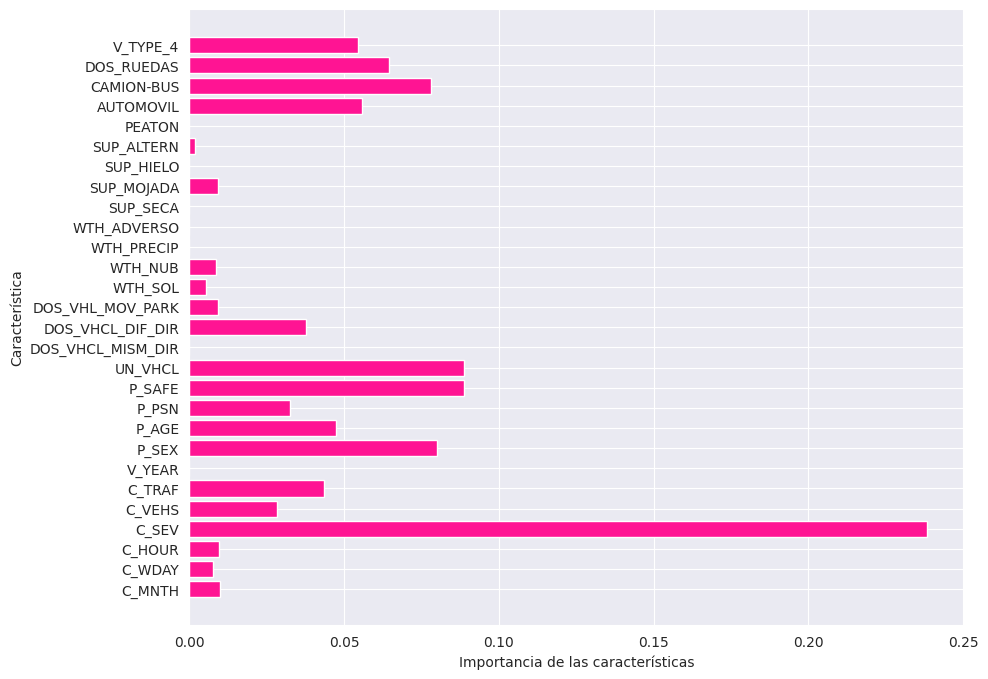

In [139]:
caract=X_pisev_orig.shape[1]
plt.figure(figsize=(10, 8))
plt.barh(range(caract), treeModel.feature_importances_, color='deeppink')
plt.yticks(np.arange(caract),X_pisev_orig.columns)
plt.xlabel('Importancia de las características')
plt.ylabel('Característica')
plt.show()

Podemos observar que las variables más importantes a la hora de decidir si en una colisión se requerirá de asistencia médica o no son:
* La severidad del accidente (evidentemente)
* El número de vehículos implicados en la colisión
* Si en el accidente hay implicado un único vehículo
* Si se trata de un vehículo de dos ruedas

Esto parece tener sentido ya que si se trata de un siniestro en el que solo hay un coche implicado, normalmente descartaremos la opción de que sea un choque superficial que afecte únicamente a la carrocería de ambos coches. Otro factor importante es si el tipo de vehículo es de dos ruedas, ya que en estos transportes las víctimas van menos protegidas y por tanto, en cuanto ocurre un accidente, la víctima sufre lesiones.  

### **6.2.3 RANDOM FOREST**

A continuación, se realiza el algoritmo Random Forest. Nuevamente, ajustaremos el modelo a los datos balanceados y lo evaluaremos sobre los datos originales.

best mean cross-validation score: 0.728
best parameters: {'max_depth': 15}


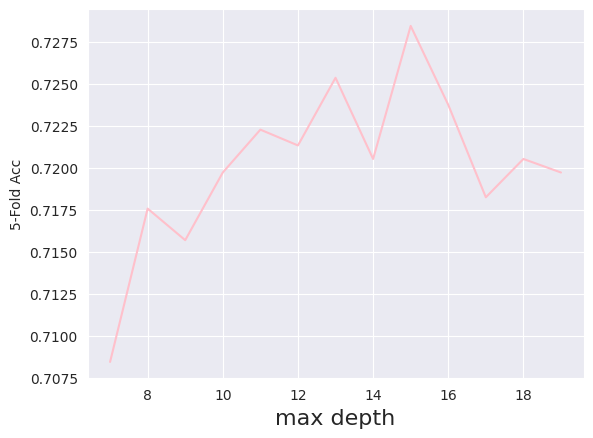

In [140]:
maxDepth = range(7,20)
param_grid = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestClassifier(n_estimators = 20), scoring= 'accuracy', param_grid=param_grid, cv = 5)
grid.fit(X_pisev_bal, y_pisev_bal)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'pink')
plt.xlabel('max depth',fontsize=16)
plt.ylabel('5-Fold Acc')
plt.show()

In [141]:
maxDepthOptimo = grid.best_params_['max_depth']
rf = RandomForestClassifier(n_estimators = 20, max_depth=maxDepthOptimo).fit(X_pisev_bal, y_pisev_bal)

y_pred = rf.predict(X_pisev_test_bal)
y_pred8 = rf.predict(X_pisev_orig)

print("Accuracy de entrenamiento para datos balanceados",rf.score(X_pisev_bal, y_pisev_bal))
print("Accuracy de test para datos balanceados: ",rf.score(X_pisev_test_bal,y_pisev_test_bal))
print("Accuracy de test para datos originales: ",rf.score(X_pisev_orig,y_pisev_orig))

RFAcc = accuracy_score(y_pred8,y_pisev_orig)

Accuracy de entrenamiento para datos balanceados 0.8872200616870055
Accuracy de test para datos balanceados:  0.7008042895442359
Accuracy de test para datos originales:  0.6373774712224684


Obtenemos una **precisión** del 63,73% para los datos originales. 

Veamos otras métricas a través del calculo de la **matriz de confusión**.

Axes(0.125,0.11;0.62x0.77)


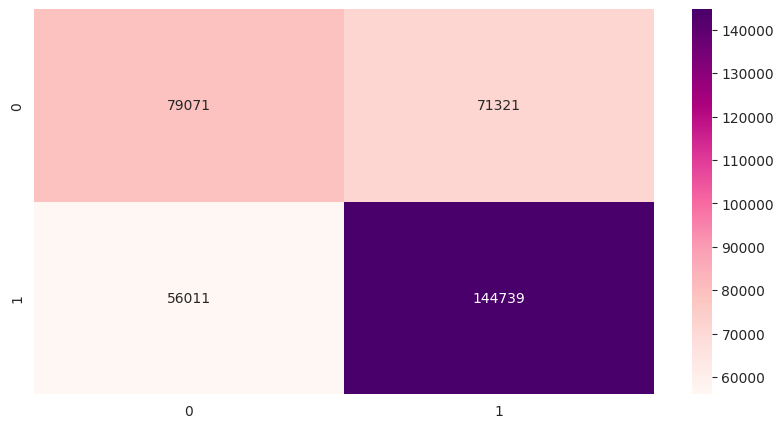

In [142]:
cf_matrix = metrics.confusion_matrix(y_pisev_orig, y_pred8)
plt.figure(figsize=(10,5))
print(sns.heatmap(cf_matrix, annot=True, fmt = ".0f",cmap='RdPu'))

In [143]:
print(classification_report(y_pisev_orig, y_pred8))

              precision    recall  f1-score   support

           0       0.59      0.53      0.55    150392
           1       0.67      0.72      0.69    200750

    accuracy                           0.64    351142
   macro avg       0.63      0.62      0.62    351142
weighted avg       0.63      0.64      0.63    351142



In [144]:
recall_line = classification_report(y_pisev_orig, y_pred8).split('\n')[3]
recall8 = float(recall_line.split()[2])  
recall8

0.72

Obtenemos resultados similares para ambas clases en cuanto a  la **precisión**. El 67% de los datos que clasificamos en la clase 1, realmente pertenece a ella.

En cuanto a la métrica recall se observa que para la clase 1 hemos sido capaces de identificar el 72% de las víctimas que requieren asistencia médica. embargo, Para la otra clase solo el 38%. Este segundo valor nos preocupa menos porque nuestro objetivo es clasificar lo mejor posible aquellos accidentes en los que será necesaria la asistencia médica. De este modo, la compañía de seguros sabrá a que clientes debería subirle el precio de la poliza.

Podríamos decir que hasta ahora, es el modelo que más equilibrado. Veamos si esto aún puede mejorar más con otro modelo.

Veamos las variables más importantes según este modelo.

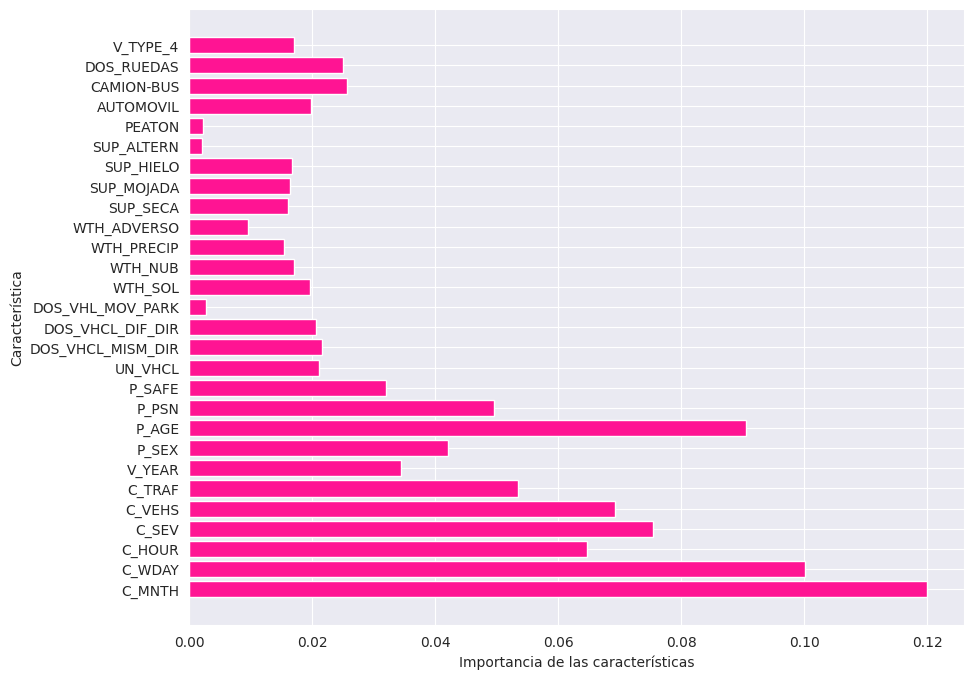

In [145]:
caract=X_pisev_orig.shape[1]
plt.figure(figsize=(10, 8))
plt.barh(range(caract), rf.feature_importances_, color='deeppink')
plt.yticks(np.arange(caract),X_pisev_orig.columns)
plt.xlabel('Importancia de las características')
plt.ylabel('Característica')
plt.show()

Este modelo identifica como variables importantes las mismas que el modelo anterior.

### **6.2.4 GRADIENT BOOST**

In [146]:
clf = GradientBoostingClassifier(
              learning_rate=0.1,  max_depth=12,
              min_weight_fraction_leaf=0.02, n_estimators=130,
              random_state=2408,
              verbose=1)

clf.fit(X_pisev_bal, y_pisev_bal)

      Iter       Train Loss   Remaining Time 
         1           1.2343            1.92s
         2           1.2103            1.92s
         3           1.1901            1.91s
         4           1.1725            1.88s
         5           1.1572            1.88s
         6           1.1429            1.90s
         7           1.1302            1.92s
         8           1.1173            1.95s
         9           1.1062            1.94s
        10           1.0959            1.92s
        20           1.0292            1.85s
        30           0.9979            1.71s
        40           0.9763            1.54s
        50           0.9594            1.38s
        60           0.9445            1.21s
        70           0.9302            1.03s
        80           0.9184            0.86s
        90           0.9069            0.69s
       100           0.8965            0.52s


GradientBoostingClassifier(max_depth=12, min_weight_fraction_leaf=0.02,
                           n_estimators=130, random_state=2408, verbose=1)

In [147]:
y_pred = clf.predict(X_pisev_test_bal)
y_pred9 = clf.predict(X_pisev_orig)

print("Accuracy de entrenamiento para datos balanceados",clf.score(X_pisev_bal, y_pisev_bal))
print("Accuracy de test para datos balanceados: ",clf.score(X_pisev_test_bal,y_pisev_test_bal))
print("Accuracy de test para datos originales: ",clf.score(X_pisev_orig,y_pisev_orig))


Accuracy de entrenamiento para datos balanceados 0.7930803272093335
Accuracy de test para datos balanceados:  0.7254691689008043
Accuracy de test para datos originales:  0.6444173582197515


Obtenemos un 64,44% de **precisión** para los datos originales.

Calculemos otras métricas derivadas de la **matriz de confusión**.

Axes(0.125,0.11;0.62x0.77)


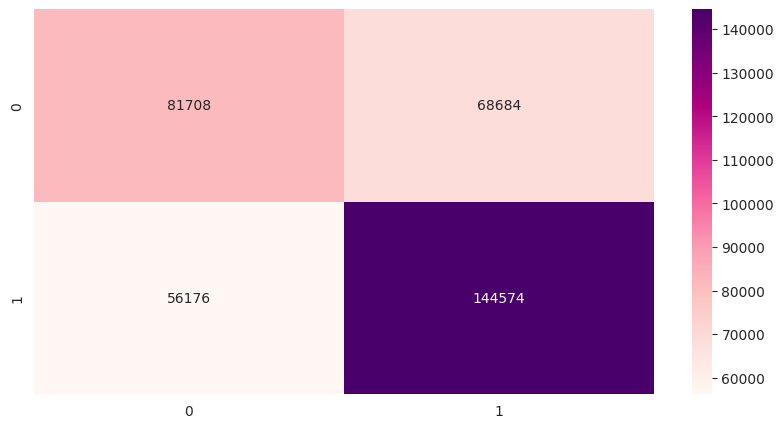

In [148]:
cf_matrix = metrics.confusion_matrix(y_pisev_orig, y_pred9)
plt.figure(figsize=(10,5))
print(sns.heatmap(cf_matrix, annot=True, fmt = ".0f",cmap='RdPu'))

In [149]:
print(classification_report(y_pisev_orig, y_pred9))

              precision    recall  f1-score   support

           0       0.59      0.54      0.57    150392
           1       0.68      0.72      0.70    200750

    accuracy                           0.64    351142
   macro avg       0.64      0.63      0.63    351142
weighted avg       0.64      0.64      0.64    351142



In [150]:
recall_line = classification_report(y_pisev_orig, y_pred9).split('\n')[3]
recall9 = float(recall_line.split()[2])  
recall9

0.72

En cuanto a **precisión** obtenemos 68% y 59% para la clase 1 y la clase 0 respectivamente.

Si observamos los resultados obtenidos para la métrica **recall**, se tiene para la clase en la que los accidentados tienen lesiones un 72%, siendo esta la cantidad de accidentados que hemos sido capaces de identificar correctamente en su clase. Además se obtiene para la clase 0 un 54%, siendo esto un buen porcentaje. Es posible que estemos ante el mejor modelo, si recordamos que nuestro objetivo era poder optimizar la métrica recall. 

No obstante, posteriomente haremos una comparación de modelos y mostraremos cual según nuestros objetivos se adapta mejor.

Veamos las variables más importantes para este modelo.

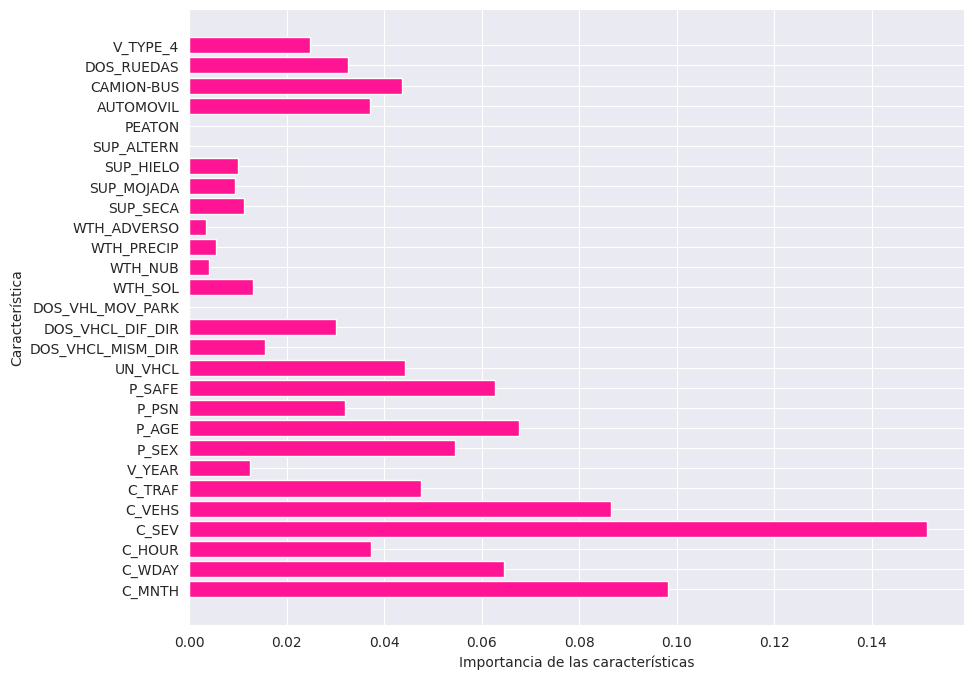

In [151]:
caract=X_pisev_orig.shape[1]
plt.figure(figsize=(10, 8))
plt.barh(range(caract), clf.feature_importances_, color='deeppink')
plt.yticks(np.arange(caract),X_pisev_orig.columns)
plt.xlabel('Importancia de las características')
plt.ylabel('Característica')
plt.show()

Podemos observar que ahora una de las variables más importantes según este modelo es ***C_SEV***. 

Además las variables más importantes a la hora de clasificar coinciden con las variables del modelo de Random Forest.



### **6.2.5 COMPARACIÓN DEL RECALL DE LOS DIFERENTES MODELOS**

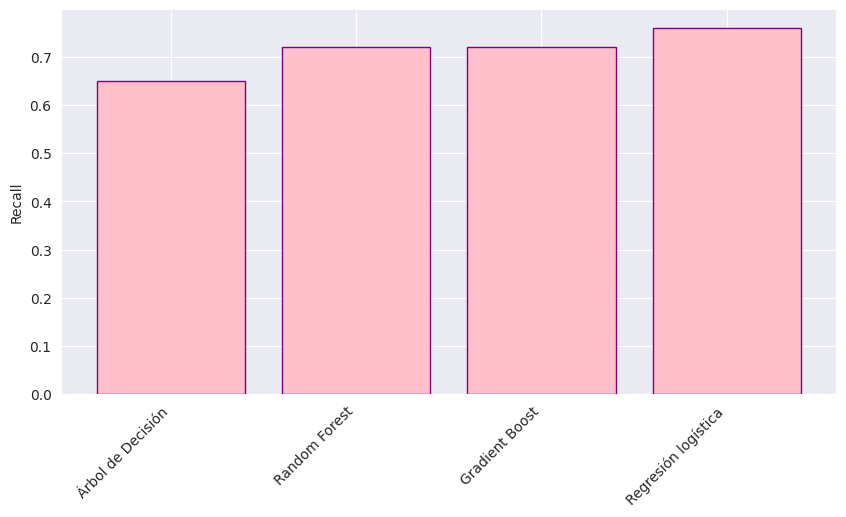

In [152]:
recall = []

recall.append(recall6)
recall.append(recall7)
recall.append(recall8)
recall.append(recall9)

model_names = ['Regresión logística', 'Árbol de Decisión', 'Random Forest', 'Gradient Boost']

sorted_idx = np.argsort(recall)
sorted_model_names = [model_names[i] for i in sorted_idx]
sorted_recall = [recall[i] for i in sorted_idx]

plt.figure(figsize=(10, 5))
plt.bar(sorted_model_names, sorted_recall, color='pink', edgecolor='purple')
plt.ylabel('Recall')
plt.xticks(rotation=45, ha='right')
plt.show()

Observamos que el modelo que ofrece mejor Recall para las colisiones en las que se necesita asistencia médica es Random Forest. Sin embargo, haciendo un análisis en mayor profundidad, hemos visto que el modelo que aporta unos mejores resultados de manera global es **Gradient Boost**.

## **7. ANÁLISIS DE LA CLIMATOLOGÍA**

En este apartado vamos a realizar un análisis para ver si el tiempo climatológico afecta a los accidentes. Para ello se ha buscado un conjunto de datos con el tiempo de Canadá en Kaggle: https://www.kaggle.com/datasets/aturner374/eighty-years-of-canadian-climate-data?select=Canadian_climate_history.csv

El conjunto de datos contiene información de temperaturas y precipitaciones (nieve o lluvia) diarias de varias estaciones meteorológicas desde 1940 hasta 2020.

Para comenzar con este análisis importamos el conjunto de datos referentes al clima canadiense.

### **7.1 LECTURA Y TRATAMIENTO DE LOS DATOS**

In [153]:
df_clima = pd.read_csv('Canadian_climate_history.csv')
df_clima

,LOCAL_DATE,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MEAN_TEMPERATURE_EDMONTON,TOTAL_PRECIPITATION_EDMONTON,MEAN_TEMPERATURE_HALIFAX,TOTAL_PRECIPITATION_HALIFAX,MEAN_TEMPERATURE_MONCTON,TOTAL_PRECIPITATION_MONCTON,MEAN_TEMPERATURE_MONTREAL,...,MEAN_TEMPERATURE_STJOHNS,TOTAL_PRECIPITATION_STJOHNS,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO,MEAN_TEMPERATURE_VANCOUVER,TOTAL_PRECIPITATION_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,TOTAL_PRECIPITATION_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG,TOTAL_PRECIPITATION_WINNIPEG
0,01-Jan-1940 00:00:00,-11.4,0.5,NaN,NaN,NaN,NaN,-8.9,0.0,NaN,...,NaN,NaN,-8.9,0.0,8.9,5.8,NaN,NaN,-20.9,0.0
1,02-Jan-1940 00:00:00,-12.0,0.5,NaN,NaN,NaN,NaN,-14.5,0.0,NaN,...,NaN,NaN,-13.1,0.3,9.7,7.1,NaN,NaN,-18.4,0.0
2,03-Jan-1940 00:00:00,-12.0,1.0,NaN,NaN,NaN,NaN,-11.1,0.0,NaN,...,NaN,NaN,-6.1,0.0,7.8,1.0,NaN,NaN,-22.0,0.0
3,04-Jan-1940 00:00:00,-11.4,0.8,NaN,NaN,NaN,NaN,-11.1,0.3,NaN,...,NaN,NaN,-6.4,0.5,8.1,0.5,NaN,NaN,-20.3,0.0
4,05-Jan-1940 00:00:00,-13.1,0.5,NaN,NaN,NaN,NaN,-8.1,0.0,NaN,...,NaN,NaN,-7.2,16.5,7.0,0.8,NaN,NaN,-18.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29216,28-Dec-2019 00:00:00,-7.7,0.0,-10.4,0.0,2.1,0.0,0.5,NaN,1.3,...,-4.3,5.3,3.0,0.2,5.3,3.0,-9.0,NaN,-4.7,0.0
29217,29-Dec-2019 00:00:00,-3.3,0.0,-8.6,0.0,-2.7,0.0,-3.8,NaN,-0.9,...,-0.9,5.6,1.1,7.8,7.1,2.4,-2.8,NaN,-10.6,1.7
29218,30-Dec-2019 00:00:00,-1.6,0.0,-10.3,0.0,-3.5,0.0,-4.1,NaN,-2.3,...,-0.7,0.7,5.6,8.0,7.5,5.8,-0.1,NaN,-10.9,0.1
29219,31-Dec-2019 00:00:00,4.3,0.0,-2.6,0.0,0.0,11.4,-1.0,NaN,-0.2,...,-1.2,0.0,0.4,2.0,8.4,21.2,-1.1,NaN,-12.3,0.0


Antes de poder trabajar con este nuevo Data Frame, es necesario realizar algunos ajustes:

* Filtramos la base de datos para quedarnos solamente con los datos referentes a los años que hemos estudiado previamente, es decir, 2013-2014.

* Decidimos mantener sólo las siguientes estaciones meteorológicas: **Calgary, Toronto, Vancouver y St Johns** ya que quedan repartidas geográficamente por todo el territorio. 

* Eliminamos las estaciones de Ottawa, Montreal, Quebec, Halifax, Edmonto, Winnipeg y Saskatoon por cercanía a las seleccionadas para el estudio.

* Modificamos el formato de fecha


In [154]:
inicio = df_clima.index[df_clima['LOCAL_DATE']=='31-Dec-2013 00:00:00'].tolist()[0]
fin = df_clima.index[df_clima['LOCAL_DATE']=='01-Jan-2015 00:00:00'].tolist()[0]
df_clima = df_clima.iloc[inicio:fin]

In [155]:
variables = ['LOCAL_DATE', 'MEAN_TEMPERATURE_CALGARY','TOTAL_PRECIPITATION_CALGARY', 'MEAN_TEMPERATURE_TORONTO','TOTAL_PRECIPITATION_TORONTO', 'MEAN_TEMPERATURE_VANCOUVER','TOTAL_PRECIPITATION_VANCOUVER', 'MEAN_TEMPERATURE_STJOHNS','TOTAL_PRECIPITATION_STJOHNS']
variables_eliminadas = [col for col in df_clima.columns if col not in variables]
df_clima.drop(['MEAN_TEMPERATURE_EDMONTON', 'TOTAL_PRECIPITATION_EDMONTON', 'MEAN_TEMPERATURE_HALIFAX', 'TOTAL_PRECIPITATION_HALIFAX', 'MEAN_TEMPERATURE_MONCTON', 'TOTAL_PRECIPITATION_MONCTON', 'MEAN_TEMPERATURE_MONTREAL', 'TOTAL_PRECIPITATION_MONTREAL', 'MEAN_TEMPERATURE_OTTAWA', 'TOTAL_PRECIPITATION_OTTAWA', 'MEAN_TEMPERATURE_QUEBEC', 'TOTAL_PRECIPITATION_QUEBEC', 'MEAN_TEMPERATURE_SASKATOON', 'TOTAL_PRECIPITATION_SASKATOON', 'MEAN_TEMPERATURE_WHITEHORSE', 'TOTAL_PRECIPITATION_WHITEHORSE', 'MEAN_TEMPERATURE_WINNIPEG', 'TOTAL_PRECIPITATION_WINNIPEG'], axis=1, inplace=True)

In [156]:
df_clima['LOCAL_DATE'] = pd.to_datetime(df_clima['LOCAL_DATE'])

Realizaremos un estudio por meses de la relación entre el clima y los accidentes, ya que en el conjuntos de datos  de las colisiones, disponemos de la información por meses y no por días. Añadimos al conjunto de datos llamado 'df_clima' una columna ***C_MNTH*** , y eliminamos la columna ***LOCAL_DATE***.



In [157]:
fechas = df_clima['LOCAL_DATE'].to_list()
meses = []
for i in fechas:
    i = i.strftime('%m')
    i = int(i)
    meses.append(i)
df_clima['C_MNTH'] = meses
df_clima = df_clima.drop(['LOCAL_DATE'], axis=1)

In [158]:
df_clima.head()

,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MEAN_TEMPERATURE_STJOHNS,TOTAL_PRECIPITATION_STJOHNS,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO,MEAN_TEMPERATURE_VANCOUVER,TOTAL_PRECIPITATION_VANCOUVER,C_MNTH
27028,-10.6,3.0,-5.7,0.0,-9.1,0.6,6.2,2.2,12
27029,-5.2,0.8,-11.9,0.0,-12.7,0.0,4.8,0.8,1
27030,-0.8,0.0,-15.3,0.0,-17.6,0.8,6.4,13.8,1
27031,-4.0,5.8,-12.0,10.6,-16.5,0.0,3.7,0.0,1
27032,-16.5,0.2,-10.9,5.6,-4.8,0.4,1.0,0.0,1



### **7.2 VALORES MISSING**

Una vez filtrado el conjunto de datos, realizamos el análisis de valores missing.

In [159]:
df_clima.isnull().sum()

MEAN_TEMPERATURE_CALGARY         0
TOTAL_PRECIPITATION_CALGARY      6
MEAN_TEMPERATURE_STJOHNS         4
TOTAL_PRECIPITATION_STJOHNS      9
MEAN_TEMPERATURE_TORONTO         0
TOTAL_PRECIPITATION_TORONTO      0
MEAN_TEMPERATURE_VANCOUVER       1
TOTAL_PRECIPITATION_VANCOUVER    6
C_MNTH                           0
dtype: int64

Observamos que hay algunos valores missing. Los imputaremos por el método ***KNNImputer***.

In [160]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights="uniform")

imputer.fit(df_clima[['TOTAL_PRECIPITATION_CALGARY']])
df_clima['TOTAL_PRECIPITATION_CALGARY'] = imputer.transform(df_clima[['TOTAL_PRECIPITATION_CALGARY']]).ravel()


imputer.fit(df_clima[['MEAN_TEMPERATURE_STJOHNS']])
df_clima['MEAN_TEMPERATURE_STJOHNS'] = imputer.transform(df_clima[['MEAN_TEMPERATURE_STJOHNS']]).ravel()


imputer.fit(df_clima[['TOTAL_PRECIPITATION_STJOHNS']])
df_clima['TOTAL_PRECIPITATION_STJOHNS'] = imputer.transform(df_clima[['TOTAL_PRECIPITATION_STJOHNS']]).ravel()


imputer.fit(df_clima[['MEAN_TEMPERATURE_VANCOUVER']])
df_clima['MEAN_TEMPERATURE_VANCOUVER'] = imputer.transform(df_clima[['MEAN_TEMPERATURE_VANCOUVER']]).ravel()


imputer.fit(df_clima[['TOTAL_PRECIPITATION_VANCOUVER']])
df_clima['TOTAL_PRECIPITATION_VANCOUVER'] = imputer.transform(df_clima[['TOTAL_PRECIPITATION_VANCOUVER']]).ravel()


Veamos si la imputación se ha realizado correctamente.

In [161]:
df_clima.isnull().sum()

MEAN_TEMPERATURE_CALGARY         0
TOTAL_PRECIPITATION_CALGARY      0
MEAN_TEMPERATURE_STJOHNS         0
TOTAL_PRECIPITATION_STJOHNS      0
MEAN_TEMPERATURE_TORONTO         0
TOTAL_PRECIPITATION_TORONTO      0
MEAN_TEMPERATURE_VANCOUVER       0
TOTAL_PRECIPITATION_VANCOUVER    0
C_MNTH                           0
dtype: int64

### **7.3 TRATAMIENTO  Y ANÁLISIS DEL DF CLIMA**

Creamos una función que devuelva una tabla con diferentes datos y estadísticas referidas a las temperaturas y a las precipitaciones para cada mes del año. El conjunto de datos recultante por esta función es el que utilizaremos para extraer conclusiones de la relación entre la climatología y el número/severidad de las colisiones.

In [162]:
def tabla_descriptiva(df_clima):

  df_clima_por_mes = {}

  for mes in range(1, 13):
      df_clima_por_mes[mes] = df_clima[df_clima['C_MNTH'] == mes]

  lista=[]
  meses = range(1, 13)
  media_temp_calgary = []
  total_prec_calgary = []
  media_temp_stjohns = []
  total_prec_stjohns = []
  media_temp_toronto = []
  total_prec_toronto = []
  media_temp_vancouver = []
  total_prec_vancouver = []

  for i in range(1, 13):
      df_mes_clima = df_clima[df_clima['C_MNTH'] == i]
      lista.append(df_mes_clima)

      tc = df_mes_clima['MEAN_TEMPERATURE_CALGARY'].mean()
      pc = df_mes_clima['TOTAL_PRECIPITATION_CALGARY'].sum()
      ts = df_mes_clima['MEAN_TEMPERATURE_STJOHNS'].mean()
      ps = df_mes_clima['TOTAL_PRECIPITATION_STJOHNS'].sum()
      tt = df_mes_clima['MEAN_TEMPERATURE_TORONTO'].mean()
      pt = df_mes_clima['TOTAL_PRECIPITATION_TORONTO'].sum()
      tv = df_mes_clima['MEAN_TEMPERATURE_VANCOUVER'].mean()
      pv = df_mes_clima['TOTAL_PRECIPITATION_VANCOUVER'].sum()

      lista.append(i)
      media_temp_calgary.append(tc)
      total_prec_calgary.append(pc)
      media_temp_stjohns.append(ts)
      total_prec_stjohns.append(ps)
      media_temp_toronto.append(tt)
      total_prec_toronto.append(pt)
      media_temp_vancouver.append(tv)
      total_prec_vancouver.append(pv)



  df_clima_mes = pd.DataFrame()
  df_clima_mes['C_MNTH'] = range(1, 13)
  df_clima_mes['Temp media Calgary'] = media_temp_calgary
  df_clima_mes['Total prec. Calgary'] = total_prec_calgary
  df_clima_mes['Temp media Stjohns'] = media_temp_stjohns
  df_clima_mes['Total prec Stjohns'] = total_prec_stjohns
  df_clima_mes['Temp media Toronto'] = media_temp_toronto
  df_clima_mes['Total prec. Toronto'] = total_prec_toronto
  df_clima_mes['Temp media Vancouver'] = media_temp_vancouver
  df_clima_mes['Total prec Vancouver'] = total_prec_vancouver

  return df_clima_mes



In [163]:
df_clima_mes = tabla_descriptiva(df_clima)
df_clima_mes

,C_MNTH,Temp media Calgary,Total prec. Calgary,Temp media Stjohns,Total prec Stjohns,Temp media Toronto,Total prec. Toronto,Temp media Vancouver,Total prec Vancouver
0,1,-3.090323,15.200000,-2.825806,189.751261,-8.641935,46.6,4.345161,142.200000
1,2,-12.167857,4.200000,-5.716841,131.651261,-8.325000,54.4,2.539286,141.800000
2,3,-6.703226,17.500000,-5.290323,87.700000,-4.277419,27.0,6.890323,160.000000
3,4,4.226667,23.100000,1.627615,77.602521,6.103333,91.6,9.976667,82.000000
4,5,9.277419,63.392222,4.693548,137.200000,14.122581,56.2,14.096765,74.907778
5,6,13.080000,83.992222,10.970000,63.400000,19.800000,97.0,15.713333,36.800000
6,7,18.664516,26.592222,20.080645,44.300000,20.161290,86.0,18.958065,23.415556
7,8,16.687097,51.692222,16.658065,147.200000,20.354839,38.8,19.177419,23.615556
8,9,11.783333,54.600000,12.540000,39.400000,16.680000,102.8,15.940000,61.200000
9,10,8.306452,8.484444,8.903226,172.751261,10.806452,55.6,13.054839,183.800000


Veamos los datos devueltos en la tabla de manera gráfica. Analizaremos los datos tanto de la temperatura como de las precipitaciones.

Text(0.5, 1.0, 'Temperaturas medias por meses y estación meteorológica')

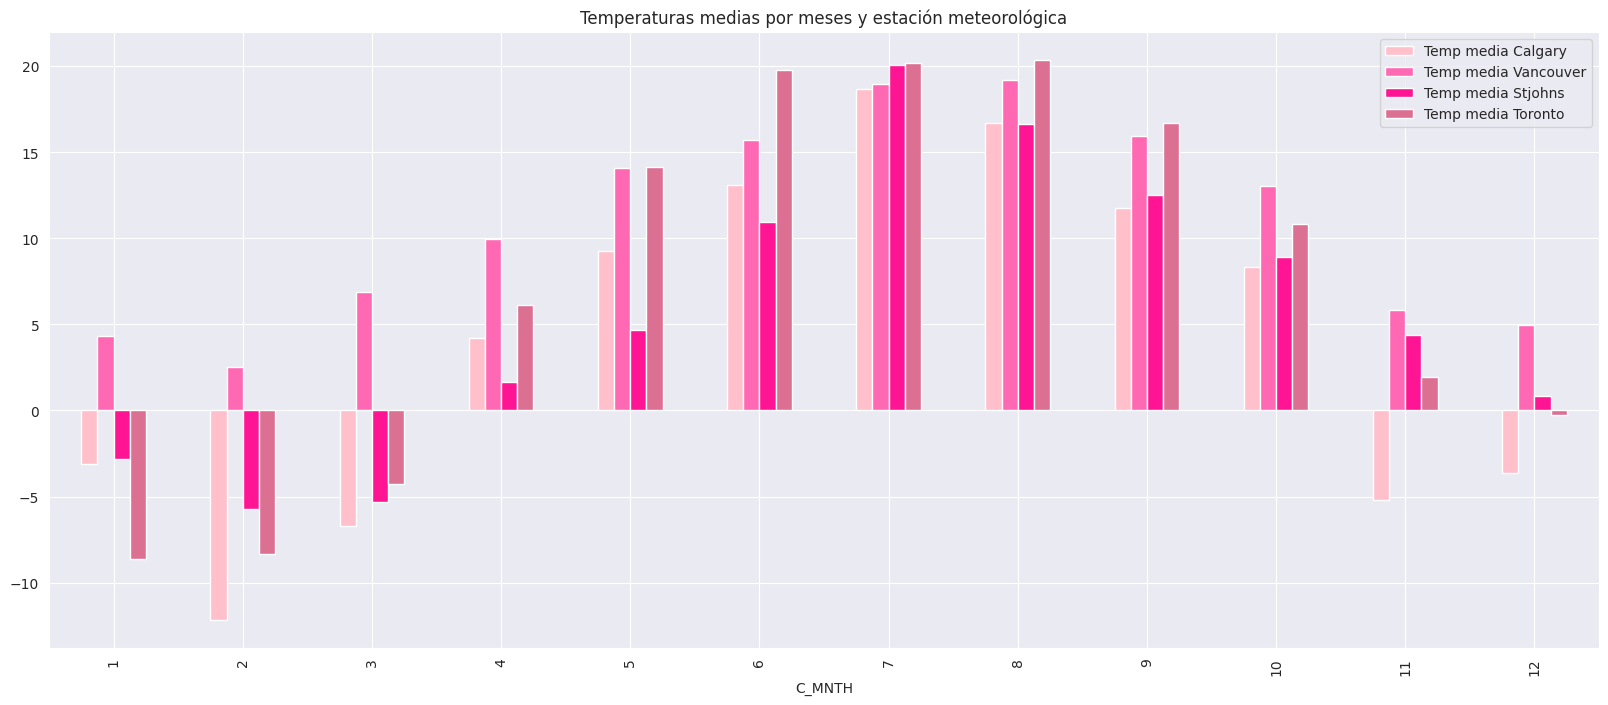

In [164]:
plt.rcParams["figure.figsize"] = (20, 8)
df_clima_mes.plot(x="C_MNTH", y=['Temp media Calgary', 'Temp media Vancouver', 'Temp media Stjohns', 'Temp media Toronto'], kind="bar", color=['#FFC0CB', '#FF69B4', '#FF1493', '#DB7093']) 
plt.title('Temperaturas medias por meses y estación meteorológica')

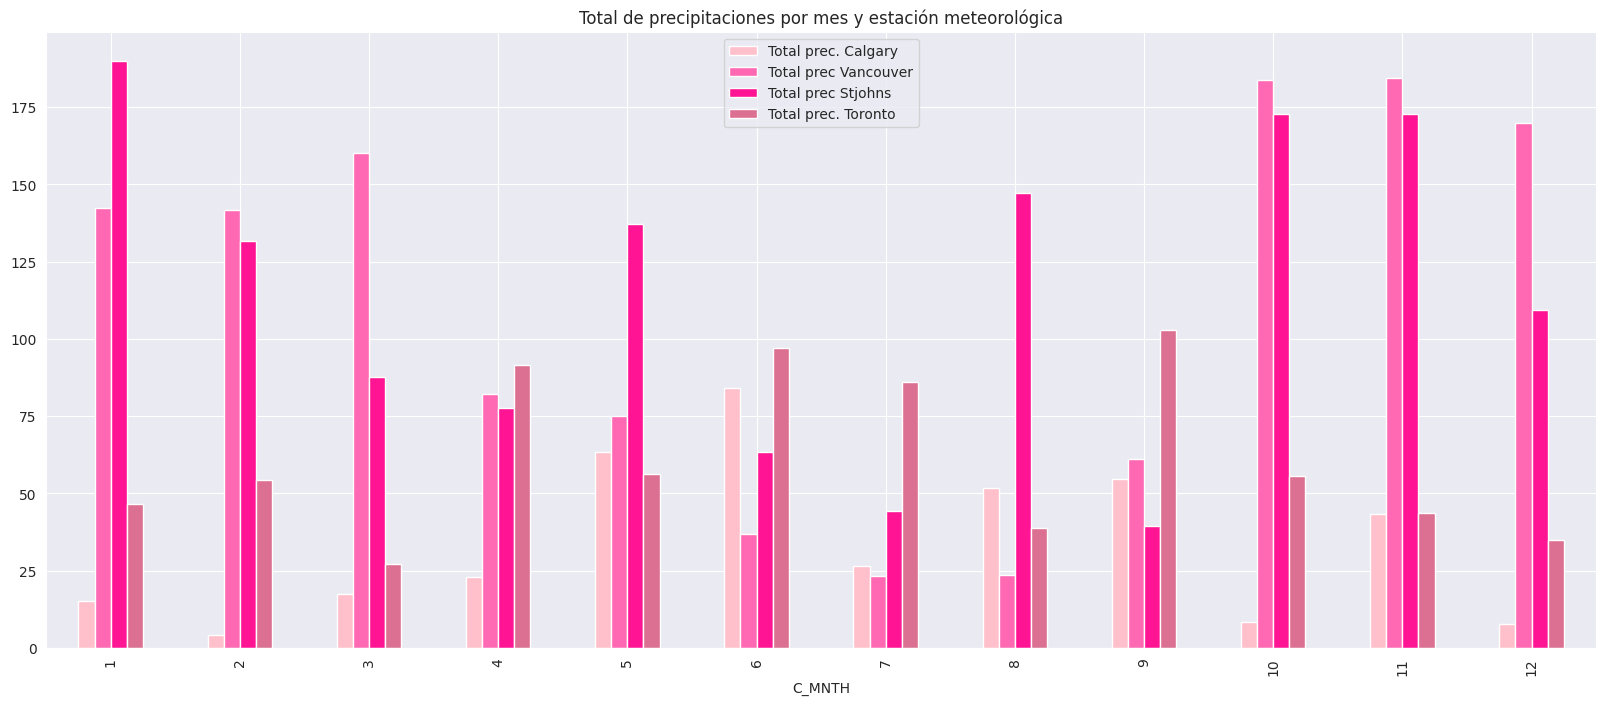

In [165]:
plt.rcParams["figure.figsize"] = (20, 8)
df_clima_mes.plot(x="C_MNTH", y=['Total prec. Calgary', 'Total prec Vancouver', 'Total prec Stjohns', 'Total prec. Toronto'], kind="bar", color=['#FFC0CB', '#FF69B4', '#FF1493', '#DB7093'])
plt.title('Total de precipitaciones por mes y estación meteorológica')
plt.show()

Analizando estos resultados, se puede ver que en los meses de Noviembre, Diciembre, Enero, Febrero y Marzo la media de la temperatura es mucho más baja que en el resto de meses.

Referente a la precipitación total, podemos ver que en estaciones como la de Calgary y Toronto hay más precipitación en los meses de Mayo, Junio y Julio mientras que en el resto de estaciones, la precipitación es mayor en los meses de invierno.

### **7.4 UNIÓN DE AMBOS DATA FRAME**

Antes de unificar ambos Data Frame para comenzar a realizar algunos análisis y extraer conclusiones, es preciso destacar que despreciaremos las variables ***C_WDAY*** y ***C_HOUR*** del conjunto de datos de colisiones ya que únicamente tenemos la climatología almacenada de manera mensual.



In [166]:
df_colisiones7 = df.drop(['C_WDAY', 'C_HOUR'],axis=1)

Unificamos ambos Data Frame usando como variable de unión ***C_MNTH***.

In [167]:
clima_merged = pd.merge(df_clima_mes, df_colisiones7, on ='C_MNTH', how ="inner")

In [168]:
clima_merged.head()

,C_MNTH,Temp media Calgary,Total prec. Calgary,Temp media Stjohns,Total prec Stjohns,Temp media Toronto,Total prec. Toronto,Temp media Vancouver,Total prec Vancouver,C_SEV,...,C_WTHR,C_RSUR,C_TRAF,V_TYPE,V_YEAR,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE
0,1,-3.090323,15.2,-2.825806,189.751261,-8.641935,46.6,4.345161,142.2,0,...,1,2,1,1,2,1,3,5,1,1
1,1,-3.090323,15.2,-2.825806,189.751261,-8.641935,46.6,4.345161,142.2,0,...,1,2,1,2,2,0,2,5,1,1
2,1,-3.090323,15.2,-2.825806,189.751261,-8.641935,46.6,4.345161,142.2,0,...,1,2,1,2,2,0,3,1,0,1
3,1,-3.090323,15.2,-2.825806,189.751261,-8.641935,46.6,4.345161,142.2,0,...,1,2,1,1,2,1,3,5,0,1
4,1,-3.090323,15.2,-2.825806,189.751261,-8.641935,46.6,4.345161,142.2,0,...,1,1,1,1,1,1,4,5,0,1


### **7.4 MATRIZ DE CORRELACIONES**

<Axes: >

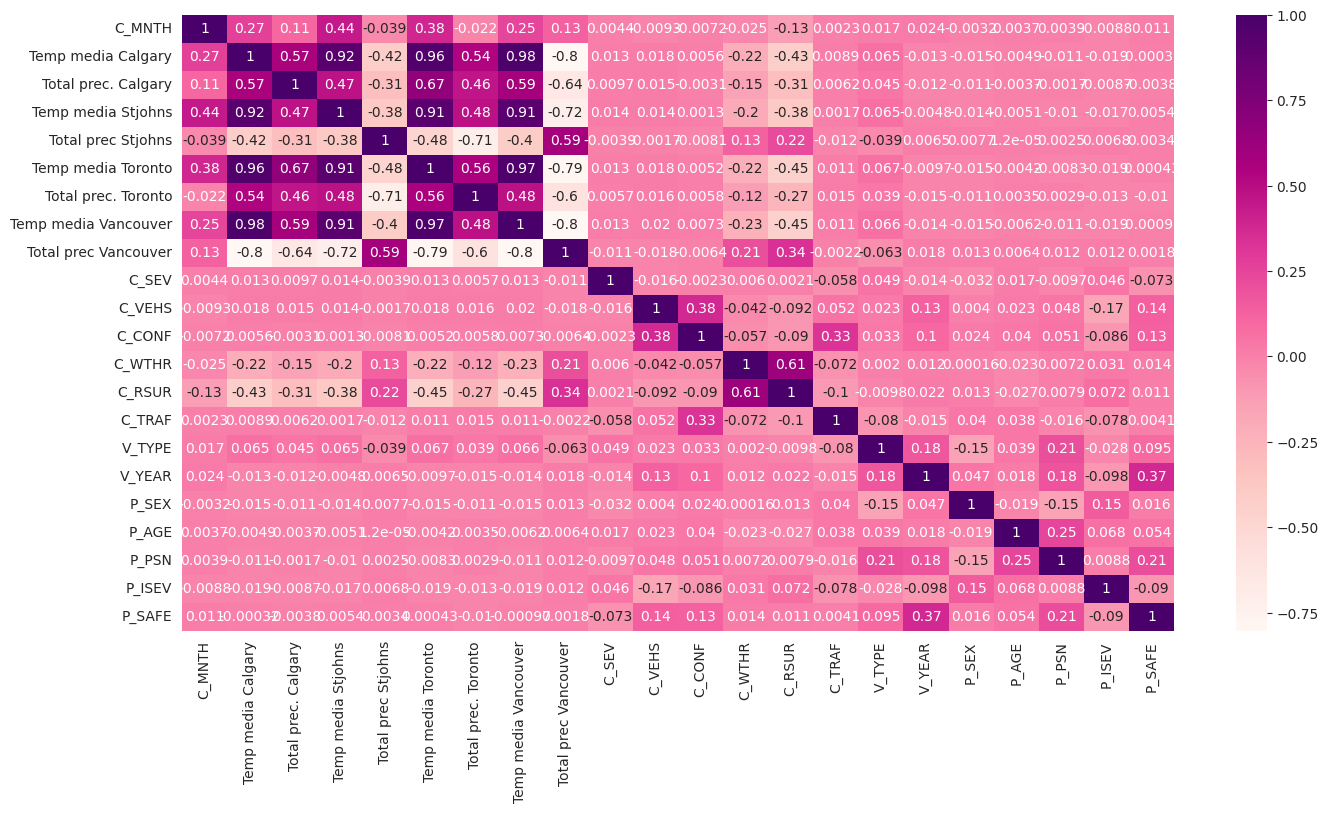

In [169]:
clima_merged = clima_merged.astype('int64')
correlaciones = clima_merged.corr()
plt.figure(figsize=(16,8))
sns.heatmap(correlaciones,cmap="RdPu", annot = True)

En esta matriz de correlación, se observa que las temperaturas medias de las cuatro estaciones están altamente correlacionadas entre sí, a pesar de que las precipitaciones no lo están. Esto también se puede observar en las diagramas de barras anteriores, en Calgary no llueve a penas en invierno, en cambio Calgary y St. Johns presentan mucha precipitación durante prácticamente todo el año.

Comparando estas nuevas variables con los datos iniciales que teníamos en el data frame de colisiones, para la mayoría de variables no aparece nigún tipo de correlación signiticativa. 

Las temperaturas medias de las cuatro estaciones sí que influye en cierta medida en el tiempo climatológico que hacía cuando hubo accidente. Y como éste está correlacionado con el estado del pavimento, las temperaturas medias también estarán correlacionadas con él. 



## **8. CONCLUSIONES Y VALORACIÓN FINAL**

Recordamos las preguntas iniciales que teniamos en el enunciado:

**1.** ¿Qué tipos de vehículos (modelos, antigüedad, etc.) y conductores son más propensos a tener accidentes (acción correctiva en prima)?

**2.** ¿Qué tipos de vehículos (modelos, antigüedad, etc.) y conductores son menos propensos a tener accidentes (descuento en prima)?

**3.** ¿Qué es lo que más contribuye a que existan fallecimientos en un accidente?





*   ##### **DATA FRAME DE CONDUCTORES CON SUS RESPECTIVAS EDADES**


In [170]:
df_conductores= df.loc[df['P_PSN'] == 5]
df_conductores['P_AGE'].value_counts()

2    90448
1    69942
3    64972
4    16222
0     1652
Name: P_AGE, dtype: int64

**RESPUESTA PRIMERA PREGUNTA**:

Utilizaremos la variable 'P_PSN' la cual nos indicaba la posición del pasajero en el momento de la colisión. Como lo que nos interesan son los conductores nos quedamos con la que hemos clasificado como categoría 5, y observamos las edades de los conductores usando la variable 'P_AGE'.

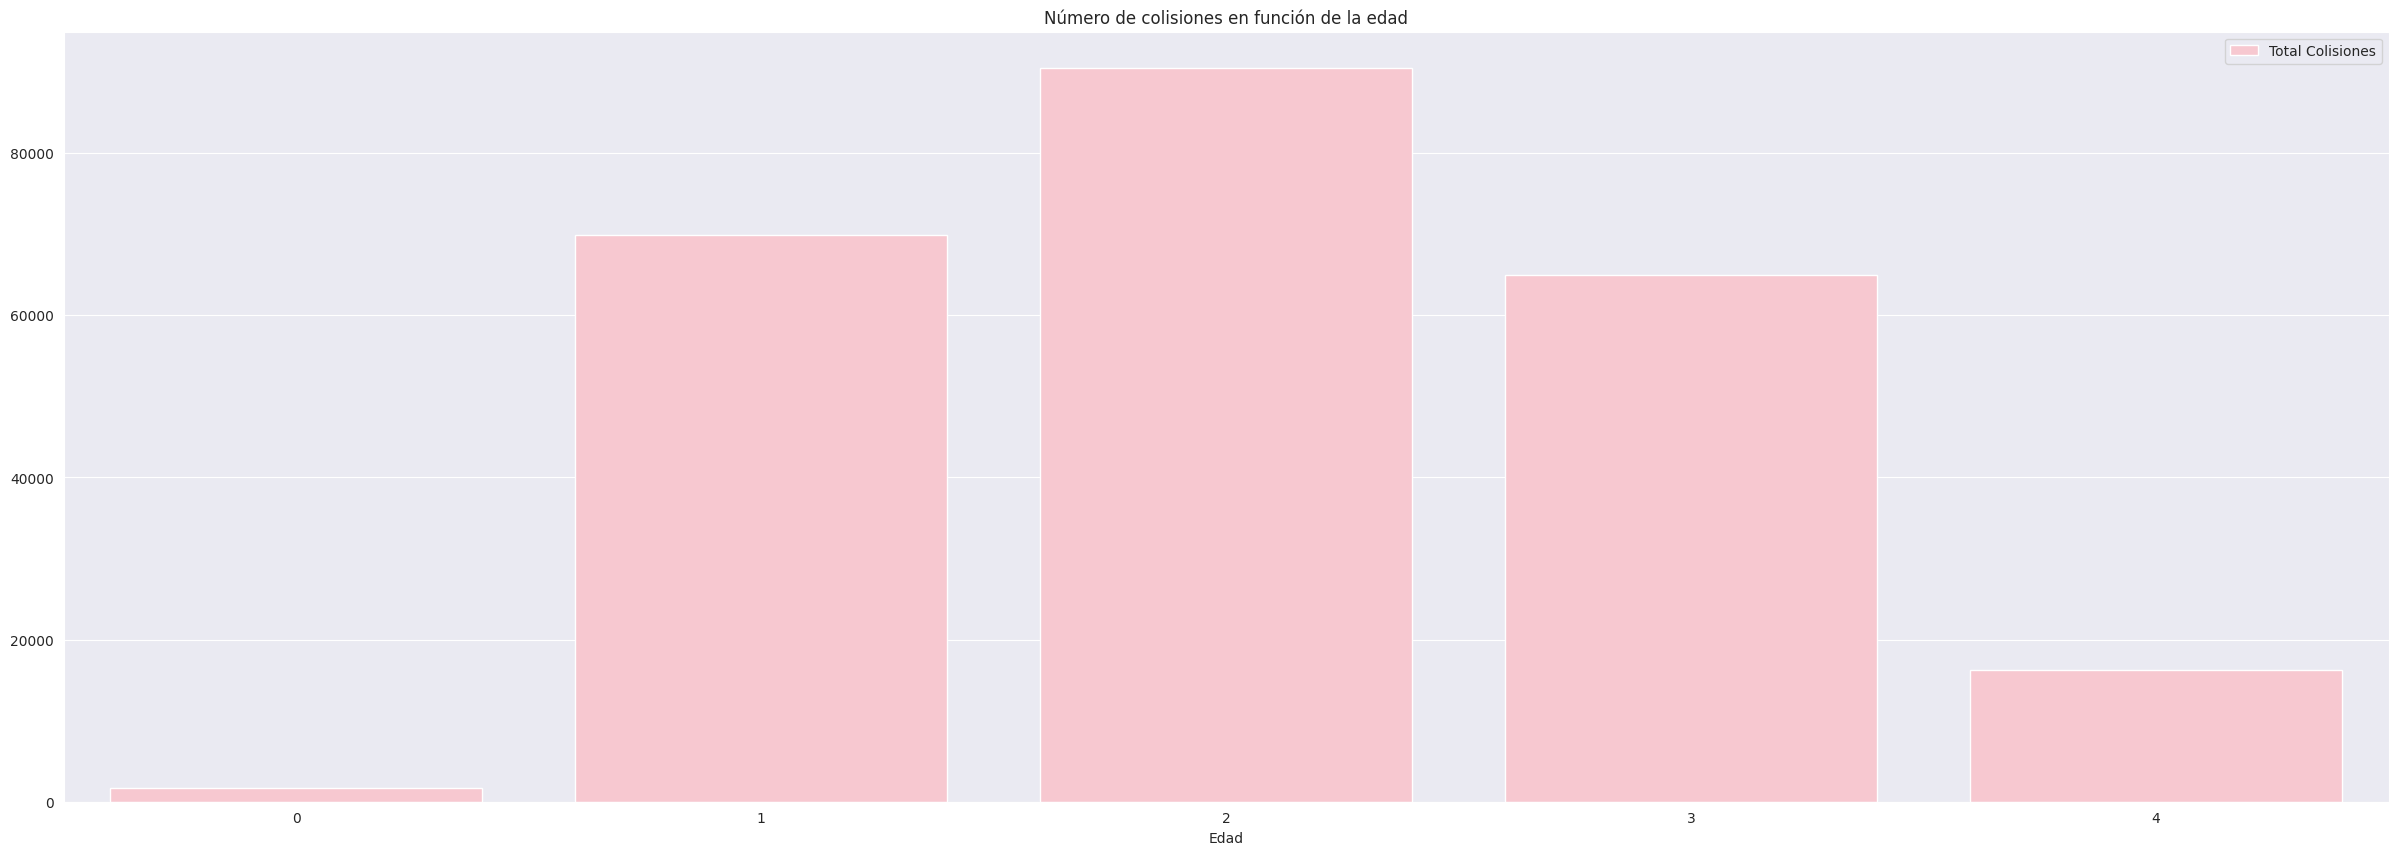

In [171]:
df2 = df_conductores.groupby('P_AGE').size()

ax = plt.subplots(figsize = (30,10))
ax = sns.barplot(x=df2.index, y=df2.values, color='pink', label='Total Colisiones')
ax.set(xlabel="Edad", title='Número de colisiones en función de la edad')
ax.legend()

plt.show()

Observamos que la mayoría de conductores pertenecen a la clase 2, la cual representa a los conductores de edades comprendidas entre 30 y 50 años.

Respondiendo a la primer pregunta, concluimos que los conductores más propensos a las colisiones son aquellos cuya edad está comprendida entre los 30-50 años. Esto puede ser debido a diferentes factores como:

* Distracciones debidas a dispositivos tecnológicos (uso del móvil durante la conducción).

* Comportamientos de conducción arriesgados como exceso de velocidad, consumo de alcohol...

En cuanto a los vehículos más propensos a las colisiones, observamos previamente en un gráfico que el grupo 2 (compuesto por los vehículos fabricados a partir del año 2000) es el más afectado. Bien es cierto que es el grupo donde más vehículos hay, constando de un total de 292.980, lo cual es normal ya que nuestro estudio se centra en esta década. Además son los vehículos más usados en esos años, debido a la técnología que estos pueden tener.

Observando la variable 'V_TYPE' , tenemos que los vehículos más propensos a colisiones son los automóviles, esto es lógico ya que el vehíchulo más utilizado como medio de transporte es el automóvil, por tanto no cabe dudar que la mayoría de colisiones vienen dadas por automóviles.



**RESPUESTA SEGUNDA PREGUNTA**:

Basándonos en el gráfico anterior observamos que las edades menos propensas a colisiones son los conductores de la clase 0, siendo estos los conductores de 16 años. Esto puede ser debido a:

*   El número de conductores con 16 años no es muy elevado a diferencia de las otras categorías de edades.

*   La precaución nada más obtener el carnet es posible que sea mayor, ya que aún la experiencia conduciendo no es mucha. Por tanto, se cumplen todas las normas de conducción y esto hace que las colisiones sean menores.

En cuanto a qué vehículos son menos propensos según su antigüedad, observando la variable 'V_YEAR' concluimos que son los que están comprendido entre los años 1900 y 1990.

Si observamos la variable 'V_TYPE' podemos ver que los vehículos menos propensos son los vehículos de tipo: Autocaravanas, maquinaria, agricola... Esto puede ser debido a que son vehículos que no se utlizan en el día a día, y circulan por zonas poco transitadas.





**OBSERVACIÓN**: Todas estas conclusiones las hemos obtenido gracias al estudio, mayoritariamente gráfico, de las variables que hemos hecho anteriormente en el apartado **3.4** referido al tratamiento de variables.

Para resolver las preguntas 3 y 4 nos fijaremos en los modelos que hemos obtenido con mejores resultados en cada variable objetivo. Siendo:


*   ***C_SEV*** : el modelo con mejor resultados es **Random Forest**
*   ***P_ISEV***: el modelo con mejor resultados es **Gradient Boost**

**RESPUESTA PREGUNTA TRES**: 

Si nuestro interés es saber lo que más contribuye a que existan fallecimientos en un accidente nos centraremos en las variables con más importancia explicadas por el modelo Random Forest usando como variable predictora *'C_SEV'*. Veamos esto de forma gráfica:

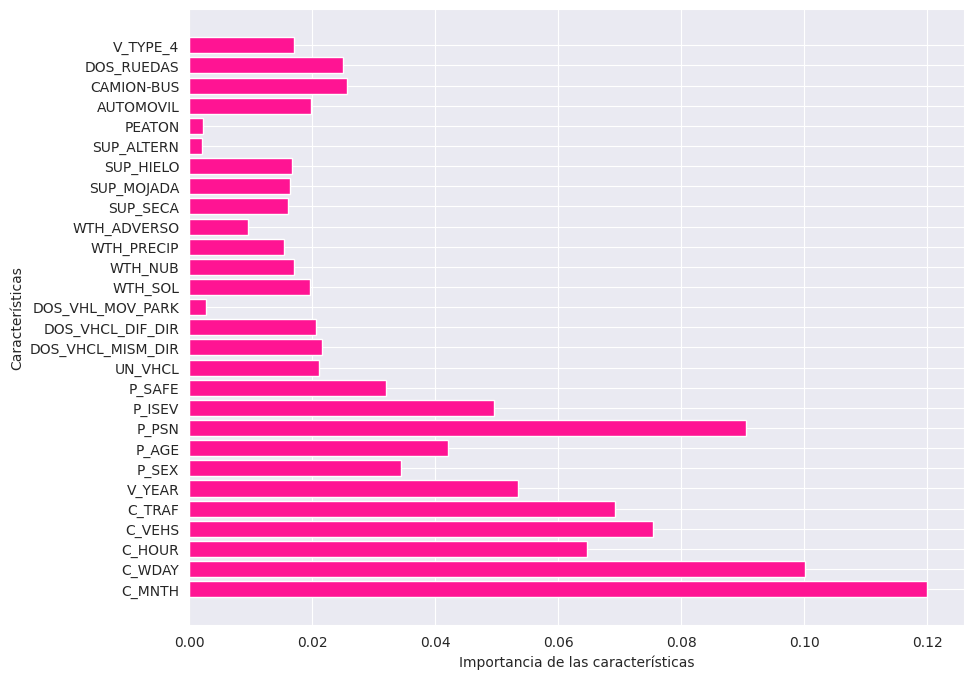

In [173]:
caract=X_csev_orig.shape[1]
plt.figure(figsize=(10, 8))
plt.barh(range(caract), rf.feature_importances_,color='deeppink')
plt.yticks(np.arange(caract),X_csev_orig.columns)
plt.xlabel('Importancia de las características')
plt.ylabel('Características')
plt.show()

Donde observamos que algunas de las variables que más contribuyen a que existan fallecimientos en una colisión según este modelo son las variables: *'C_VEHS'*, *'V_YEAR'* y *'P_SAFE'*. 

Esto puede ser debido a que la utilización de dispositivos de seguridad a la hora de conducir son muy importantes, como lo puede ser el cinturón de seguidad. Además, habíamos visto que según la edad del año de fabricación del vehículo, había vehículos más proprensos que otros. Y por último, resulta bastante lógico que el número de implicados en el accidente sean de importancia, ya que a mayor número de vehículos el accidente suele ser de mayor gravedad y el número de implicaods es mayor por lo que la probabilidad de que haya un mayor número de fallecimientos aumenta.

### **8.1. CONCLUSIÓN FINAL**

Finalmente hemos conseguido establecer diferentes modelos de predicción usando como variables predictoras '*C_SEV'* y *'P_ISEV'*, y obteniendo para ambos modelos buenos resultados como hemos mencionado anteriormente. 

Hemos sido capáces de sacar una gran cantidad de concluiones y datos relevantes durante todo el estudio. Sin embargo es interesante poner manifiesto algunas de las conclusiones obtenidas al terminar el análisis. 

Si nuestro objetivo es proporcionar a la aseguradora datos sobre el fallecimiento o no de las victimas, hemos visto que es necesario hacer incapie en algunas de las variables más signifivaticas proporcionadas por el modelo elegido denifitivo para esta variable, como los años de matriculación del vehículo.

Al igual que hemos observado que si nuesto objetivo es predecir si será necesario el uso de atención medica deberemos dar importancia a variables como el número de vehículos involucrados en el accidente o la gravedad de la colisión.

Ya que todas estas predicciones permiten calcular las primas de seguros y asignar los recursos adecuados para cubrir las posibles eventualidades en función de los riesgos identificados durante todo el estudio.


